## This code is used to generate all the outputs related to Tan2021 data.

In [1]:
library(data.table)
library(readxl)
library(dplyr)
# library(BandNorm)
library(ggplot2)
library(viridis)
library(ggpubr)
library(SeuratObject)
library(data.table)
library(Seurat)
library(pheatmap)
library(magrittr)
library(tidyr)
library(ggrepel)
library(umap)
library(Rtsne)

summary = read_excel("/Tan2021/supplementary/1-s2.0-S0092867420317542-mmc4.xlsx")
summary$cell = paste(summary$cell, ".contacts", sep = "")
summary = summary[!is.na(summary$`20kb RMS RMSD`), ]
paths = paste("/Tan2021/raw/", summary$cell, ".hic", sep = "")
names = paste(summary$cell, ".hic", sep = "")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite


Attaching package: ‘tidyr’


The following object is masked from ‘package:magrittr’:

    extract




In [26]:
load("/Tan2021/rdata_01272022/all_objects_v2.RData")
load("/Tan2021/control_100kb_embedding.RData")
load(file = "/Tan2021/control_100kb_resUMAP_resTSNE.RData")
load("/Tan2021/Tan2021_results.RData")
load("/Tan2021/rdata_01272022/detected_markergenes_control.RData")
load(file = "/Tan2021/RNA_SeuratObj.RData")
load(file = "/Tan2021/rdata_01272022/detected_markergenes_control_all_top10_sig.RData")
load("/Tan2021/rdata_01272022/heatmap_objs.RData")
load("/Tan2021/rdata_01272022/neonatal_heatmap_objs.RData")

In [3]:
summary %>% head

cell                        tissue treatment age sex    father   mother  
1 cortex-p001-cb_001.contacts cortex control   P1  female C57BL/6J CAST/EiJ
2 cortex-p001-cb_002.contacts cortex control   P1  female C57BL/6J CAST/EiJ
3 cortex-p001-cb_003.contacts cortex control   P1  female C57BL/6J CAST/EiJ
4 cortex-p001-cb_004.contacts cortex control   P1  female C57BL/6J CAST/EiJ
5 cortex-p001-cb_005.contacts cortex control   P1  female C57BL/6J CAST/EiJ
6 cortex-p001-cb_006.contacts cortex control   P1  female C57BL/6J CAST/EiJ
  restriction enzyme cell-type cluster          reads    read length (bp)
1 MboI               Neonatal Astrocyte         13675687 150             
2 MboI               Neonatal Neuron 1          10057130 150             
3 MboI               Neonatal Neuron 2          12673668 150             
4 MboI               Unknown                    12936354 150             
5 MboI               Neonatal Neuron 2          14086574 150             
6 MboI               Oligodendrocyte Progenitor 13246199 150             
  raw throughput (Gb) raw contacts raw intra (%) dup rate (%) contacts
1 4.102706            1703101      70.8022       70.42        503696  
2 3.017139            1202070      76.5257       68.58        377718  
3 3.802100            1163722      84.1804       68.61        365317  
4 3.880906            1289148      84.6188       69.21        396869  
5 4.225972            1510084      76.9289       71.23        434395  
6 3.973860            1342289      71.9177       69.48        409612  
  intra (%) phased legs (%) raw contacts per read (%) 20kb RMS RMSD      
1 68.1457   47.0422         12.453495                 1899-12-31 11:54:40
2 73.6338   47.0264         11.952416                 1900-01-10 01:41:08
3 80.1731   46.4664          9.182204                 1900-01-11 08:30:33
4 81.0222   46.4764          9.965312                 1900-01-14 06:32:26
5 73.3952   46.8567         10.720023                 1899-12-31 23:19:49
6 68.7546   46.2013         10.133390                 1900-01-10 12:25:33

In [4]:
options(repr.plot.width=15, repr.plot.height=10)

In [6]:
cell_info = summary #summary[, c("cell", "cell-type cluster")]
cell_info$cell = paste(cell_info$cell, ".txt", sep = "")

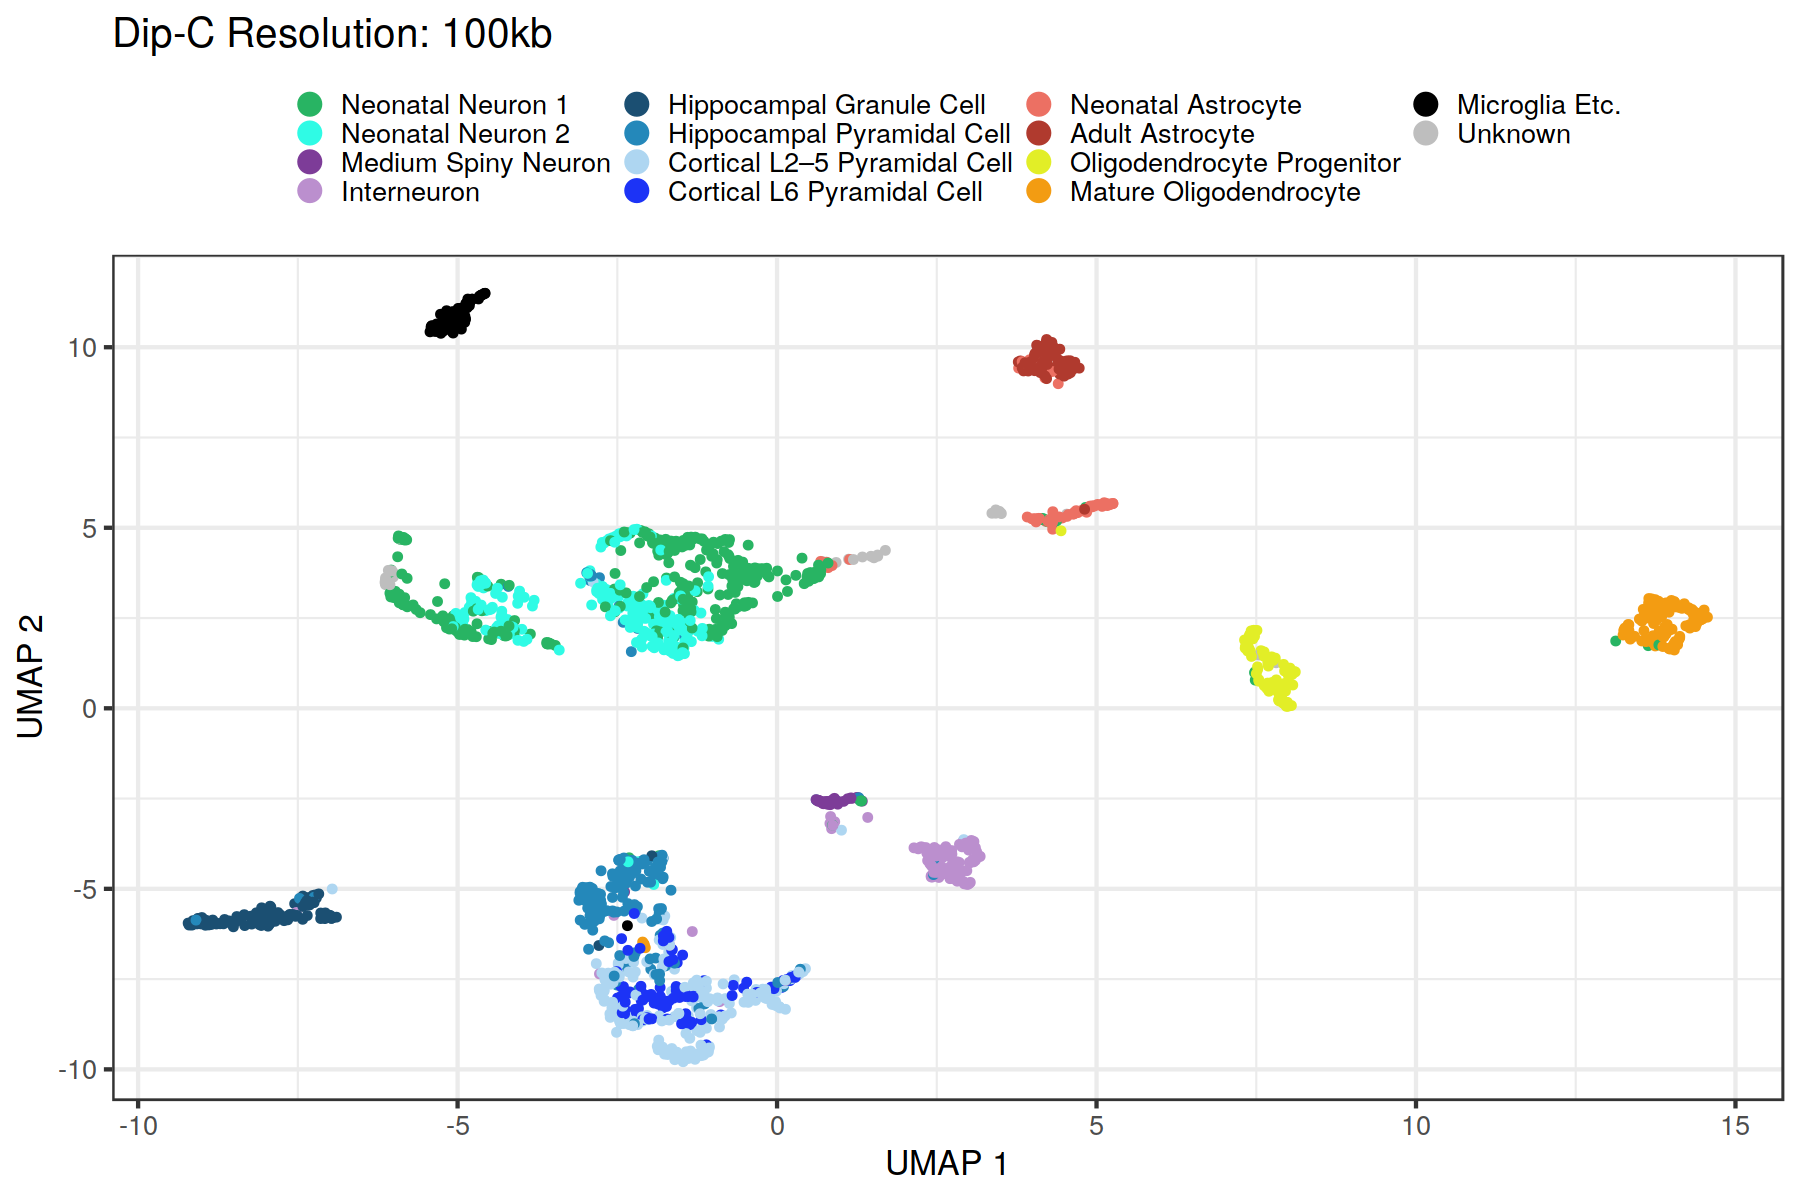

In [7]:
umapD = cbind(resUMAP, cell_info[, "cell-type cluster"])
colnames(umapD) = c("X1", "X2", "celltype")

dipCumap = umapD %>% ggplot(aes(x = X1, y = X2, color = celltype)) +
geom_point(size = 2) +
theme_bw(base_size = 20) +
xlab("UMAP 1") +
ylab("UMAP 2") +
ggtitle("Dip-C Resolution: 100kb") +
scale_color_manual(breaks = c("Neonatal Neuron 1", "Neonatal Neuron 2", 
                              "Medium Spiny Neuron", "Interneuron",
                              "Hippocampal Granule Cell", "Hippocampal Pyramidal Cell", 
                             "Cortical L2–5 Pyramidal Cell", "Cortical L6 Pyramidal Cell", 
                              "Neonatal Astrocyte", "Adult Astrocyte",
                              "Oligodendrocyte Progenitor", "Mature Oligodendrocyte", 
                              "Microglia Etc.", "Unknown"), 
                   values = c("#28B463", "#2FFBE5", 
                              "#7D3C98", "#BB8FCE",
                              "#1B4F72", "#2488BA",
                              "#AED6F1", "#1C33F6", 
                              "#EC7063", "#B03A2E", 
                              "#E2EE27", "#F39C12", 
                              "#000000", "grey")) +
theme(legend.position = "top") +
ggpubr::rremove("legend.title") +
guides(colour = guide_legend(nrow = 4, override.aes = list(size = 6)))

saveRDS(dipCumap, file = "/Tan2021/RDS/dipCumap.rds")
dipCumap

png 
  2

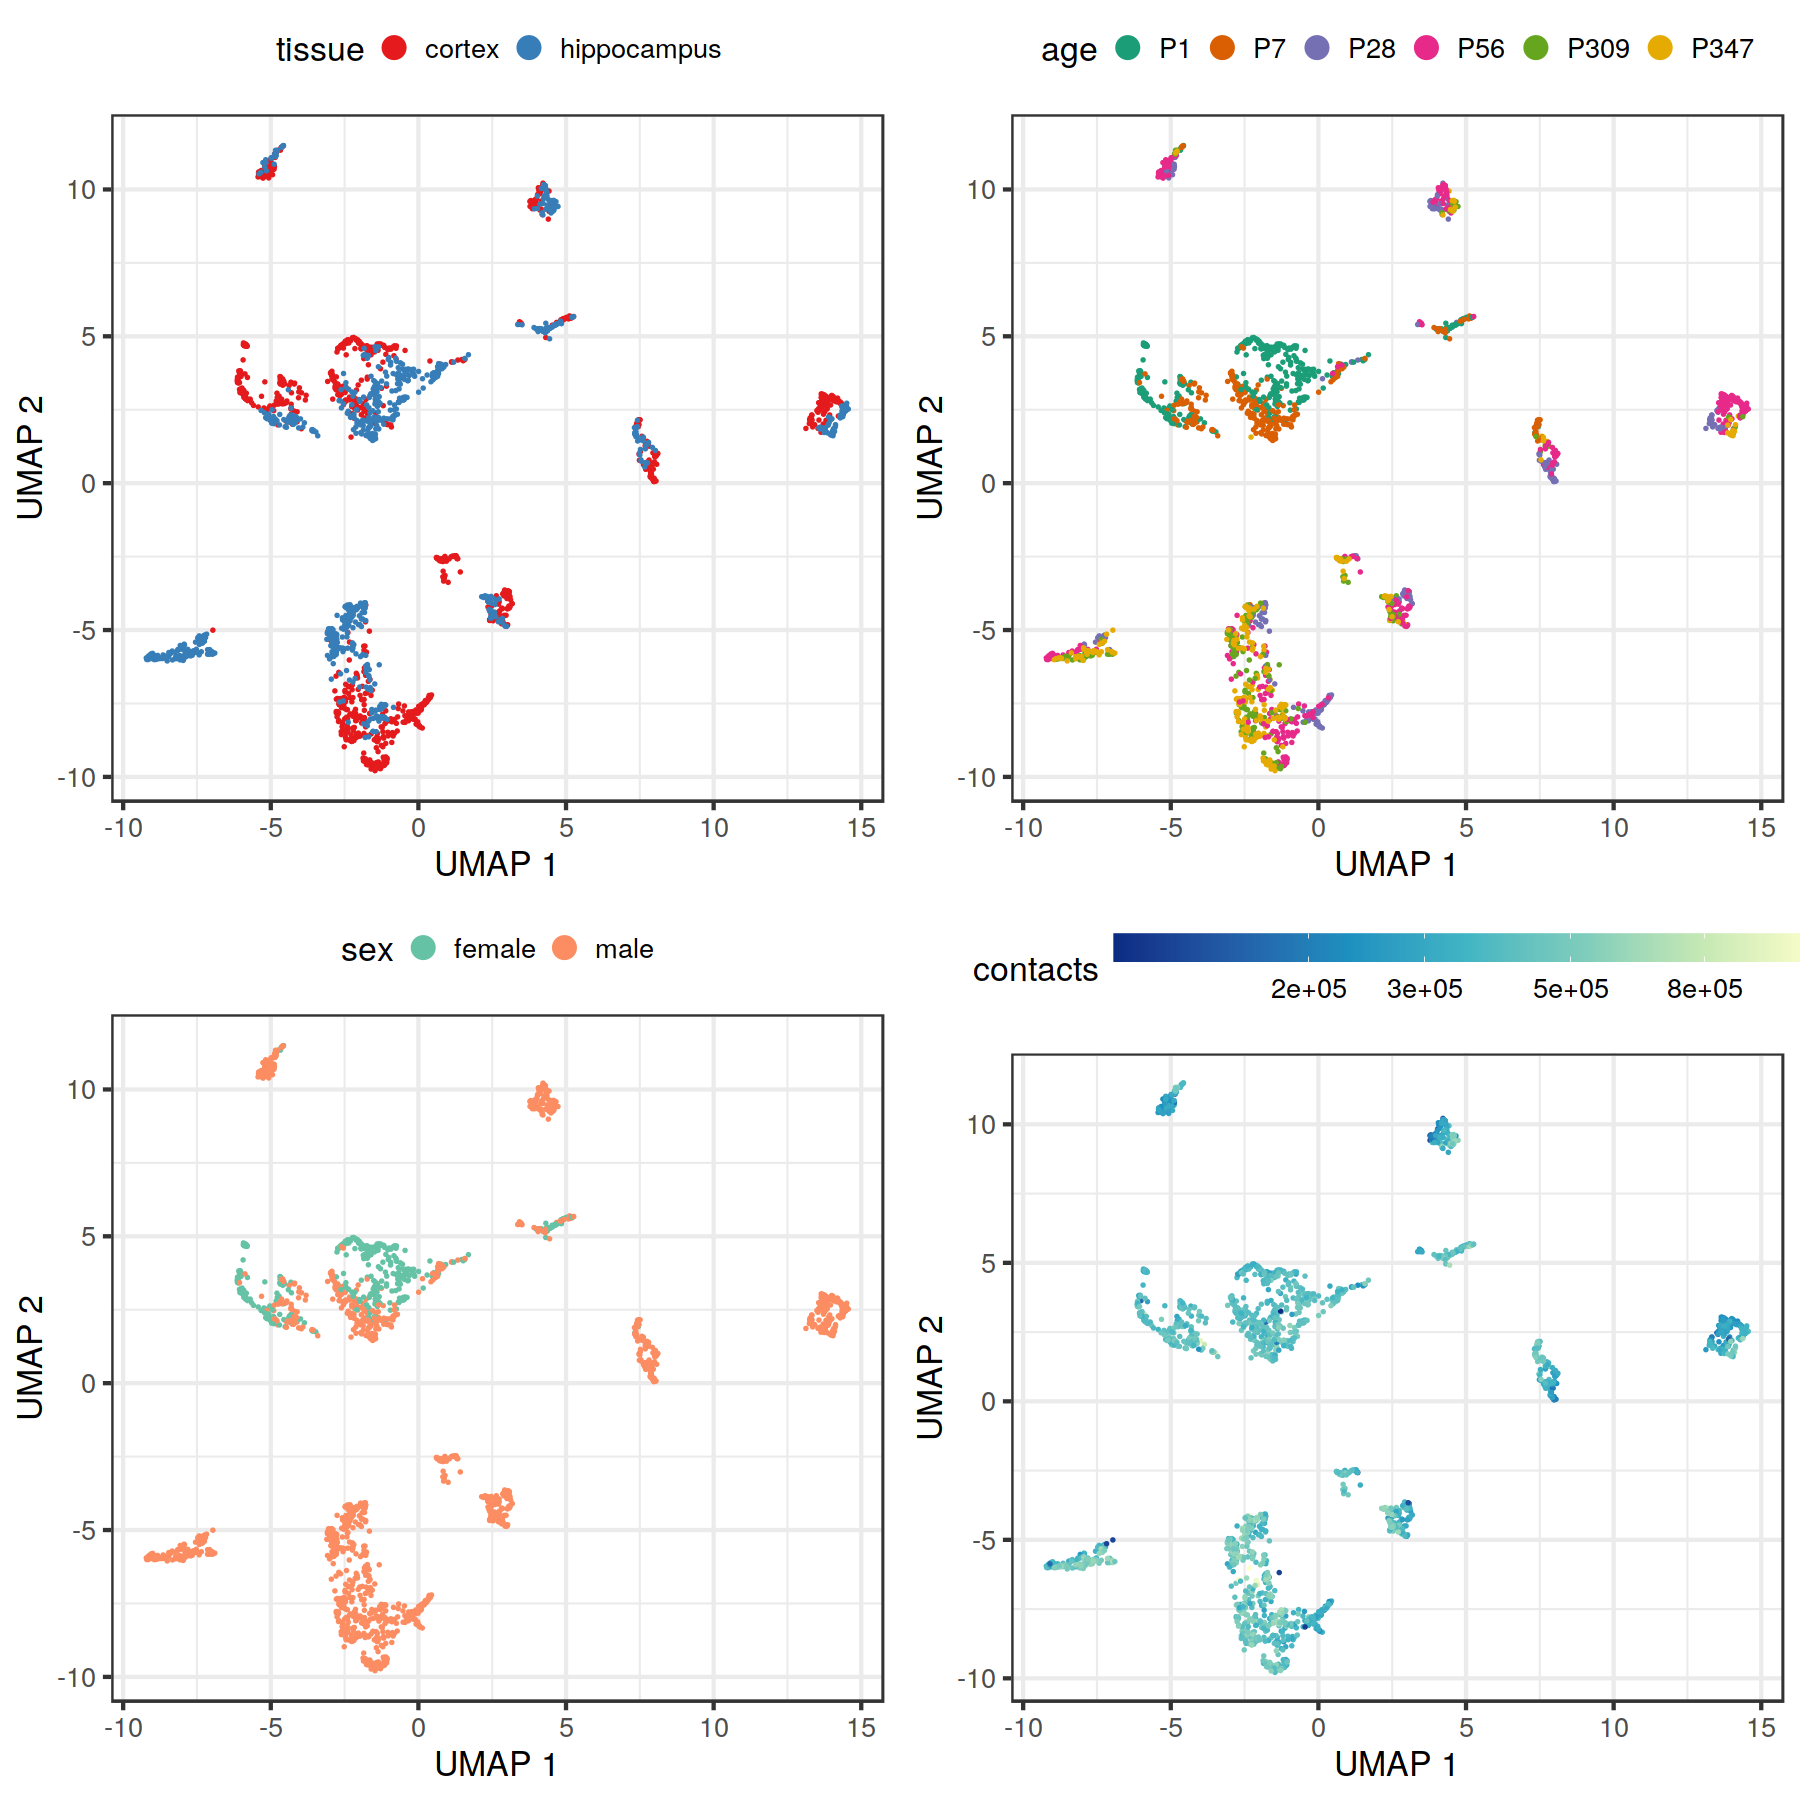

In [8]:
options(repr.plot.width=15, repr.plot.height=15)

umapD = cbind(resUMAP, cell_info[, c("tissue", "age", "sex", "contacts", "cell-type cluster")])
colnames(umapD) = c("X1", "X2", "tissue", "age", "sex", "contacts", "cellType")
p1 = umapD %>% ggplot(aes(x = X1, y = X2, color = tissue)) +
geom_point(size = 0.5) +
theme_bw(base_size = 20) +
xlab("UMAP 1") +
ylab("UMAP 2") +
# ggtitle("Dip-C Resolution: 100kb") +
scale_color_brewer(palette = "Set1") +
theme(legend.position = "top") +
guides(colour = guide_legend(nrow = 1, override.aes = list(size = 6)))

umapD$age = factor(umapD$age, levels = c("P1", "P7", "P28", "P56", "P309", "P347"))
p2 = umapD %>% ggplot(aes(x = X1, y = X2, color = age)) +
geom_point(size = 0.5) +
theme_bw(base_size = 20) +
xlab("UMAP 1") +
ylab("UMAP 2") +
# ggtitle("Dip-C Resolution: 100kb") +
scale_color_brewer(palette = "Dark2") +
theme(legend.position = "top") +
guides(colour = guide_legend(nrow = 1, override.aes = list(size = 6)))

p3 = umapD %>% ggplot(aes(x = X1, y = X2, color = sex)) +
geom_point(size = 0.5) +
theme_bw(base_size = 20) +
xlab("UMAP 1") +
ylab("UMAP 2") +
# ggtitle("Dip-C Resolution: 100kb") +
scale_color_brewer(palette = "Set2") +
theme(legend.position = "top") +
guides(colour = guide_legend(nrow = 1, override.aes = list(size = 6)))

p4 = umapD %>% ggplot(aes(x = X1, y = X2, color = contacts)) +
geom_point(size = 0.5) +
theme_bw(base_size = 20) +
xlab("UMAP 1") +
ylab("UMAP 2") +
# ggtitle("Dip-C Resolution: 100kb") +
scale_color_distiller(palette = "YlGnBu", trans = "log", breaks = c(100000, 200000, 300000, 500000, 800000)) +
theme(legend.position = "top", legend.key.width = unit(3, "cm"))

pdf("/Figures/DipC_featureUMAP.pdf", width = 18, height = 18)
ggarrange(p1, p2, p3, p4, ncol = 2, nrow = 2)
dev.off()

ggarrange(p1, p2, p3, p4, ncol = 2, nrow = 2)


In [ ]:
# load("/Tan2021/Tan2021_results.RData")
cellTypeList = c("Neonatal Neuron 1", "Neonatal Neuron 2", 
                 "Medium Spiny Neuron", "Interneuron",
                 "Hippocampal Granule Cell", "Hippocampal Pyramidal Cell", 
                 "Cortical L2–5 Pyramidal Cell", "Cortical L6 Pyramidal Cell", 
                 "Neonatal Astrocyte", "Adult Astrocyte",
                 "Oligodendrocyte Progenitor", "Mature Oligodendrocyte", 
                 "Microglia Etc.") #, "Unknown"

cellTypeNameList = gsub(" ", "_", cellTypeList)
#cellTypeNameList[7] = names(gene_lists)[2]

cellTypeNameList
gene_lists[[cellTypeNameList[1]]]
gene_lists[[cellTypeNameList[2]]]

In [ ]:
#Preparing for hic result
library(BandNorm)
load("/Tan2021/rdata_01272022/detected_markergenes_control.RData")

paths = list.files("/Tan2021/gad_scores_control_promoter/", full.names = TRUE)
names = list.files("/Tan2021/gad_scores_control_promoter/")
temp = fread(paths[1])
GAD_reg = matrix(0, nrow = nrow(temp), ncol = length(paths))
for (k in 1:length(names)){
    cell = fread(paths[k])
    GAD_reg[, k] = cell$V2
}
GAD_reg = GAD_reg[!duplicated(temp$V1), ]
temp = temp[!duplicated(temp$V1), ]
rownames(GAD_reg) = temp$V1
colnames(GAD_reg) = names
all_cell_norm = t(t(GAD_reg) / colSums(GAD_reg)) * 1e04
all = (all_cell_norm - rowMeans(all_cell_norm))/sqrt(rowVars(all_cell_norm))
all = t(all)
# all[all < 1.2] = NA

GADgeneAll = all

In [13]:
gadD = c()
targetGeneList = gene_lists[[cellTypeNameList[1]]]

for(targetGene in targetGeneList){ 
    ind = which(rownames(RNA_SeuratObj@assays$RNA@counts) == targetGene)
#     rna = data.frame(names = colnames(RNA_SeuratObj@assays$RNA@counts), gene = RNA_logCount[ind, ] %>% as.vector, type = "RNA", targetGene = targetGene) %>% 
#             cbind(rnaUMAPD, .) %>% select(X1, X2, cellType, score = gene, type, targetGene)
    gad = data.frame(names = rownames(all), gene = all[, colnames(all) == targetGene], type = "GAD", targetGene = targetGene) %>% cbind(umapD, .) %>% 
            select(X1, X2, cellType, age, sex, tissue, score = gene, type, targetGene)
    
#     rnaD = rbind(rnaD, rna)
    gadD = rbind(gadD, gad)

    
}

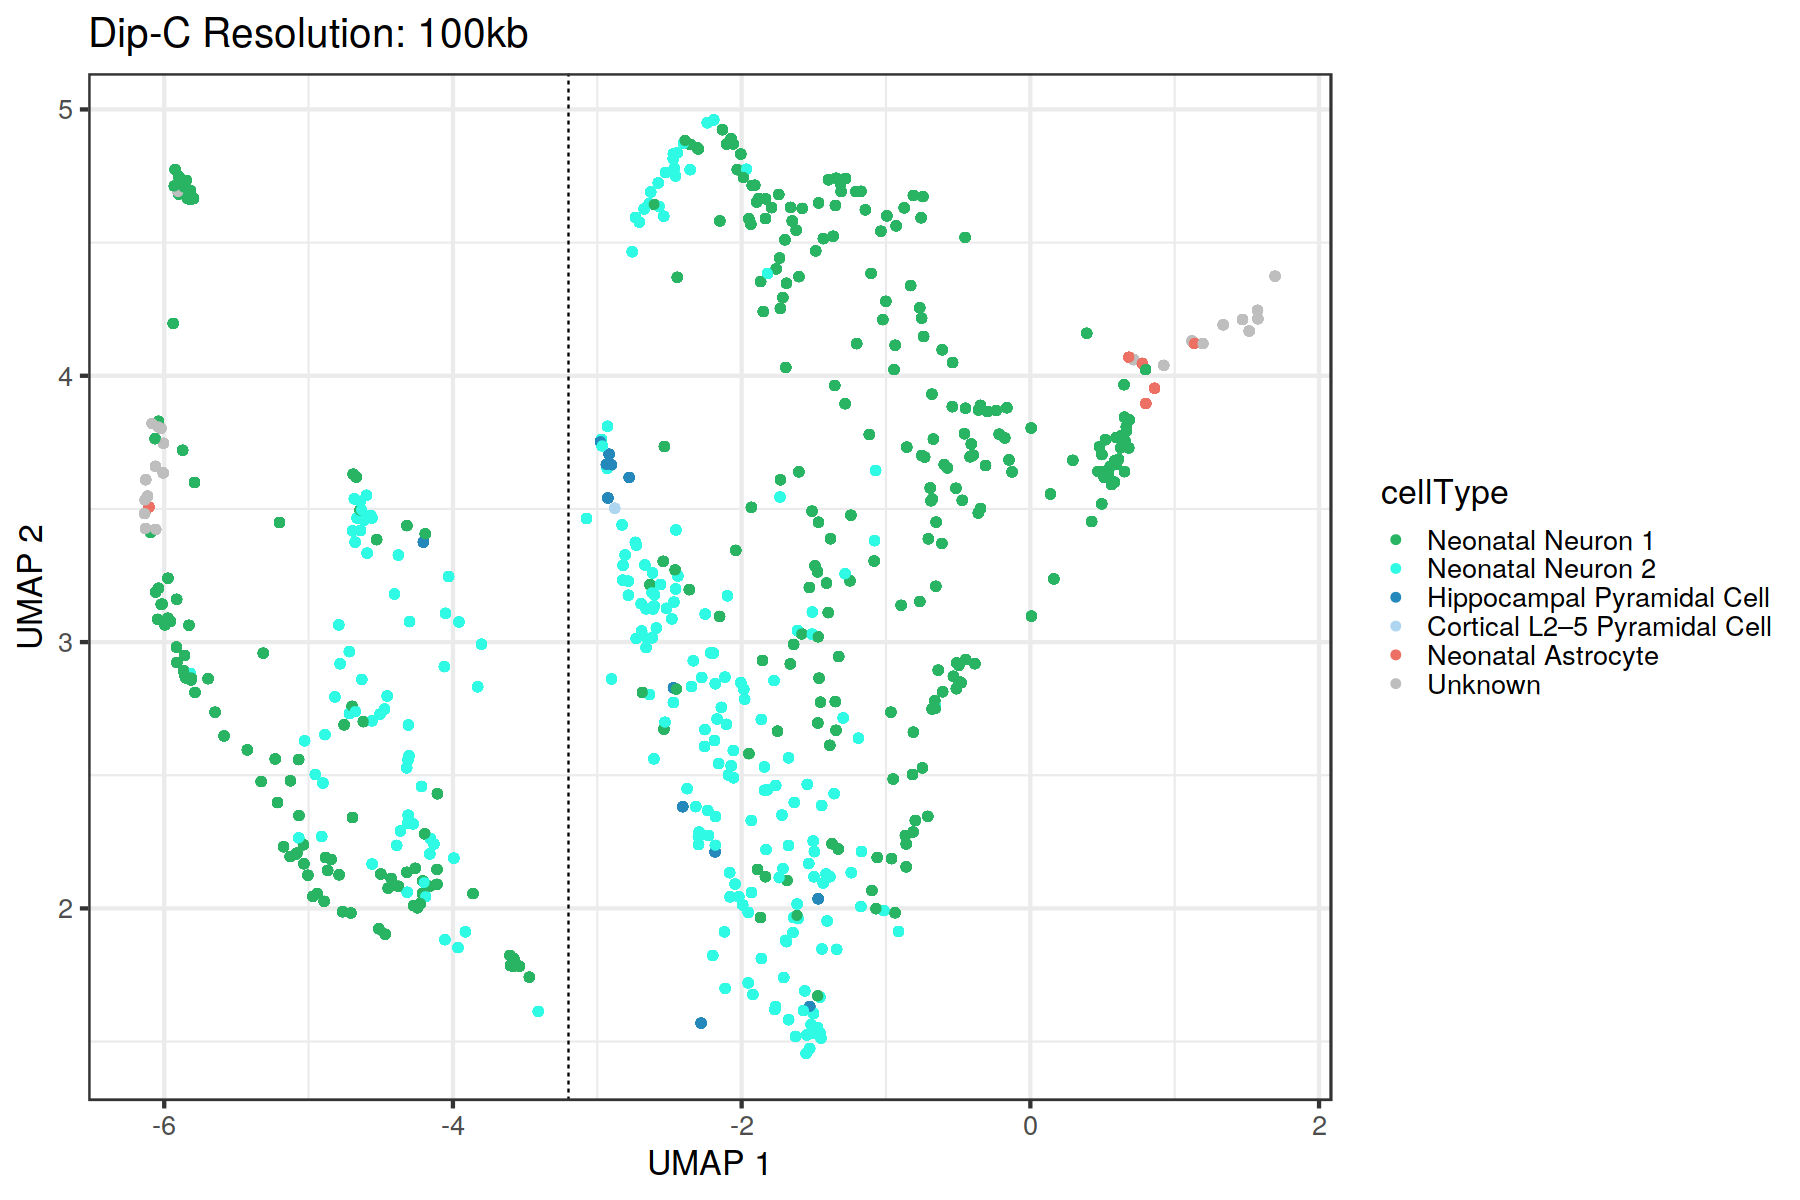

In [15]:
options(repr.plot.width=15, repr.plot.height=10)

neuronSub = gadD %>% filter(X1 >=-7.5, X1 <=2.5, X2 >= 0, X2 <= 5.2)


neuronSub %>% ggplot(aes(x = X1, y = X2, color = cellType)) +
geom_point(size = 2) +
geom_vline(xintercept = -3.2, linetype = "dashed") +
theme_bw(base_size = 20) +
xlab("UMAP 1") +
ylab("UMAP 2") +
ggtitle("Dip-C Resolution: 100kb") +
scale_color_manual(breaks = c("Neonatal Neuron 1", "Neonatal Neuron 2", 
                              "Medium Spiny Neuron", "Interneuron",
                              "Hippocampal Granule Cell", "Hippocampal Pyramidal Cell", 
                             "Cortical L2–5 Pyramidal Cell", "Cortical L6 Pyramidal Cell", 
                              "Neonatal Astrocyte", "Adult Astrocyte",
                              "Oligodendrocyte Progenitor", "Mature Oligodendrocyte", 
                              "Microglia Etc.", "Unknown"), 
                   values = c("#28B463", "#2FFBE5", 
                              "#7D3C98", "#BB8FCE",
                              "#1B4F72", "#2488BA",
                              "#AED6F1", "#1C33F6", 
                              "#EC7063", "#B03A2E", 
                              "#E2EE27", "#F39C12", 
                              "#000000", "grey"))

In [17]:
neuronSub$newCellType = "Neonatal Neuron 1"
neuronSub$newCellType[neuronSub$X1 >=-3.2] = "Neonatal Neuron 2"
neuronSub %>% data.frame %>% group_by(newCellType) %>% summarize(N = n(), P1N = sum(age == "P1"), P7N = sum(age == "P7")) %>% mutate(P1perc = P1N/(P1N+P7N)*100, P7perc = P7N/(P1N+P7N)*100)
neuronSub %>% data.frame %>% group_by(newCellType) %>% summarize(N = n(), P1N = sum(sex == "female"), P7N = sum(sex == "male")) %>% mutate(Femaleperc = P1N/(P1N+P7N)*100, Maleperc = P7N/(P1N+P7N)*100)
neuronSub %>% data.frame %>% group_by(newCellType) %>% summarize(N = n(), P1N = sum(tissue == "cortex"), P7N = sum(tissue == "hippocampus")) %>%  
        mutate(cortexPer = P1N/(P1N+P7N)*100, hippocampusPer = P7N/(P1N+P7N)*100)


neuronSub %>% data.frame %>% filter(cellType %in% c("Neonatal Neuron 1", "Neonatal Neuron 2")) %>% group_by(cellType) %>% summarize(N = n(), P1N = sum(age == "P1"), P7N = sum(age == "P7")) %>% mutate(P1perc = P1N/(P1N+P7N)*100, P7perc = P7N/(P1N+P7N)*100)
neuronSub %>% data.frame %>% filter(cellType %in% c("Neonatal Neuron 1", "Neonatal Neuron 2")) %>% group_by(cellType) %>% summarize(N = n(), P1N = sum(sex == "female"), P7N = sum(sex == "male")) %>% mutate(Femaleperc = P1N/(P1N+P7N)*100, Maleperc = P7N/(P1N+P7N)*100)
neuronSub %>% data.frame %>% filter(cellType %in% c("Neonatal Neuron 1", "Neonatal Neuron 2")) %>% group_by(cellType) %>% summarize(N = n(), P1N = sum(tissue == "cortex"), P7N = sum(tissue == "hippocampus")) %>%  
        mutate(cortexPer = P1N/(P1N+P7N)*100, hippocampusPer = P7N/(P1N+P7N)*100)


gadD %>% filter(age %in% c("P1", "P7")) %>% summarize(N = n(), P1N = sum(age == "P1"), P7N = sum(age == "P7")) %>% mutate(P1perc = P1N/(P1N+P7N)*100, P7perc = P7N/(P1N+P7N)*100)

binom.test(2684, 2684+1408, 0.572238, alternative = "two.sided")
binom.test(5016, 5016+4026, 0.572238, alternative = "two.sided")

newCellType       N    P1N  P7N  P1perc   P7perc  
1 Neonatal Neuron 1 4092 2684 1408 65.59140 34.40860
2 Neonatal Neuron 2 9240 5016 4026 55.47445 44.52555

newCellType       N    P1N  P7N  Femaleperc Maleperc
1 Neonatal Neuron 1 4092 2684 1408 65.59140   34.40860
2 Neonatal Neuron 2 9240 5016 4224 54.28571   45.71429

newCellType       N    P1N  P7N  cortexPer hippocampusPer
1 Neonatal Neuron 1 4092 2728 1364 66.66667  33.33333      
2 Neonatal Neuron 2 9240 3938 5302 42.61905  57.38095

cellType          N    P1N  P7N  P1perc   P7perc  
1 Neonatal Neuron 1 7238 5632 1518 78.76923 21.23077
2 Neonatal Neuron 2 5148 1606 3542 31.19658 68.80342

cellType          N    P1N  P7N  Femaleperc Maleperc
1 Neonatal Neuron 1 7238 5632 1606 77.81155   22.18845
2 Neonatal Neuron 2 5148 1606 3542 31.19658   68.80342

cellType          N    P1N  P7N  cortexPer hippocampusPer
1 Neonatal Neuron 1 7238 3080 4158 42.55319  57.44681      
2 Neonatal Neuron 2 5148 2860 2288 55.55556  44.44444

N     P1N  P7N  P1perc  P7perc 
1 15532 8888 6644 57.2238 42.7762


	Exact binomial test

data:  2684 and 2684 + 1408
number of successes = 2684, number of trials = 4092, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.572238
95 percent confidence interval:
 0.6411286 0.6704764
sample estimates:
probability of success 
              0.655914 



	Exact binomial test

data:  5016 and 5016 + 4026
number of successes = 5016, number of trials = 9042, p-value =
0.0008136
alternative hypothesis: true probability of success is not equal to 0.572238
95 percent confidence interval:
 0.5444290 0.5650247
sample estimates:
probability of success 
             0.5547445 


In [18]:
# We filter out genes in Tan2021 that are not protein-coding genes and not longer than 100kb,
# that's why the length of the list of genes for each cell type is smaller than 100.
library(readxl)
read_excels = function(filename, tibble = FALSE){
    sheets = excel_sheets(filename)
    x = lapply(sheets, function(X){read_excel(filename, sheet = X)})
    x
}
alls = read_excels("/Tan2021/supplementary/1-s2.0-S0092867420317542-mmc1.xlsx")
names(alls) = excel_sheets("/Tan2021/supplementary/1-s2.0-S0092867420317542-mmc1.xlsx")
for (i in 1:length(alls)){
    alls[[i]] = unique(alls[[i]]$`...1`)
    alls[[i]] = alls[[i]][alls[[i]] %in% colnames(GADgeneAll)]
}
# alls = alls[c(4, 35, 15, 21, 18, 19, 20, 22, 23, 24, 25, 26, 10, 27, 11, 3, 31, 1, 8)]
# gene_lists = list()
# gene_lists[["Adult_Astrocyte"]] = alls[[1]]
# gene_lists[["Cortical_L2-5_Pyramidal_Cell"]] = alls[[2]]
# gene_lists[["Cortical_L6_Pyramidal_Cell"]] = alls[[3]]
# gene_lists[["Hippocampal_Granule_Cell"]] = alls[[4]]
# gene_lists[["Hippocampal_Pyramidal_Cell"]] = unique(c(alls[[5]], alls[[6]], alls[[7]]))
# gene_lists[["Interneuron"]] = unique(c(alls[[8]], alls[[9]], alls[[10]], alls[[11]], alls[[12]]))
# gene_lists[["Mature_Oligodendrocyte"]] = alls[[13]]
# gene_lists[["Medium_Spiny_Neuron"]] = alls[[14]]
# gene_lists[["Microglia_Etc."]] = alls[[15]]
# gene_lists[["Neonatal_Astrocyte"]] = alls[[16]]
# gene_lists[["Neonatal_Neuron_1"]] = alls[[17]]
# gene_lists[["Neonatal_Neuron_2"]] = alls[[17]]
# gene_lists[["Neuron"]] = alls[[18]]
# gene_lists[["Oligodendrocyte_Progenitor"]] = alls[[19]]

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1

New names:
* `` -> ...1



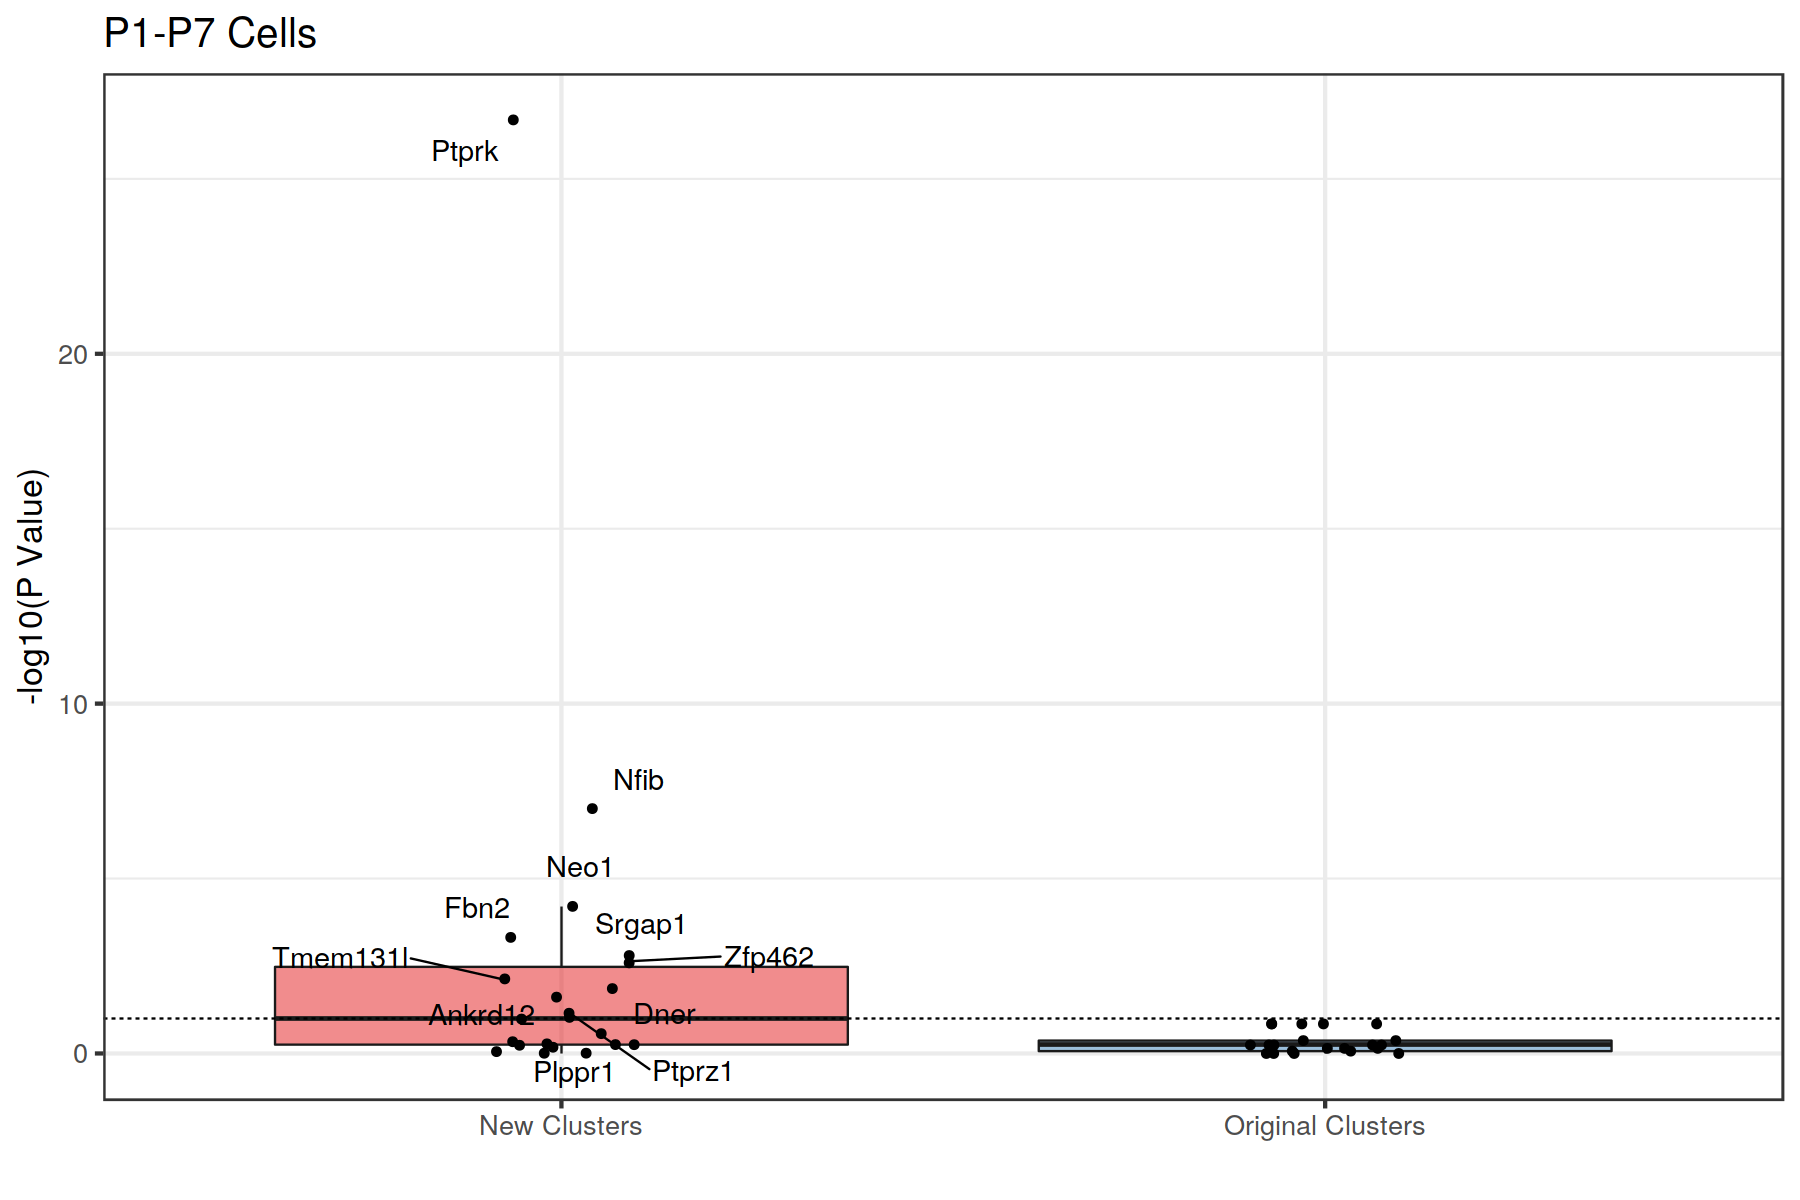

In [20]:
## P1-7
gadD = c()
targetGeneList = alls$'P1-7'[alls$'P1-7' %in% colnames(GADgeneAll)]
#targetGeneList = alls$'Neuron' #gene_lists[[cellTypeNameList[1]]]

for(targetGene in targetGeneList){ 
    gad = data.frame(names = rownames(all), gene = all[, colnames(all) == targetGene], type = "GAD", targetGene = targetGene) %>% cbind(umapD, .) %>% 
            select(X1, X2, cellType, score = gene, type, targetGene)
    gadD = rbind(gadD, gad)
    
}
neuronSub = gadD %>% filter(X1 >=-7.5, X1 <=2.5, X2 >= 0, X2 <= 5.2)
neuronSub$newCellType = "Neonatal Neuron 1"
neuronSub$newCellType[neuronSub$X1 >=-3.2] = "Neonatal Neuron 2"

ind = which(rownames(all) %in% rownames(neuronSub))

pData = c()
neuronMap = GADgeneAll[ind, targetGeneList] %>% data.frame %>% mutate(cellType = neuronSub[1:length(ind), ] %$% newCellType) %>% arrange(cellType)
ind1 = which(neuronMap$cellType == "Neonatal Neuron 1")
ind2 = which(neuronMap$cellType != "Neonatal Neuron 1")


cell_types <- unique(neuronMap$cellType)
cell_data <- list()
for (cell_type in cell_types) {
    cell_data[[cell_type]] = neuronMap %>% filter(cellType == cell_type)
}

xvars <- colnames(neuronMap)
t_test_ans <- list()
for (xv in xvars) {
    if (xv == 'cellType') next
    x1 <- cell_data[[cell_types[1]]][,xv]
    x2 <- cell_data[[cell_types[2]]][,xv]
    t_test_ans[[xv]] <- wilcox.test(x1, x2, alternative = "two.sided")$p.value #t.test(x1, x2)$p.value
}

t_test_res <- bind_rows(t_test_ans) %>%
    pivot_longer(everything(), names_to = c("gene"), values_to = "pvalue") %>%
    arrange(pvalue) 

pData = t_test_res %>% mutate(type = "New Clusters")

neuronMap = GADgeneAll[ind, targetGeneList] %>% data.frame %>% mutate(cellType = neuronSub[1:length(ind), ] %$% cellType) %>% arrange(cellType)
ind1 = which(neuronMap$cellType == "Neonatal Neuron 1")
ind2 = which(neuronMap$cellType != "Neonatal Neuron 1")



cell_types <- unique(neuronMap$cellType)
cell_data <- list()
for (cell_type in cell_types) {
    cell_data[[cell_type]] = neuronMap %>% filter(cellType == cell_type)
}

xvars <- colnames(neuronMap)
t_test_ans <- list()
for (xv in xvars) {
    if (xv == 'cellType') next
    x1 <- cell_data[[cell_types[1]]][,xv]
    x2 <- cell_data[[cell_types[2]]][,xv]
    t_test_ans[[xv]] <- wilcox.test(x1, x2, alternative = "two.sided")$p.value #t.test(x1, x2)$p.value
}

t_test_res <- bind_rows(t_test_ans) %>%
    pivot_longer(everything(), names_to = c("gene"), values_to = "pvalue") %>%
    arrange(pvalue) 

pData = rbind(pData, t_test_res %>% mutate(type = "Original Clusters"))
sigGADgene = pData %>% filter(pvalue <= 0.1) %$% gene
saveRDS(sigGADgene, file = paste0("/Tan2021/RDS/sigGADgene_P1-7.rds"))


pos = position_jitter(width = 0.1, seed = 2)
newClusterTest1 = pData %>% ggplot(aes(x = type, y = -log10(pvalue), fill = type, label = gene)) +
    geom_boxplot(outlier.shape = NA, alpha = 0.5, color = "grey10") +
    geom_jitter( size = 2, position = pos) +
    geom_hline(yintercept = -log10(0.1), linetype = "dashed") +
    geom_text_repel(data = subset(pData, pvalue <= 0.1), aes(x = type, y = -log10(pvalue), label = gene), position = pos, max.overlaps = Inf, size = 6, min.segment.length = 2, box.padding = 0.75) +
    theme_bw(base_size = 20) +
    xlab("") +
    ylab("-log10(P Value)") +
    ggpubr::rremove("legend") +
    scale_fill_brewer(palette = "Set1") +
ggtitle("P1-P7 Cells")

newClusterTest1

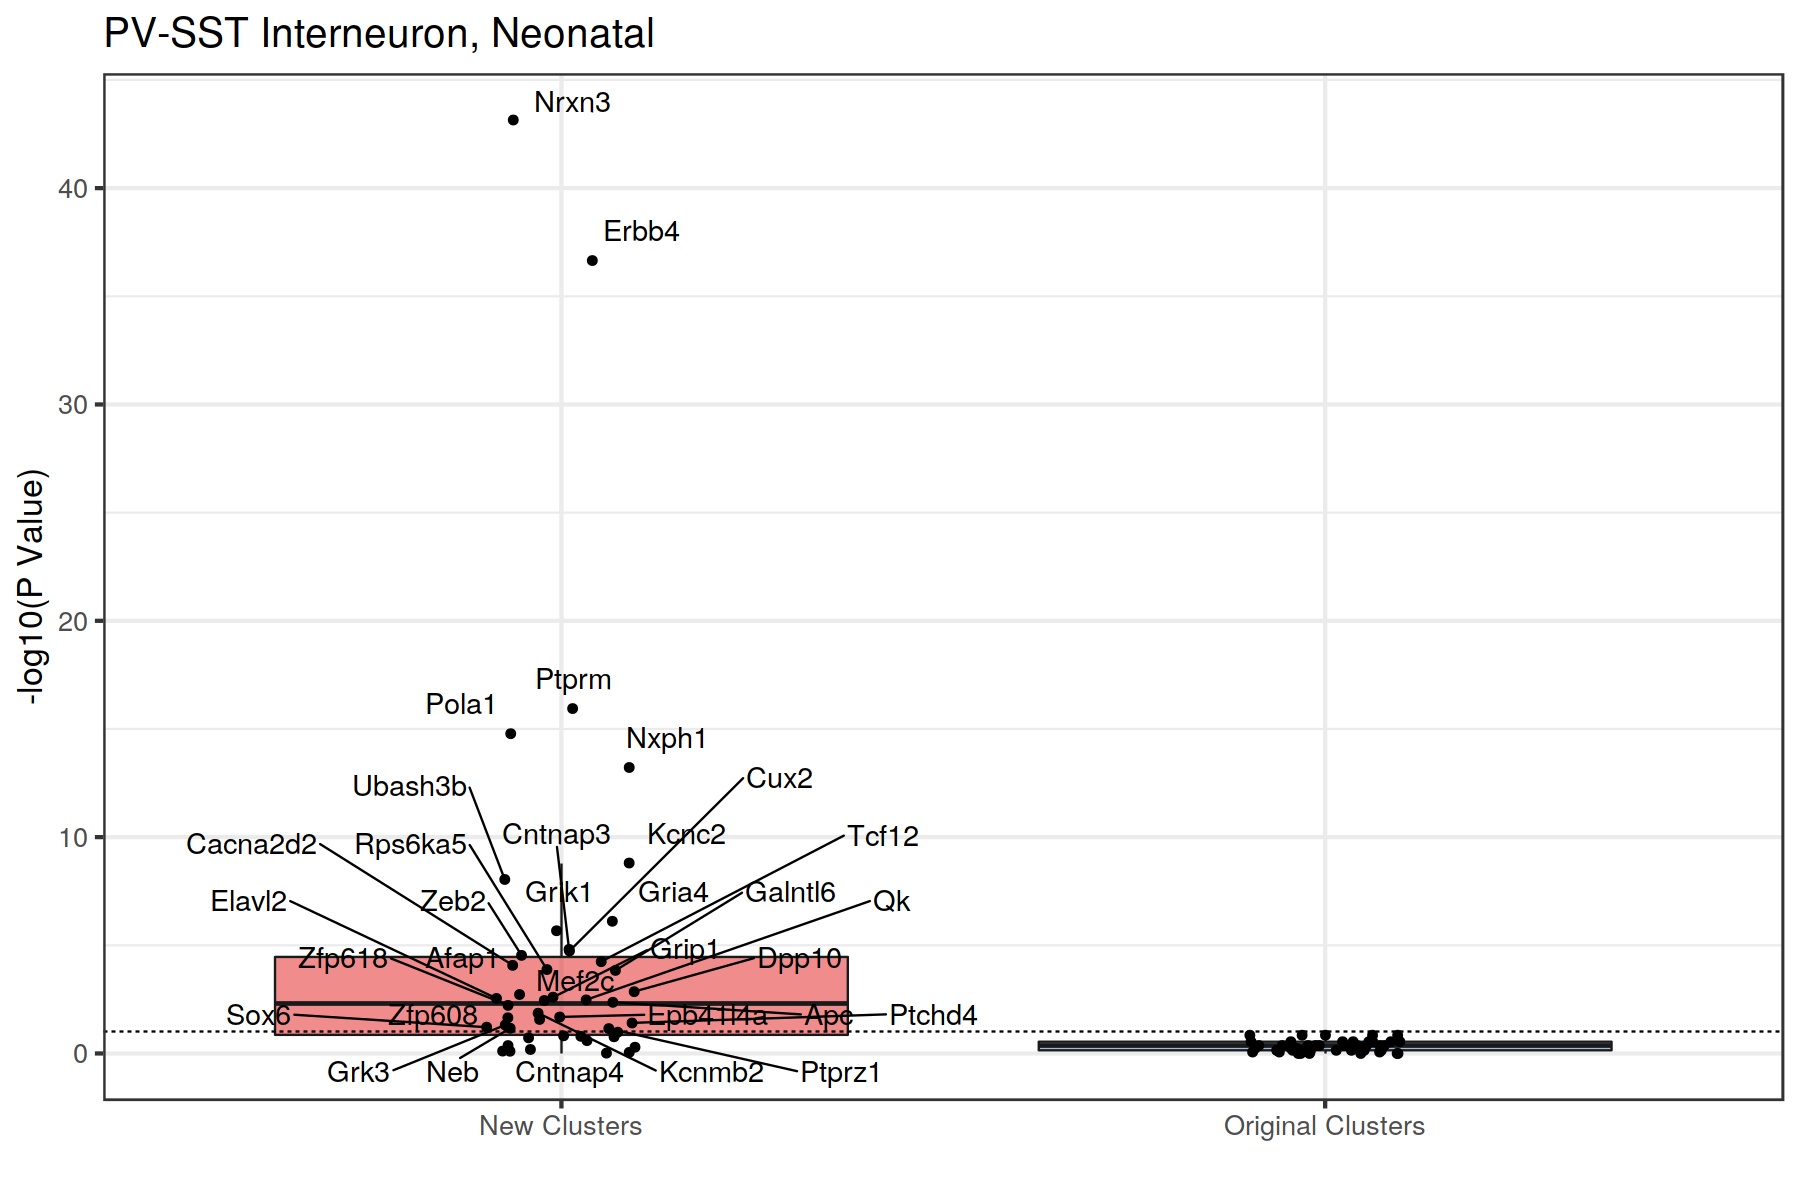

In [21]:

gadD = c()
targetGeneList = alls$'PV-SST Interneuron, Neonatal'[alls$'PV-SST Interneuron, Neonatal' %in% colnames(GADgeneAll)]
#targetGeneList = alls$'Neuron' #gene_lists[[cellTypeNameList[1]]]

for(targetGene in targetGeneList){ 
    ind = which(rownames(RNA_SeuratObj@assays$RNA@counts) == targetGene)
#     rna = data.frame(names = colnames(RNA_SeuratObj@assays$RNA@counts), gene = RNA_logCount[ind, ] %>% as.vector, type = "RNA", targetGene = targetGene) %>% 
#             cbind(rnaUMAPD, .) %>% select(X1, X2, cellType, score = gene, type, targetGene)
    gad = data.frame(names = rownames(all), gene = all[, colnames(all) == targetGene], type = "GAD", targetGene = targetGene) %>% cbind(umapD, .) %>% 
            select(X1, X2, cellType, score = gene, type, targetGene)
    
#     rnaD = rbind(rnaD, rna)
    gadD = rbind(gadD, gad)

    
}
neuronSub = gadD %>% filter(X1 >=-7.5, X1 <=2.5, X2 >= 0, X2 <= 5.2)
neuronSub$newCellType = "Neonatal Neuron 1"
neuronSub$newCellType[neuronSub$X1 >=-3.2] = "Neonatal Neuron 2"

ind = which(rownames(all) %in% rownames(neuronSub))

# alls$'Neuron'
# gene_lists[[cellTypeNameList[1]]]
# head(neuronSub)
# head(all)

pData = c()
neuronMap = GADgeneAll[ind, targetGeneList] %>% data.frame %>% mutate(cellType = neuronSub[1:length(ind), ] %$% newCellType) %>% arrange(cellType)
ind1 = which(neuronMap$cellType == "Neonatal Neuron 1")
ind2 = which(neuronMap$cellType != "Neonatal Neuron 1")


cell_types <- unique(neuronMap$cellType)
cell_data <- list()
for (cell_type in cell_types) {
    cell_data[[cell_type]] = neuronMap %>% filter(cellType == cell_type)
}

xvars <- colnames(neuronMap)
t_test_ans <- list()
for (xv in xvars) {
    if (xv == 'cellType') next
    x1 <- cell_data[[cell_types[1]]][,xv]
    x2 <- cell_data[[cell_types[2]]][,xv]
    t_test_ans[[xv]] <- wilcox.test(x1, x2, alternative = "two.sided")$p.value #t.test(x1, x2)$p.value
}

t_test_res <- bind_rows(t_test_ans) %>%
    pivot_longer(everything(), names_to = c("gene"), values_to = "pvalue") %>%
    arrange(pvalue) 

pData = t_test_res %>% mutate(type = "New Clusters")

neuronMap = GADgeneAll[ind, targetGeneList] %>% data.frame %>% mutate(cellType = neuronSub[1:length(ind), ] %$% cellType) %>% arrange(cellType)
ind1 = which(neuronMap$cellType == "Neonatal Neuron 1")
ind2 = which(neuronMap$cellType != "Neonatal Neuron 1")



cell_types <- unique(neuronMap$cellType)
cell_data <- list()
for (cell_type in cell_types) {
    cell_data[[cell_type]] = neuronMap %>% filter(cellType == cell_type)
}

xvars <- colnames(neuronMap)
t_test_ans <- list()
for (xv in xvars) {
    if (xv == 'cellType') next
    x1 <- cell_data[[cell_types[1]]][,xv]
    x2 <- cell_data[[cell_types[2]]][,xv]
    t_test_ans[[xv]] <- wilcox.test(x1, x2, alternative = "two.sided")$p.value #t.test(x1, x2)$p.value
}

t_test_res <- bind_rows(t_test_ans) %>%
    pivot_longer(everything(), names_to = c("gene"), values_to = "pvalue") %>%
    arrange(pvalue) 

pData = rbind(pData, t_test_res %>% mutate(type = "Original Clusters"))
sigGADgene = pData %>% filter(pvalue <= 0.1) %$% gene
saveRDS(sigGADgene, file = paste0("/Tan2021/RDS/sigGADgene_Interneuron_Neonatal.rds"))


pos = position_jitter(width = 0.1, seed = 2)
newClusterTest2 = pData %>% ggplot(aes(x = type, y = -log10(pvalue), fill = type, label = gene)) +
    geom_boxplot(outlier.shape = NA, alpha = 0.5, color = "grey10") +
    geom_jitter( size = 2, position = pos) +
    geom_hline(yintercept = -log10(0.1), linetype = "dashed") +
    geom_text_repel(data = subset(pData, pvalue <= 0.1), aes(x = type, y = -log10(pvalue), label = gene), position = pos, max.overlaps = Inf, size = 6, min.segment.length = 2, box.padding = 0.75) +
    theme_bw(base_size = 20) +
    xlab("") +
    ylab("-log10(P Value)") +
    ggpubr::rremove("legend") +
    scale_fill_brewer(palette = "Set1") +
ggtitle("PV-SST Interneuron, Neonatal")

newClusterTest2

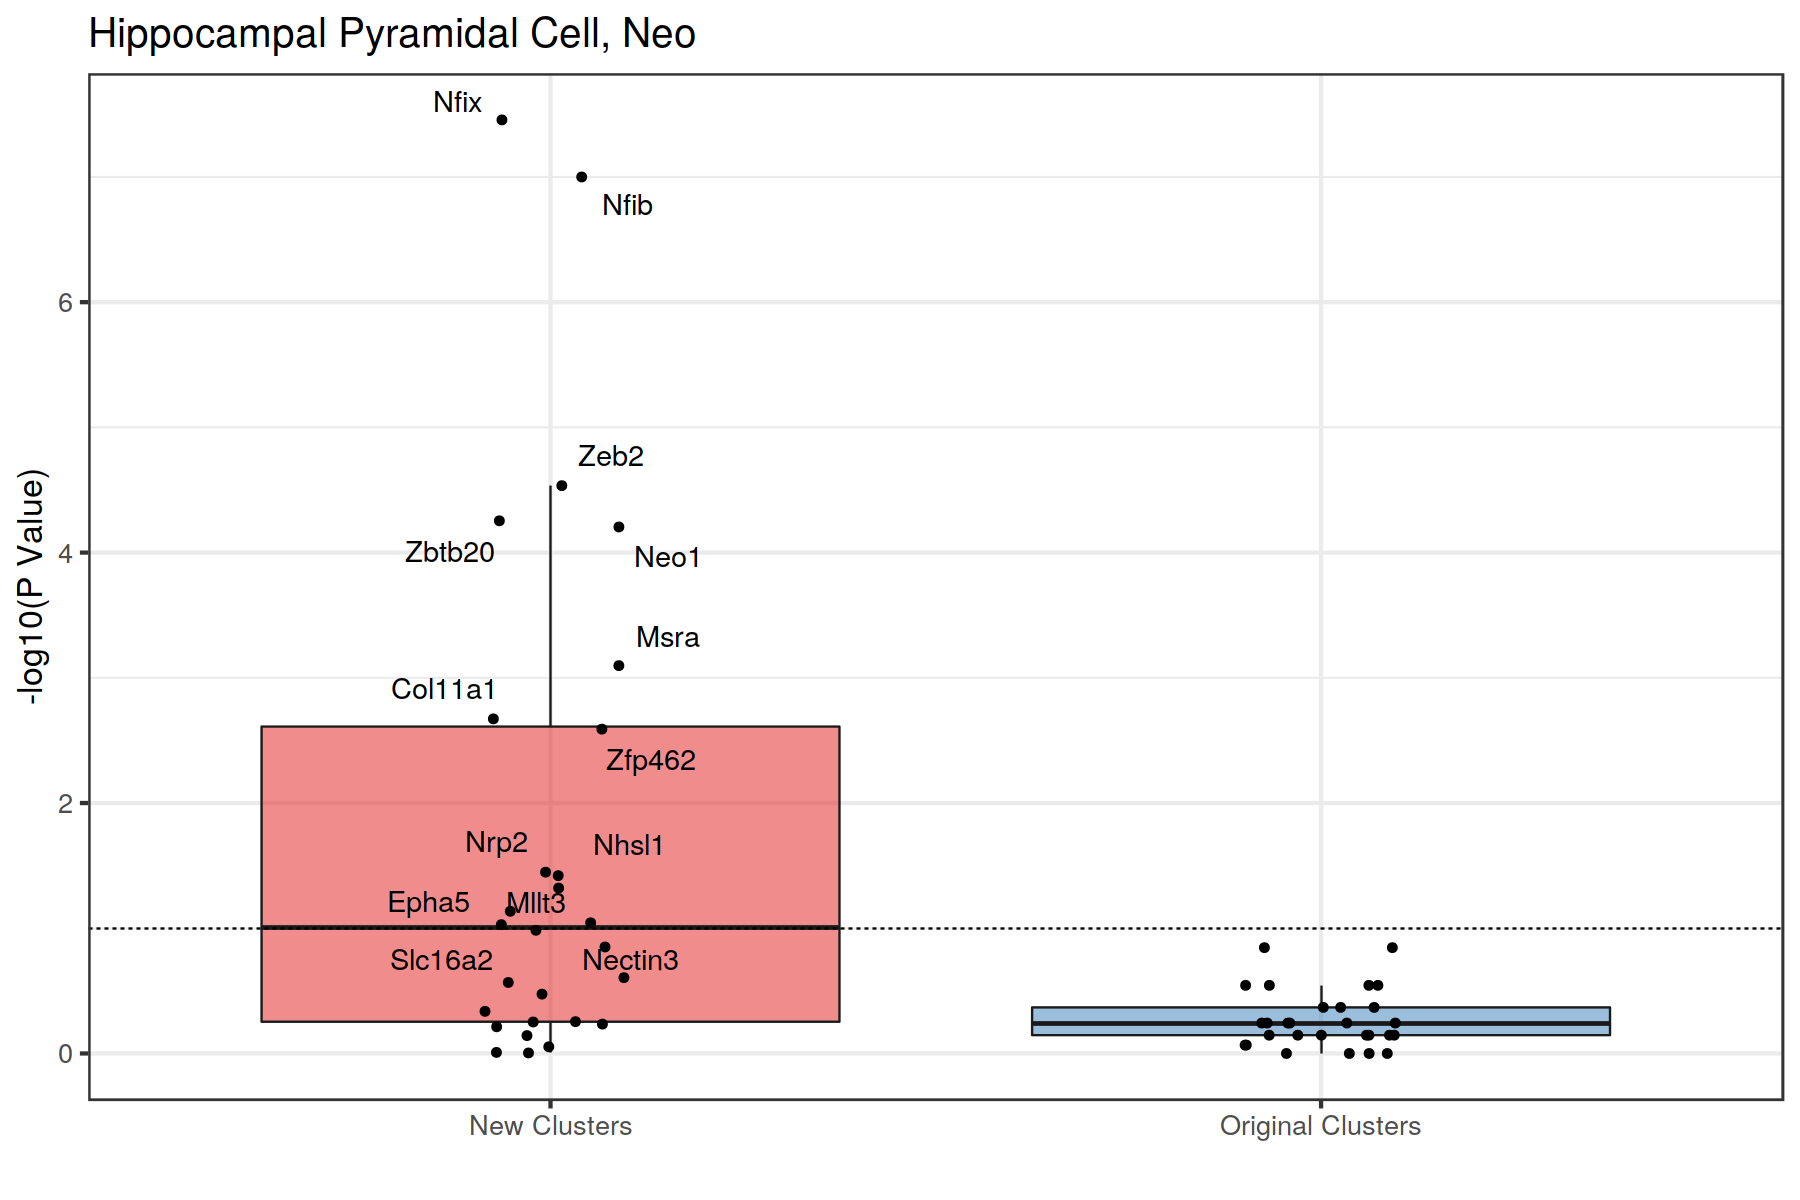

In [22]:

gadD = c()
targetGeneList = alls$'Hippocampal Pyramidal Cell, Neo'[alls$'Hippocampal Pyramidal Cell, Neo' %in% colnames(GADgeneAll)]
#targetGeneList = alls$'Neuron' #gene_lists[[cellTypeNameList[1]]]

for(targetGene in targetGeneList){ 
    ind = which(rownames(RNA_SeuratObj@assays$RNA@counts) == targetGene)
#     rna = data.frame(names = colnames(RNA_SeuratObj@assays$RNA@counts), gene = RNA_logCount[ind, ] %>% as.vector, type = "RNA", targetGene = targetGene) %>% 
#             cbind(rnaUMAPD, .) %>% select(X1, X2, cellType, score = gene, type, targetGene)
    gad = data.frame(names = rownames(all), gene = all[, colnames(all) == targetGene], type = "GAD", targetGene = targetGene) %>% cbind(umapD, .) %>% 
            select(X1, X2, cellType, score = gene, type, targetGene)
    
#     rnaD = rbind(rnaD, rna)
    gadD = rbind(gadD, gad)

    
}
neuronSub = gadD %>% filter(X1 >=-7.5, X1 <=2.5, X2 >= 0, X2 <= 5.2)
neuronSub$newCellType = "Neonatal Neuron 1"
neuronSub$newCellType[neuronSub$X1 >=-3.2] = "Neonatal Neuron 2"

ind = which(rownames(all) %in% rownames(neuronSub))

# alls$'Neuron'
# gene_lists[[cellTypeNameList[1]]]
# head(neuronSub)
# head(all)

pData = c()
neuronMap = GADgeneAll[ind, targetGeneList] %>% data.frame %>% mutate(cellType = neuronSub[1:length(ind), ] %$% newCellType) %>% arrange(cellType)
ind1 = which(neuronMap$cellType == "Neonatal Neuron 1")
ind2 = which(neuronMap$cellType != "Neonatal Neuron 1")


cell_types <- unique(neuronMap$cellType)
cell_data <- list()
for (cell_type in cell_types) {
    cell_data[[cell_type]] = neuronMap %>% filter(cellType == cell_type)
}

xvars <- colnames(neuronMap)
t_test_ans <- list()
for (xv in xvars) {
    if (xv == 'cellType') next
    x1 <- cell_data[[cell_types[1]]][,xv]
    x2 <- cell_data[[cell_types[2]]][,xv]
    t_test_ans[[xv]] <- wilcox.test(x1, x2, alternative = "two.sided")$p.va #t.test(x1, x2)$p.value
}

t_test_res <- bind_rows(t_test_ans) %>%
    pivot_longer(everything(), names_to = c("gene"), values_to = "pvalue") %>%
    arrange(pvalue) 

pData = t_test_res %>% mutate(type = "New Clusters")

neuronMap = GADgeneAll[ind, targetGeneList] %>% data.frame %>% mutate(cellType = neuronSub[1:length(ind), ] %$% cellType) %>% arrange(cellType)
ind1 = which(neuronMap$cellType == "Neonatal Neuron 1")
ind2 = which(neuronMap$cellType != "Neonatal Neuron 1")



cell_types <- unique(neuronMap$cellType)
cell_data <- list()
for (cell_type in cell_types) {
    cell_data[[cell_type]] = neuronMap %>% filter(cellType == cell_type)
}

xvars <- colnames(neuronMap)
t_test_ans <- list()
for (xv in xvars) {
    if (xv == 'cellType') next
    x1 <- cell_data[[cell_types[1]]][,xv]
    x2 <- cell_data[[cell_types[2]]][,xv]
    t_test_ans[[xv]] <- wilcox.test(x1, x2, alternative = "two.sided")$p.va #t.test(x1, x2)$p.value
}

t_test_res <- bind_rows(t_test_ans) %>%
    pivot_longer(everything(), names_to = c("gene"), values_to = "pvalue") %>%
    arrange(pvalue) 

pData = rbind(pData, t_test_res %>% mutate(type = "Original Clusters"))
sigGADgene = pData %>% filter(pvalue <= 0.1) %$% gene
saveRDS(sigGADgene, file = paste0("/Tan2021/RDS/sigGADgene_Hippocampal_Pyramidal_Neonatal.rds"))

pos = position_jitter(width = 0.1, seed = 2)
newClusterTest3 = pData %>% ggplot(aes(x = type, y = -log10(pvalue), fill = type, label = gene)) +
    geom_boxplot(outlier.shape = NA, alpha = 0.5, color = "grey10") +
    geom_jitter( size = 2, position = pos) +
    geom_hline(yintercept = -log10(0.1), linetype = "dashed") +
    geom_text_repel(data = subset(pData, pvalue <= 0.1), aes(x = type, y = -log10(pvalue), label = gene), position = pos, max.overlaps = Inf, size = 6, min.segment.length = 2, box.padding = 0.75) +
    theme_bw(base_size = 20) +
    xlab("") +
    ylab("-log10(P Value)") +
    ggpubr::rremove("legend") +
    scale_fill_brewer(palette = "Set1") +
ggtitle("Hippocampal Pyramidal Cell, Neo")

newClusterTest3

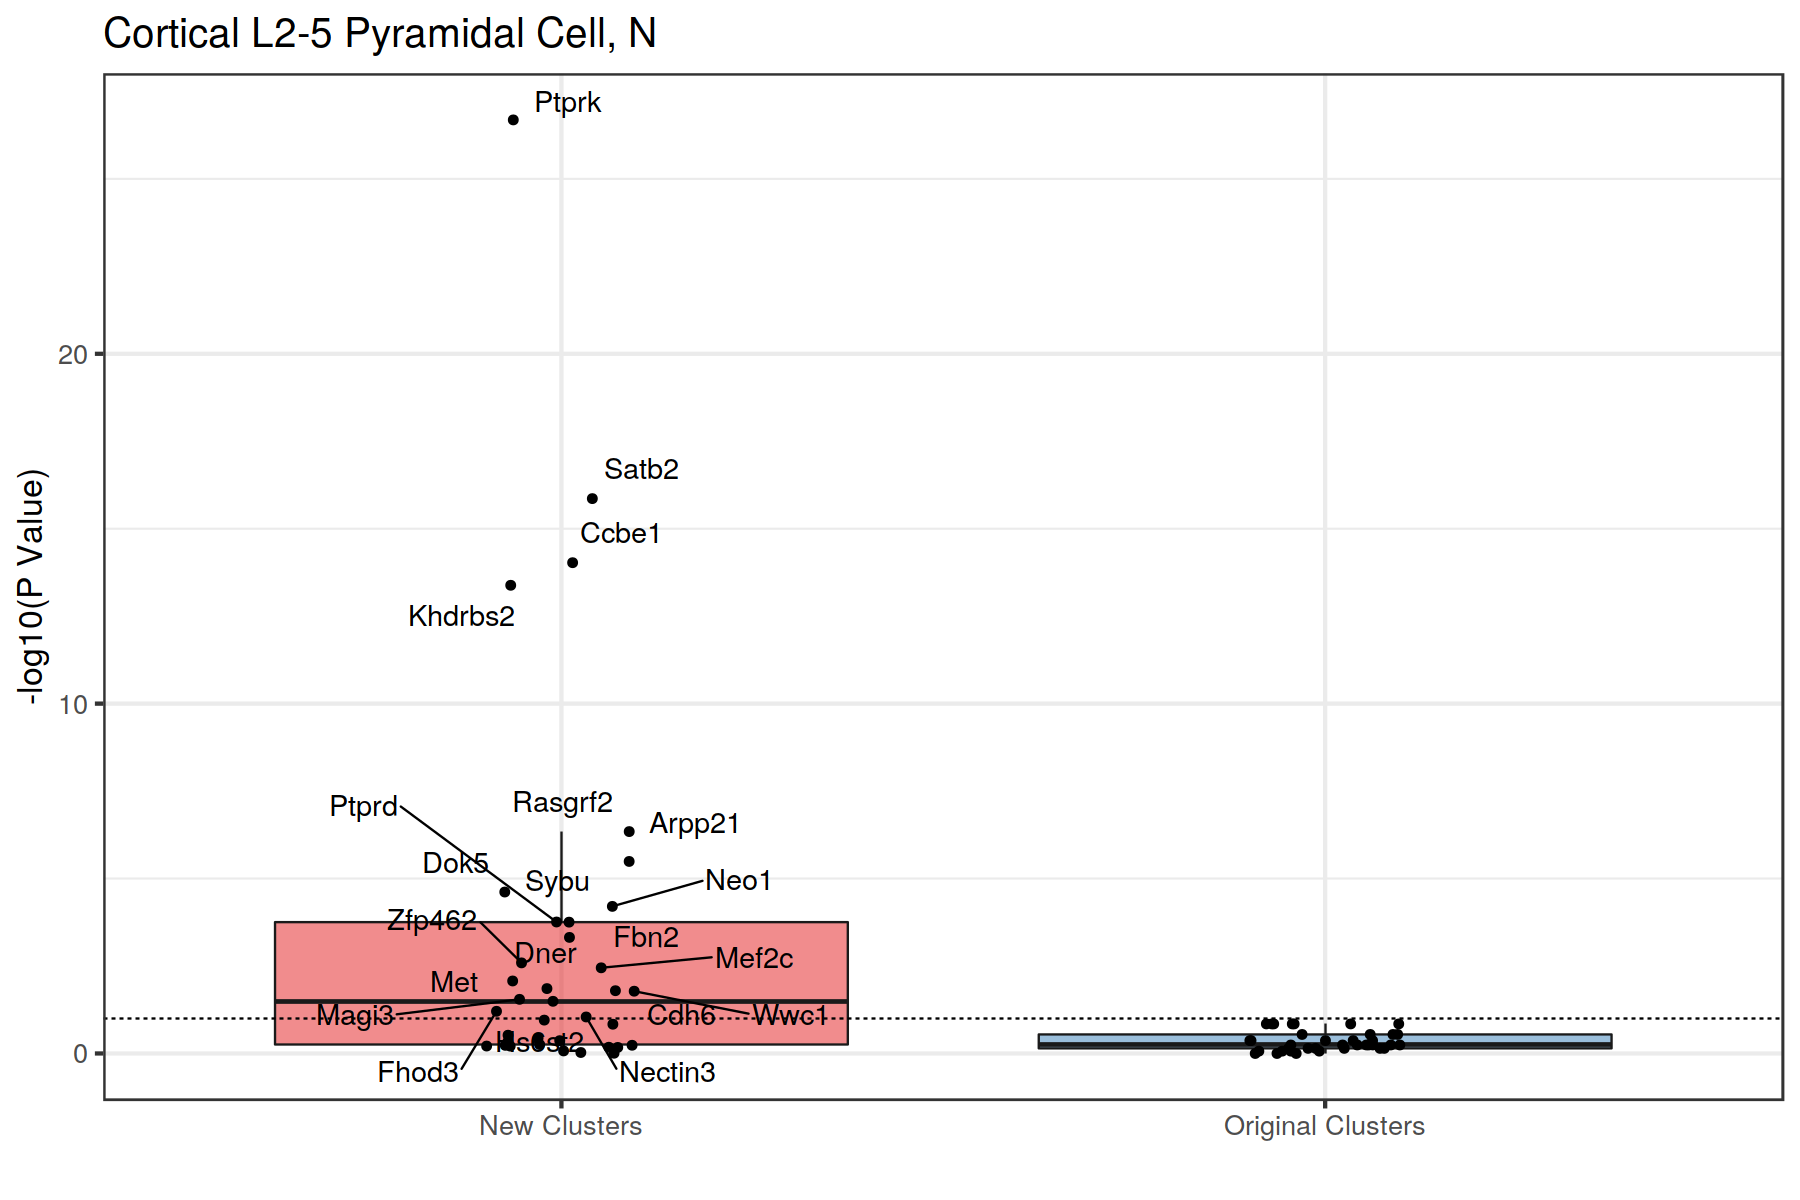

In [23]:

gadD = c()
targetGeneList = alls$'Cortical L2-5 Pyramidal Cell, N'[alls$'Cortical L2-5 Pyramidal Cell, N' %in% colnames(GADgeneAll)]
#targetGeneList = alls$'Neuron' #gene_lists[[cellTypeNameList[1]]]

for(targetGene in targetGeneList){ 
    ind = which(rownames(RNA_SeuratObj@assays$RNA@counts) == targetGene)
#     rna = data.frame(names = colnames(RNA_SeuratObj@assays$RNA@counts), gene = RNA_logCount[ind, ] %>% as.vector, type = "RNA", targetGene = targetGene) %>% 
#             cbind(rnaUMAPD, .) %>% select(X1, X2, cellType, score = gene, type, targetGene)
    gad = data.frame(names = rownames(all), gene = all[, colnames(all) == targetGene], type = "GAD", targetGene = targetGene) %>% cbind(umapD, .) %>% 
            select(X1, X2, cellType, score = gene, type, targetGene)
    
#     rnaD = rbind(rnaD, rna)
    gadD = rbind(gadD, gad)

    
}
neuronSub = gadD %>% filter(X1 >=-7.5, X1 <=2.5, X2 >= 0, X2 <= 5.2)
neuronSub$newCellType = "Neonatal Neuron 1"
neuronSub$newCellType[neuronSub$X1 >=-3.2] = "Neonatal Neuron 2"

ind = which(rownames(all) %in% rownames(neuronSub))

# alls$'Neuron'
# gene_lists[[cellTypeNameList[1]]]
# head(neuronSub)
# head(all)

pData = c()
neuronMap = GADgeneAll[ind, targetGeneList] %>% data.frame %>% mutate(cellType = neuronSub[1:length(ind), ] %$% newCellType) %>% arrange(cellType)
ind1 = which(neuronMap$cellType == "Neonatal Neuron 1")
ind2 = which(neuronMap$cellType != "Neonatal Neuron 1")


cell_types <- unique(neuronMap$cellType)
cell_data <- list()
for (cell_type in cell_types) {
    cell_data[[cell_type]] = neuronMap %>% filter(cellType == cell_type)
}

xvars <- colnames(neuronMap)
t_test_ans <- list()
for (xv in xvars) {
    if (xv == 'cellType') next
    x1 <- cell_data[[cell_types[1]]][,xv]
    x2 <- cell_data[[cell_types[2]]][,xv]
    t_test_ans[[xv]] <- wilcox.test(x1, x2, alternative = "two.sided")$p.value #t.test(x1, x2)$p.value
}

t_test_res <- bind_rows(t_test_ans) %>%
    pivot_longer(everything(), names_to = c("gene"), values_to = "pvalue") %>%
    arrange(pvalue) 

pData = t_test_res %>% mutate(type = "New Clusters")

neuronMap = GADgeneAll[ind, targetGeneList] %>% data.frame %>% mutate(cellType = neuronSub[1:length(ind), ] %$% cellType) %>% arrange(cellType)
ind1 = which(neuronMap$cellType == "Neonatal Neuron 1")
ind2 = which(neuronMap$cellType != "Neonatal Neuron 1")



cell_types <- unique(neuronMap$cellType)
cell_data <- list()
for (cell_type in cell_types) {
    cell_data[[cell_type]] = neuronMap %>% filter(cellType == cell_type)
}

xvars <- colnames(neuronMap)
t_test_ans <- list()
for (xv in xvars) {
    if (xv == 'cellType') next
    x1 <- cell_data[[cell_types[1]]][,xv]
    x2 <- cell_data[[cell_types[2]]][,xv]
    t_test_ans[[xv]] <- wilcox.test(x1, x2, alternative = "two.sided")$p.value #t.test(x1, x2)$p.value
}

t_test_res <- bind_rows(t_test_ans) %>%
    pivot_longer(everything(), names_to = c("gene"), values_to = "pvalue") %>%
    arrange(pvalue) 

pData = rbind(pData, t_test_res %>% mutate(type = "Original Clusters"))
sigGADgene = pData %>% filter(pvalue <= 0.1) %$% gene
saveRDS(sigGADgene, file = paste0("/Tan2021/RDS/sigGADgene_Cortical_L2-5_Pyramidal_Neonatal.rds"))


pos = position_jitter(width = 0.1, seed = 2)
newClusterTest4 = pData %>% ggplot(aes(x = type, y = -log10(pvalue), fill = type, label = gene)) +
    geom_boxplot(outlier.shape = NA, alpha = 0.5, color = "grey10") +
    geom_jitter( size = 2, position = pos) +
    geom_hline(yintercept = -log10(0.1), linetype = "dashed") +
    geom_text_repel(data = subset(pData, pvalue <= 0.1), aes(x = type, y = -log10(pvalue), label = gene), position = pos, max.overlaps = Inf, size = 6, min.segment.length = 2, box.padding = 0.75) +
    theme_bw(base_size = 20) +
    xlab("") +
    ylab("-log10(P Value)") +
    ggpubr::rremove("legend") +
    scale_fill_brewer(palette = "Set1") +
ggtitle("Cortical L2-5 Pyramidal Cell, N")
newClusterTest4

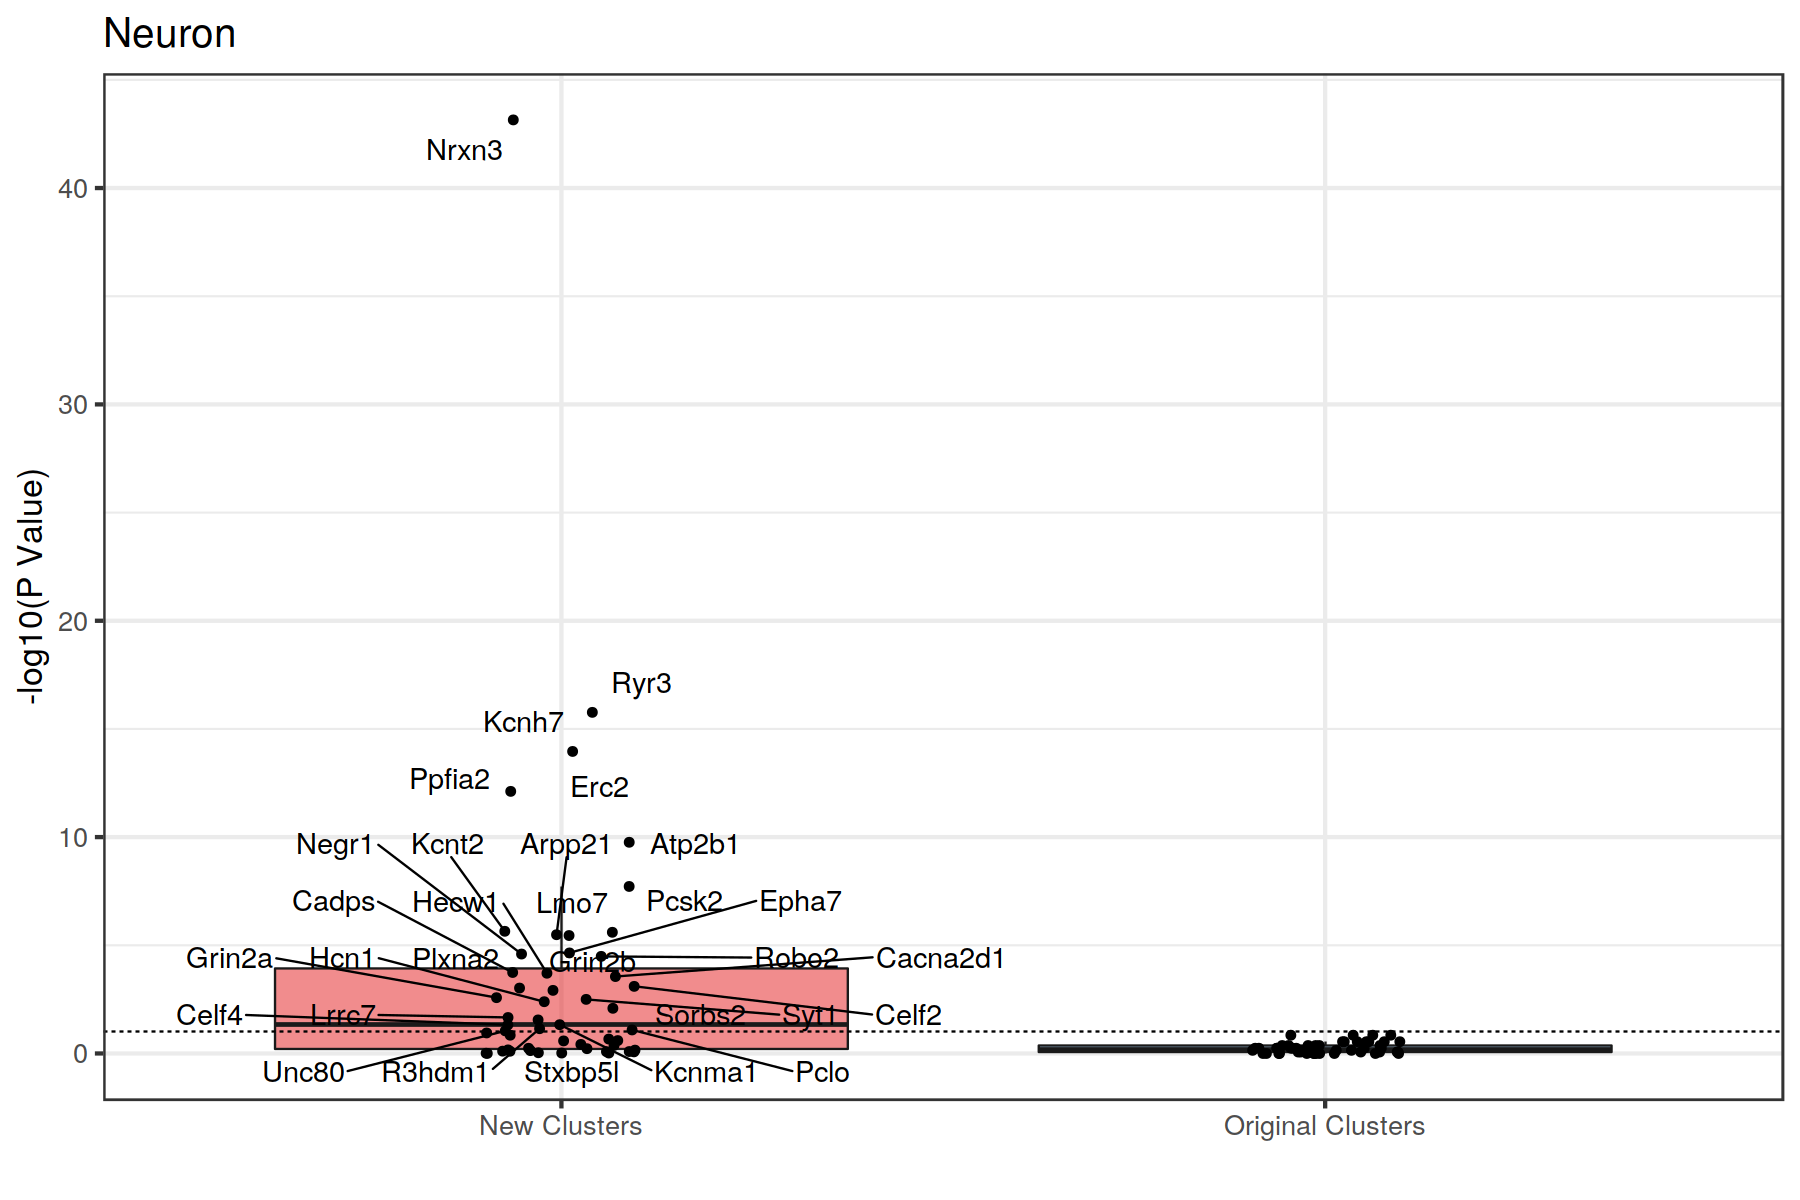

In [24]:
options(repr.plot.width=15, repr.plot.height=10)
gadD = c()
targetGeneList = alls$'Neuron'[alls$'Neuron' %in% colnames(GADgeneAll)]
#targetGeneList = alls$'Neuron' #gene_lists[[cellTypeNameList[1]]]

for(targetGene in targetGeneList){ 
    ind = which(rownames(RNA_SeuratObj@assays$RNA@counts) == targetGene)
#     rna = data.frame(names = colnames(RNA_SeuratObj@assays$RNA@counts), gene = RNA_logCount[ind, ] %>% as.vector, type = "RNA", targetGene = targetGene) %>% 
#             cbind(rnaUMAPD, .) %>% select(X1, X2, cellType, score = gene, type, targetGene)
    gad = data.frame(names = rownames(all), gene = all[, colnames(all) == targetGene], type = "GAD", targetGene = targetGene) %>% cbind(umapD, .) %>% 
            select(X1, X2, cellType, score = gene, type, targetGene)
    
#     rnaD = rbind(rnaD, rna)
    gadD = rbind(gadD, gad)

    
}
neuronSub = gadD %>% filter(X1 >=-7.5, X1 <=2.5, X2 >= 0, X2 <= 5.2)
neuronSub$newCellType = "Neonatal Neuron 1"
neuronSub$newCellType[neuronSub$X1 >=-3.2] = "Neonatal Neuron 2"

ind = which(rownames(all) %in% rownames(neuronSub))

# alls$'Neuron'
# gene_lists[[cellTypeNameList[1]]]
# head(neuronSub)
# head(all)

pData = c()
neuronMap = GADgeneAll[ind, targetGeneList] %>% data.frame %>% mutate(cellType = neuronSub[1:length(ind), ] %$% newCellType) %>% arrange(cellType)
ind1 = which(neuronMap$cellType == "Neonatal Neuron 1")
ind2 = which(neuronMap$cellType != "Neonatal Neuron 1")


cell_types <- unique(neuronMap$cellType)
cell_data <- list()
for (cell_type in cell_types) {
    cell_data[[cell_type]] = neuronMap %>% filter(cellType == cell_type)
}

xvars <- colnames(neuronMap)
t_test_ans <- list()
for (xv in xvars) {
    if (xv == 'cellType') next
    x1 <- cell_data[[cell_types[1]]][,xv]
    x2 <- cell_data[[cell_types[2]]][,xv]
    t_test_ans[[xv]] <- wilcox.test(x1, x2, alternative = "two.sided")$p.value #t.test(x1, x2)$p.value
}

t_test_res <- bind_rows(t_test_ans) %>%
    pivot_longer(everything(), names_to = c("gene"), values_to = "pvalue") %>%
    arrange(pvalue) 

pData = t_test_res %>% mutate(type = "New Clusters")

neuronMap = GADgeneAll[ind, targetGeneList] %>% data.frame %>% mutate(cellType = neuronSub[1:length(ind), ] %$% cellType) %>% arrange(cellType)
ind1 = which(neuronMap$cellType == "Neonatal Neuron 1")
ind2 = which(neuronMap$cellType != "Neonatal Neuron 1")



cell_types <- unique(neuronMap$cellType)
cell_data <- list()
for (cell_type in cell_types) {
    cell_data[[cell_type]] = neuronMap %>% filter(cellType == cell_type)
}

xvars <- colnames(neuronMap)
t_test_ans <- list()
for (xv in xvars) {
    if (xv == 'cellType') next
    x1 <- cell_data[[cell_types[1]]][,xv]
    x2 <- cell_data[[cell_types[2]]][,xv]
    t_test_ans[[xv]] <- wilcox.test(x1, x2, alternative = "two.sided")$p.value #t.test(x1, x2)$p.value
}

t_test_res <- bind_rows(t_test_ans) %>%
    pivot_longer(everything(), names_to = c("gene"), values_to = "pvalue") %>%
    arrange(pvalue) 

pData = rbind(pData, t_test_res %>% mutate(type = "Original Clusters"))
sigGADgene = pData %>% filter(pvalue <= 0.1) %$% gene
saveRDS(sigGADgene, file = paste0("/Tan2021/RDS/sigGADgene_Cortical_L2-5_Pyramidal_Neonatal.rds"))


pos = position_jitter(width = 0.1, seed = 2)
newClusterTest5 = pData %>% ggplot(aes(x = type, y = -log10(pvalue), fill = type, label = gene)) +
    geom_boxplot(outlier.shape = NA, alpha = 0.5, color = "grey10") +
    geom_jitter( size = 2, position = pos) +
    geom_hline(yintercept = -log10(0.1), linetype = "dashed") +
    geom_text_repel(data = subset(pData, pvalue <= 0.1), aes(x = type, y = -log10(pvalue), label = gene), position = pos, max.overlaps = Inf, size = 6, min.segment.length = 2, box.padding = 0.75) +
    theme_bw(base_size = 20) +
    xlab("") +
    ylab("-log10(P Value)") +
    ggpubr::rremove("legend") +
    scale_fill_brewer(palette = "Set1") +
ggtitle("Neuron")
newClusterTest5

png 
  2

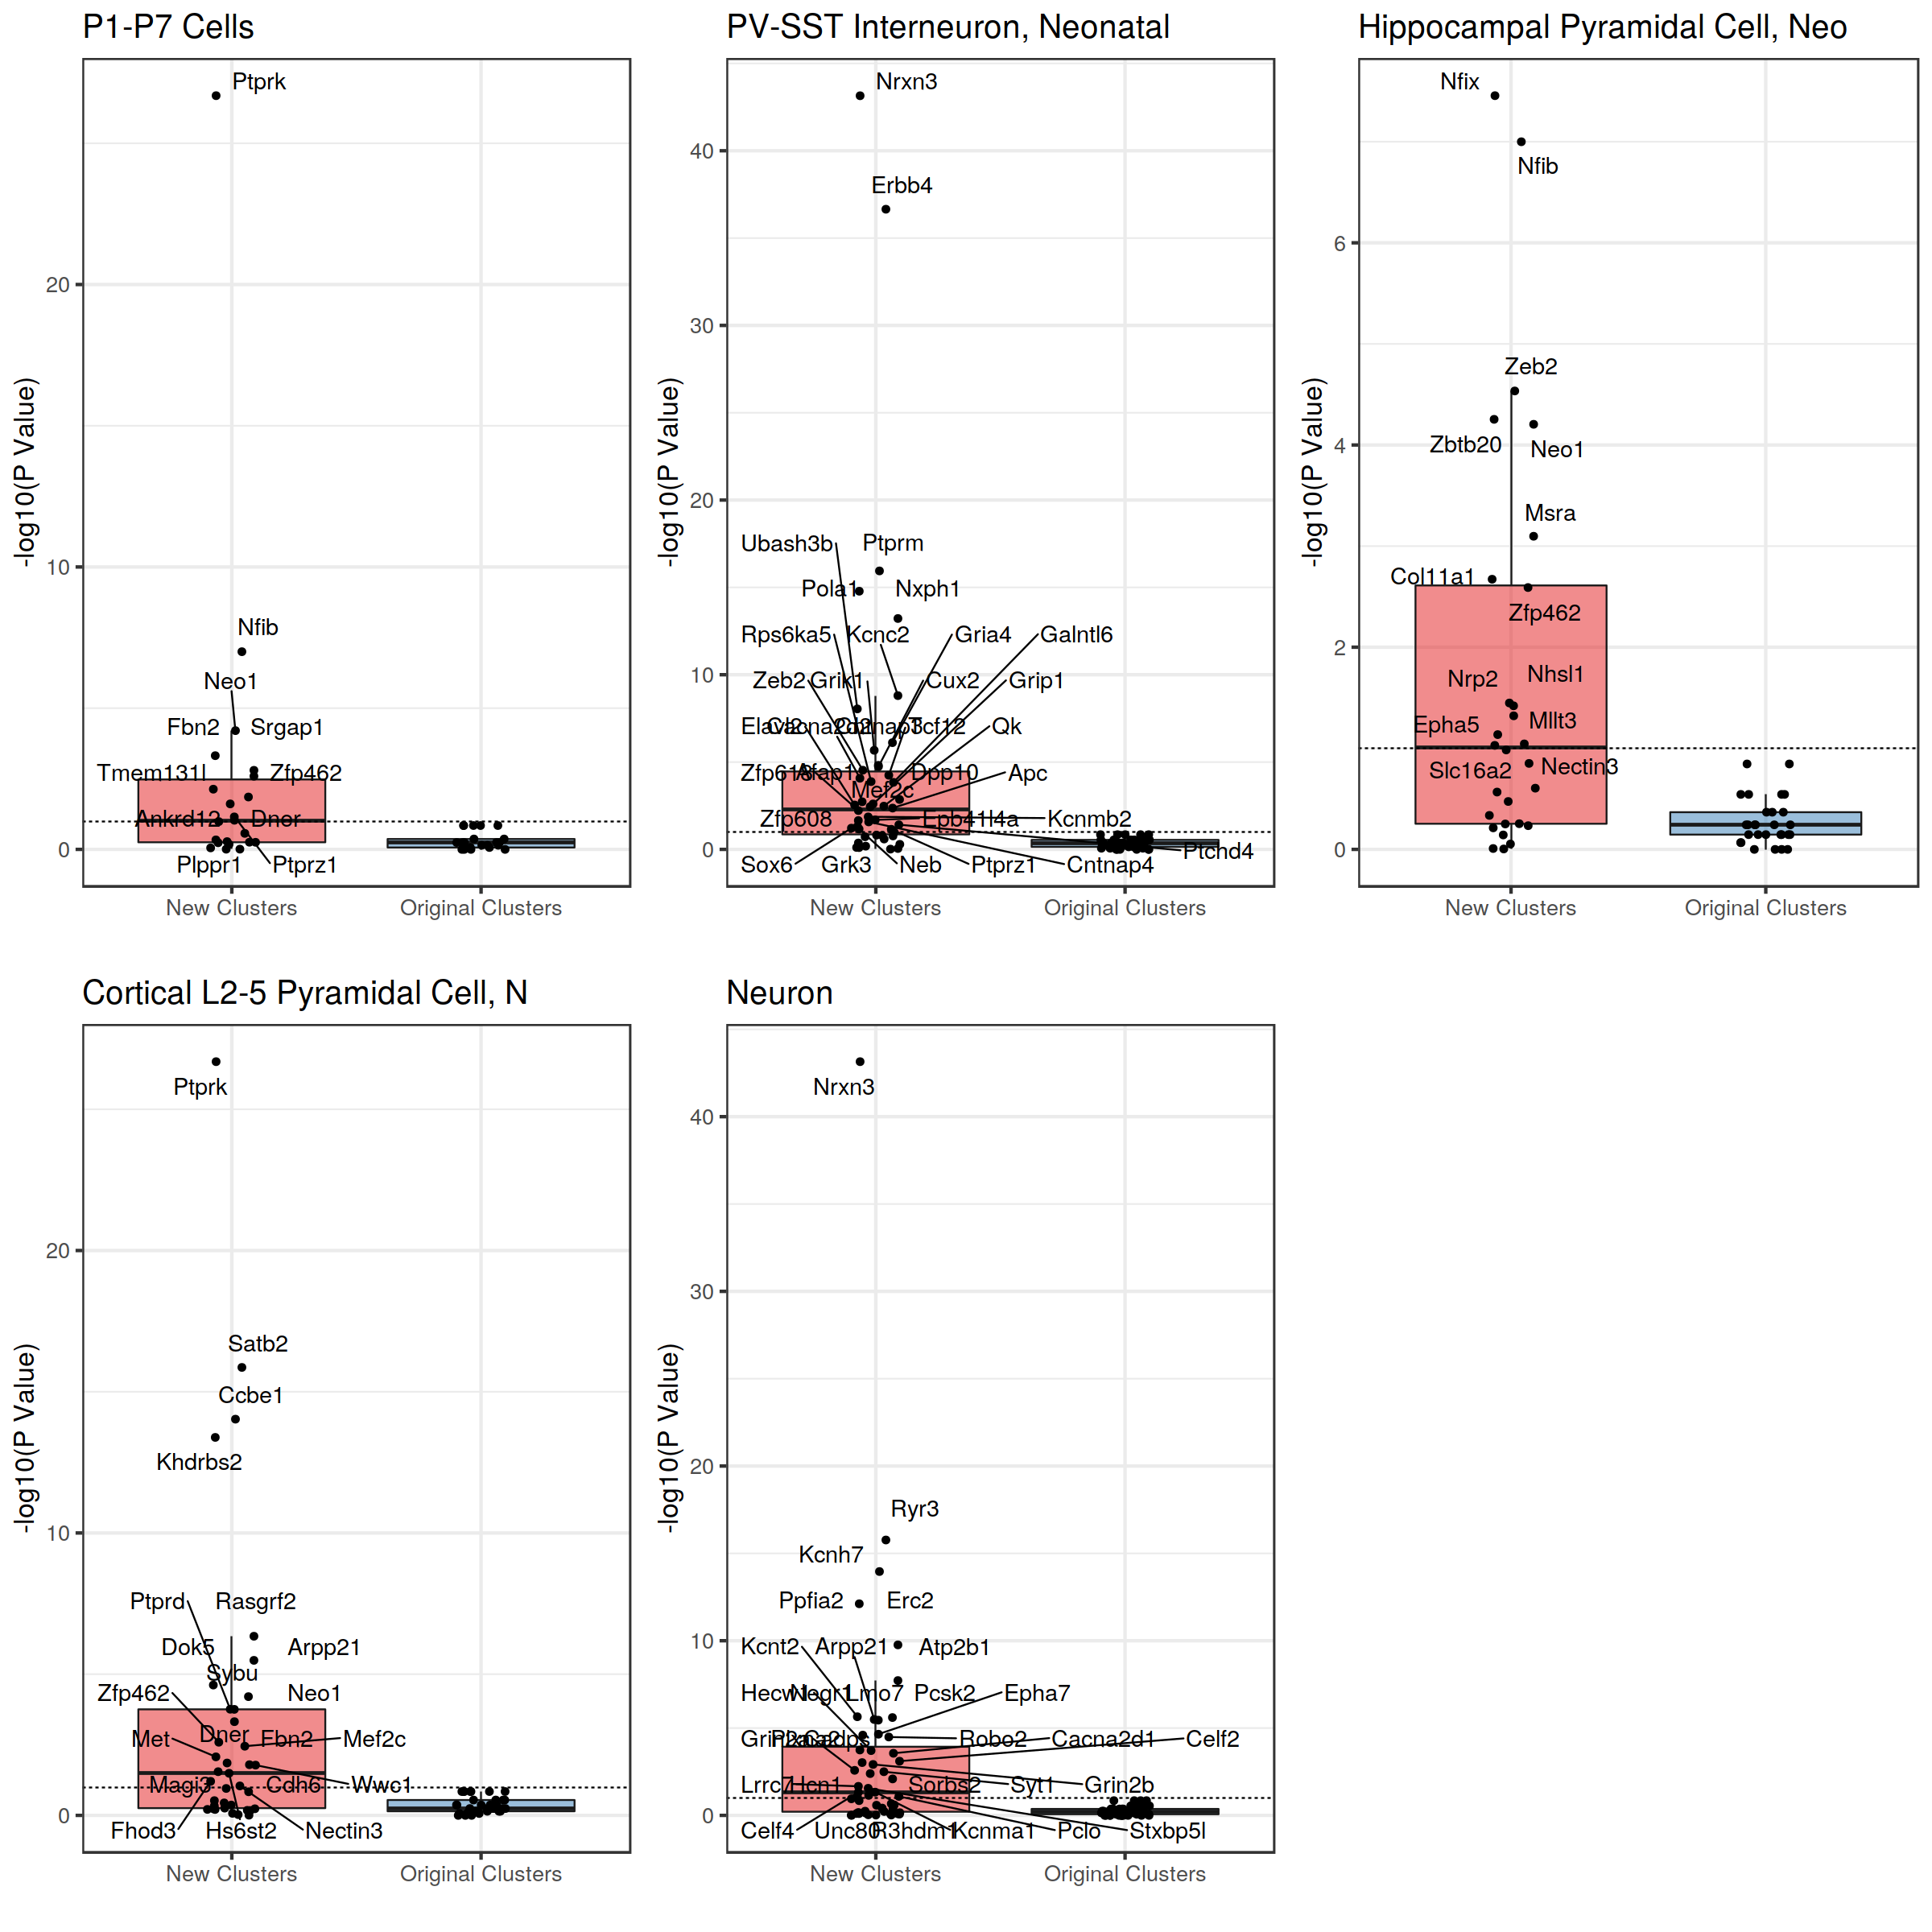

In [25]:
options(repr.plot.width=20, repr.plot.height=20)
pdf("/Figures/newCluster5categories.pdf", width = 20, height = 20)
ggarrange(newClusterTest1, newClusterTest2, newClusterTest3, newClusterTest4, newClusterTest5, nrow = 2, ncol = 3)
dev.off()
ggarrange(newClusterTest1, newClusterTest2, newClusterTest3, newClusterTest4, newClusterTest5, nrow = 2, ncol = 3)


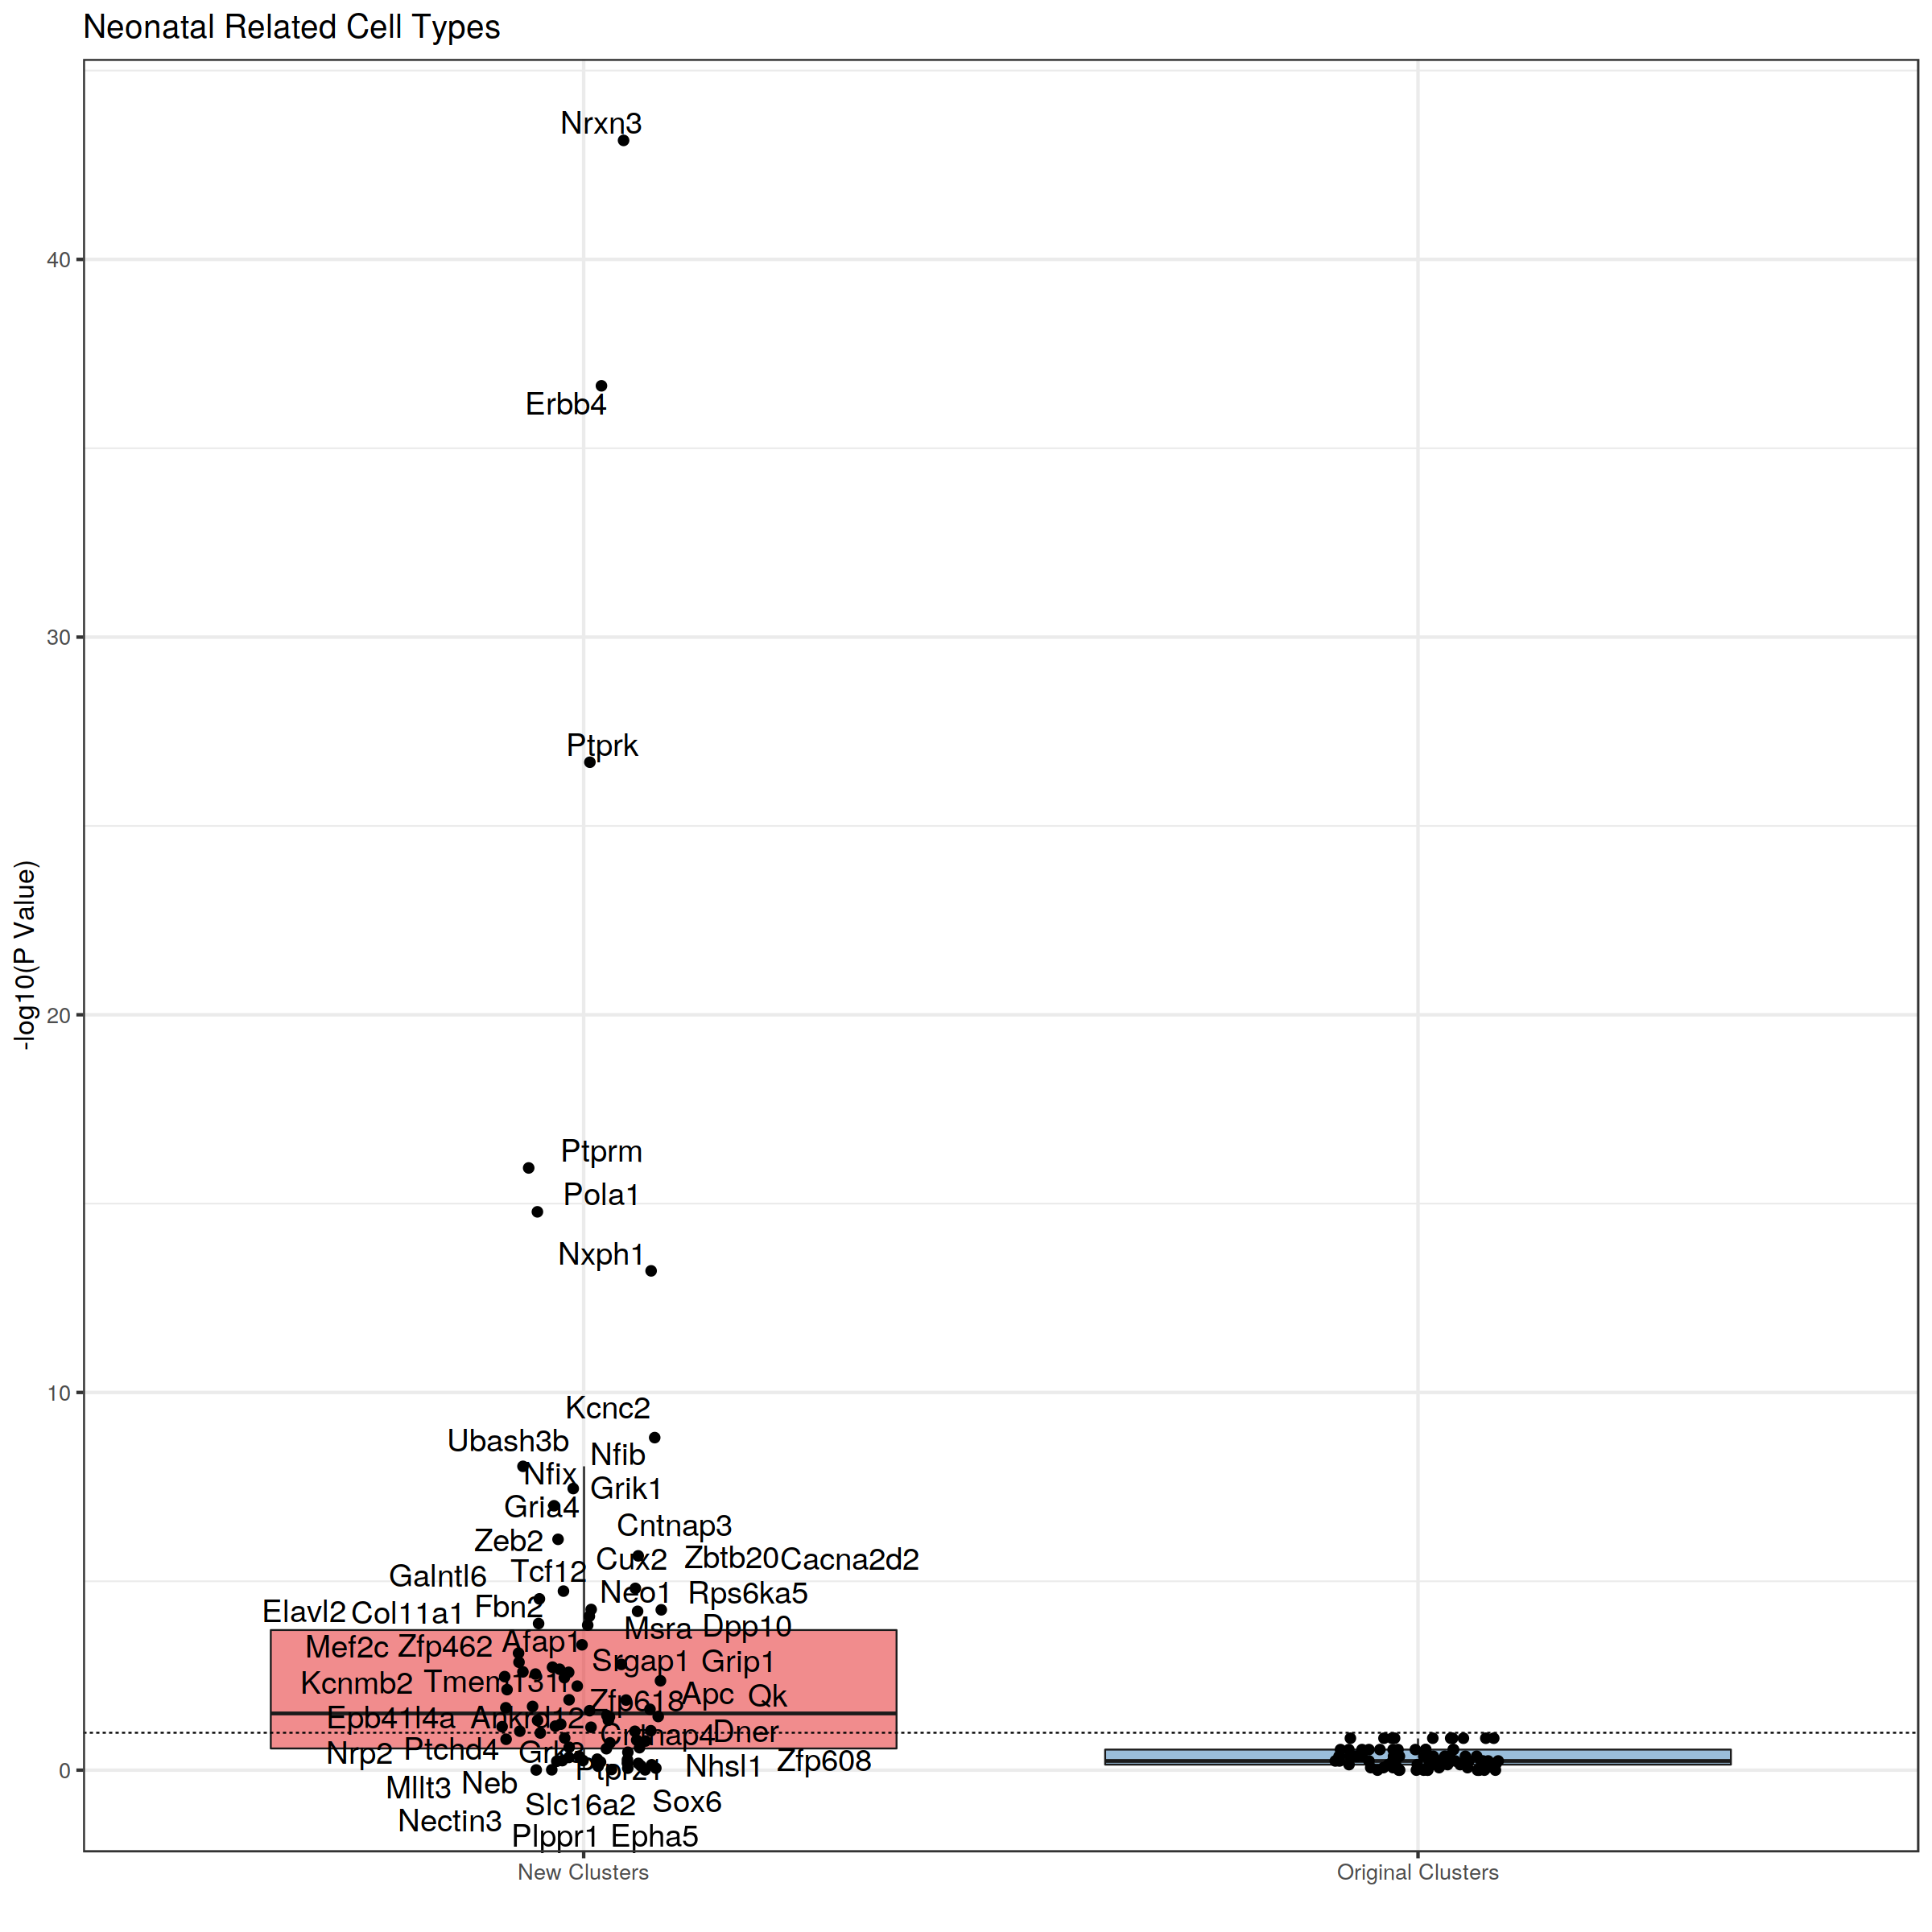

In [27]:
## All four neunatal categories
targetGeneList = c()
for(cT in c('Hippocampal Pyramidal Cell, Neo', 'PV-SST Interneuron, Neonatal', 'Hippocampal Pyramidal Cell, Neo', 'P1-7')){
    targetGeneList = c(targetGeneList, alls[[cT]])
}
targetGeneList = unique(targetGeneList)[unique(targetGeneList) %in% colnames(GADgeneAll)]
gadD = c()
for(targetGene in targetGeneList){ 
    gad = data.frame(names = rownames(all), gene = GADgeneAll[, colnames(all) == targetGene], type = "GAD", targetGene = targetGene) %>% cbind(umapD, .) %>% 
            select(X1, X2, cellType, score = gene, type, targetGene)
    gadD = rbind(gadD, gad)
}
neuronSub = gadD %>% filter(X1 >=-7.5, X1 <=2.5, X2 >= 0, X2 <= 5.2)
neuronSub$newCellType = "Neonatal Neuron 1"
neuronSub$newCellType[neuronSub$X1 >=-3.2] = "Neonatal Neuron 2"

ind = which(rownames(all) %in% rownames(neuronSub))

# alls$'Neuron'
# gene_lists[[cellTypeNameList[1]]]
# head(neuronSub)
# head(all)

pData = c()
neuronMap = GADgeneAll[ind, targetGeneList] %>% data.frame %>% mutate(cellType = neuronSub[1:length(ind), ] %$% newCellType) %>% arrange(cellType)
ind1 = which(neuronMap$cellType == "Neonatal Neuron 1")
ind2 = which(neuronMap$cellType != "Neonatal Neuron 1")


cell_types <- unique(neuronMap$cellType)
cell_data <- list()
for (cell_type in cell_types) {
    cell_data[[cell_type]] = neuronMap %>% filter(cellType == cell_type)
}

xvars <- colnames(neuronMap)
t_test_ans <- list()
for (xv in xvars) {
    if (xv == 'cellType') next
    x1 <- cell_data[[cell_types[1]]][,xv]
    x2 <- cell_data[[cell_types[2]]][,xv]
    t_test_ans[[xv]] <- wilcox.test(x1, x2, alternative = "two.sided")$p.value #t.test(x1, x2)$p.value
}

t_test_res <- bind_rows(t_test_ans) %>%
    pivot_longer(everything(), names_to = c("gene"), values_to = "pvalue") %>%
    arrange(pvalue) 

pData = t_test_res %>% mutate(type = "New Clusters")

neuronMap = GADgeneAll[ind, targetGeneList] %>% data.frame %>% mutate(cellType = neuronSub[1:length(ind), ] %$% cellType) %>% arrange(cellType)
ind1 = which(neuronMap$cellType == "Neonatal Neuron 1")
ind2 = which(neuronMap$cellType != "Neonatal Neuron 1")



cell_types <- unique(neuronMap$cellType)
cell_data <- list()
for (cell_type in cell_types) {
    cell_data[[cell_type]] = neuronMap %>% filter(cellType == cell_type)
}

xvars <- colnames(neuronMap)
t_test_ans <- list()
for (xv in xvars) {
    if (xv == 'cellType') next
    x1 <- cell_data[[cell_types[1]]][,xv]
    x2 <- cell_data[[cell_types[2]]][,xv]
    t_test_ans[[xv]] <- wilcox.test(x1, x2, alternative = "two.sided")$p.va #t.test(x1, x2)$p.value
}

t_test_res <- bind_rows(t_test_ans) %>%
    pivot_longer(everything(), names_to = c("gene"), values_to = "pvalue") %>%
    arrange(pvalue) 

pData = rbind(pData, t_test_res %>% mutate(type = "Original Clusters"))
sigGADgene = pData %>% filter(pvalue <= 0.1) %>% arrange(pvalue) %$% gene
## saveRDS(sigGADgene, file = paste0("/Tan2021/RDS/sigGADgene_all_Neonatal_Related.rds"))

pData %>% ggplot(aes(x = type, y = -log10(pvalue), fill = type, label = gene)) +
    geom_boxplot(outlier.shape = NA, alpha = 0.5, color = "grey10") +
    geom_jitter(width = 0.1, size = 3) +
    geom_hline(yintercept = -log10(0.1), linetype = "dashed") +
    geom_text_repel(data = subset(pData, pvalue <= 0.1), aes(x = type, y = -log10(pvalue), label = gene), max.overlaps = Inf, size = 8, min.segment.length = Inf) +
    theme_bw(base_size = 20) +
    xlab("") +
    ylab("-log10(P Value)") +
    ggpubr::rremove("legend") +
    scale_fill_brewer(palette = "Set1") +
ggtitle("Neonatal Related Cell Types")

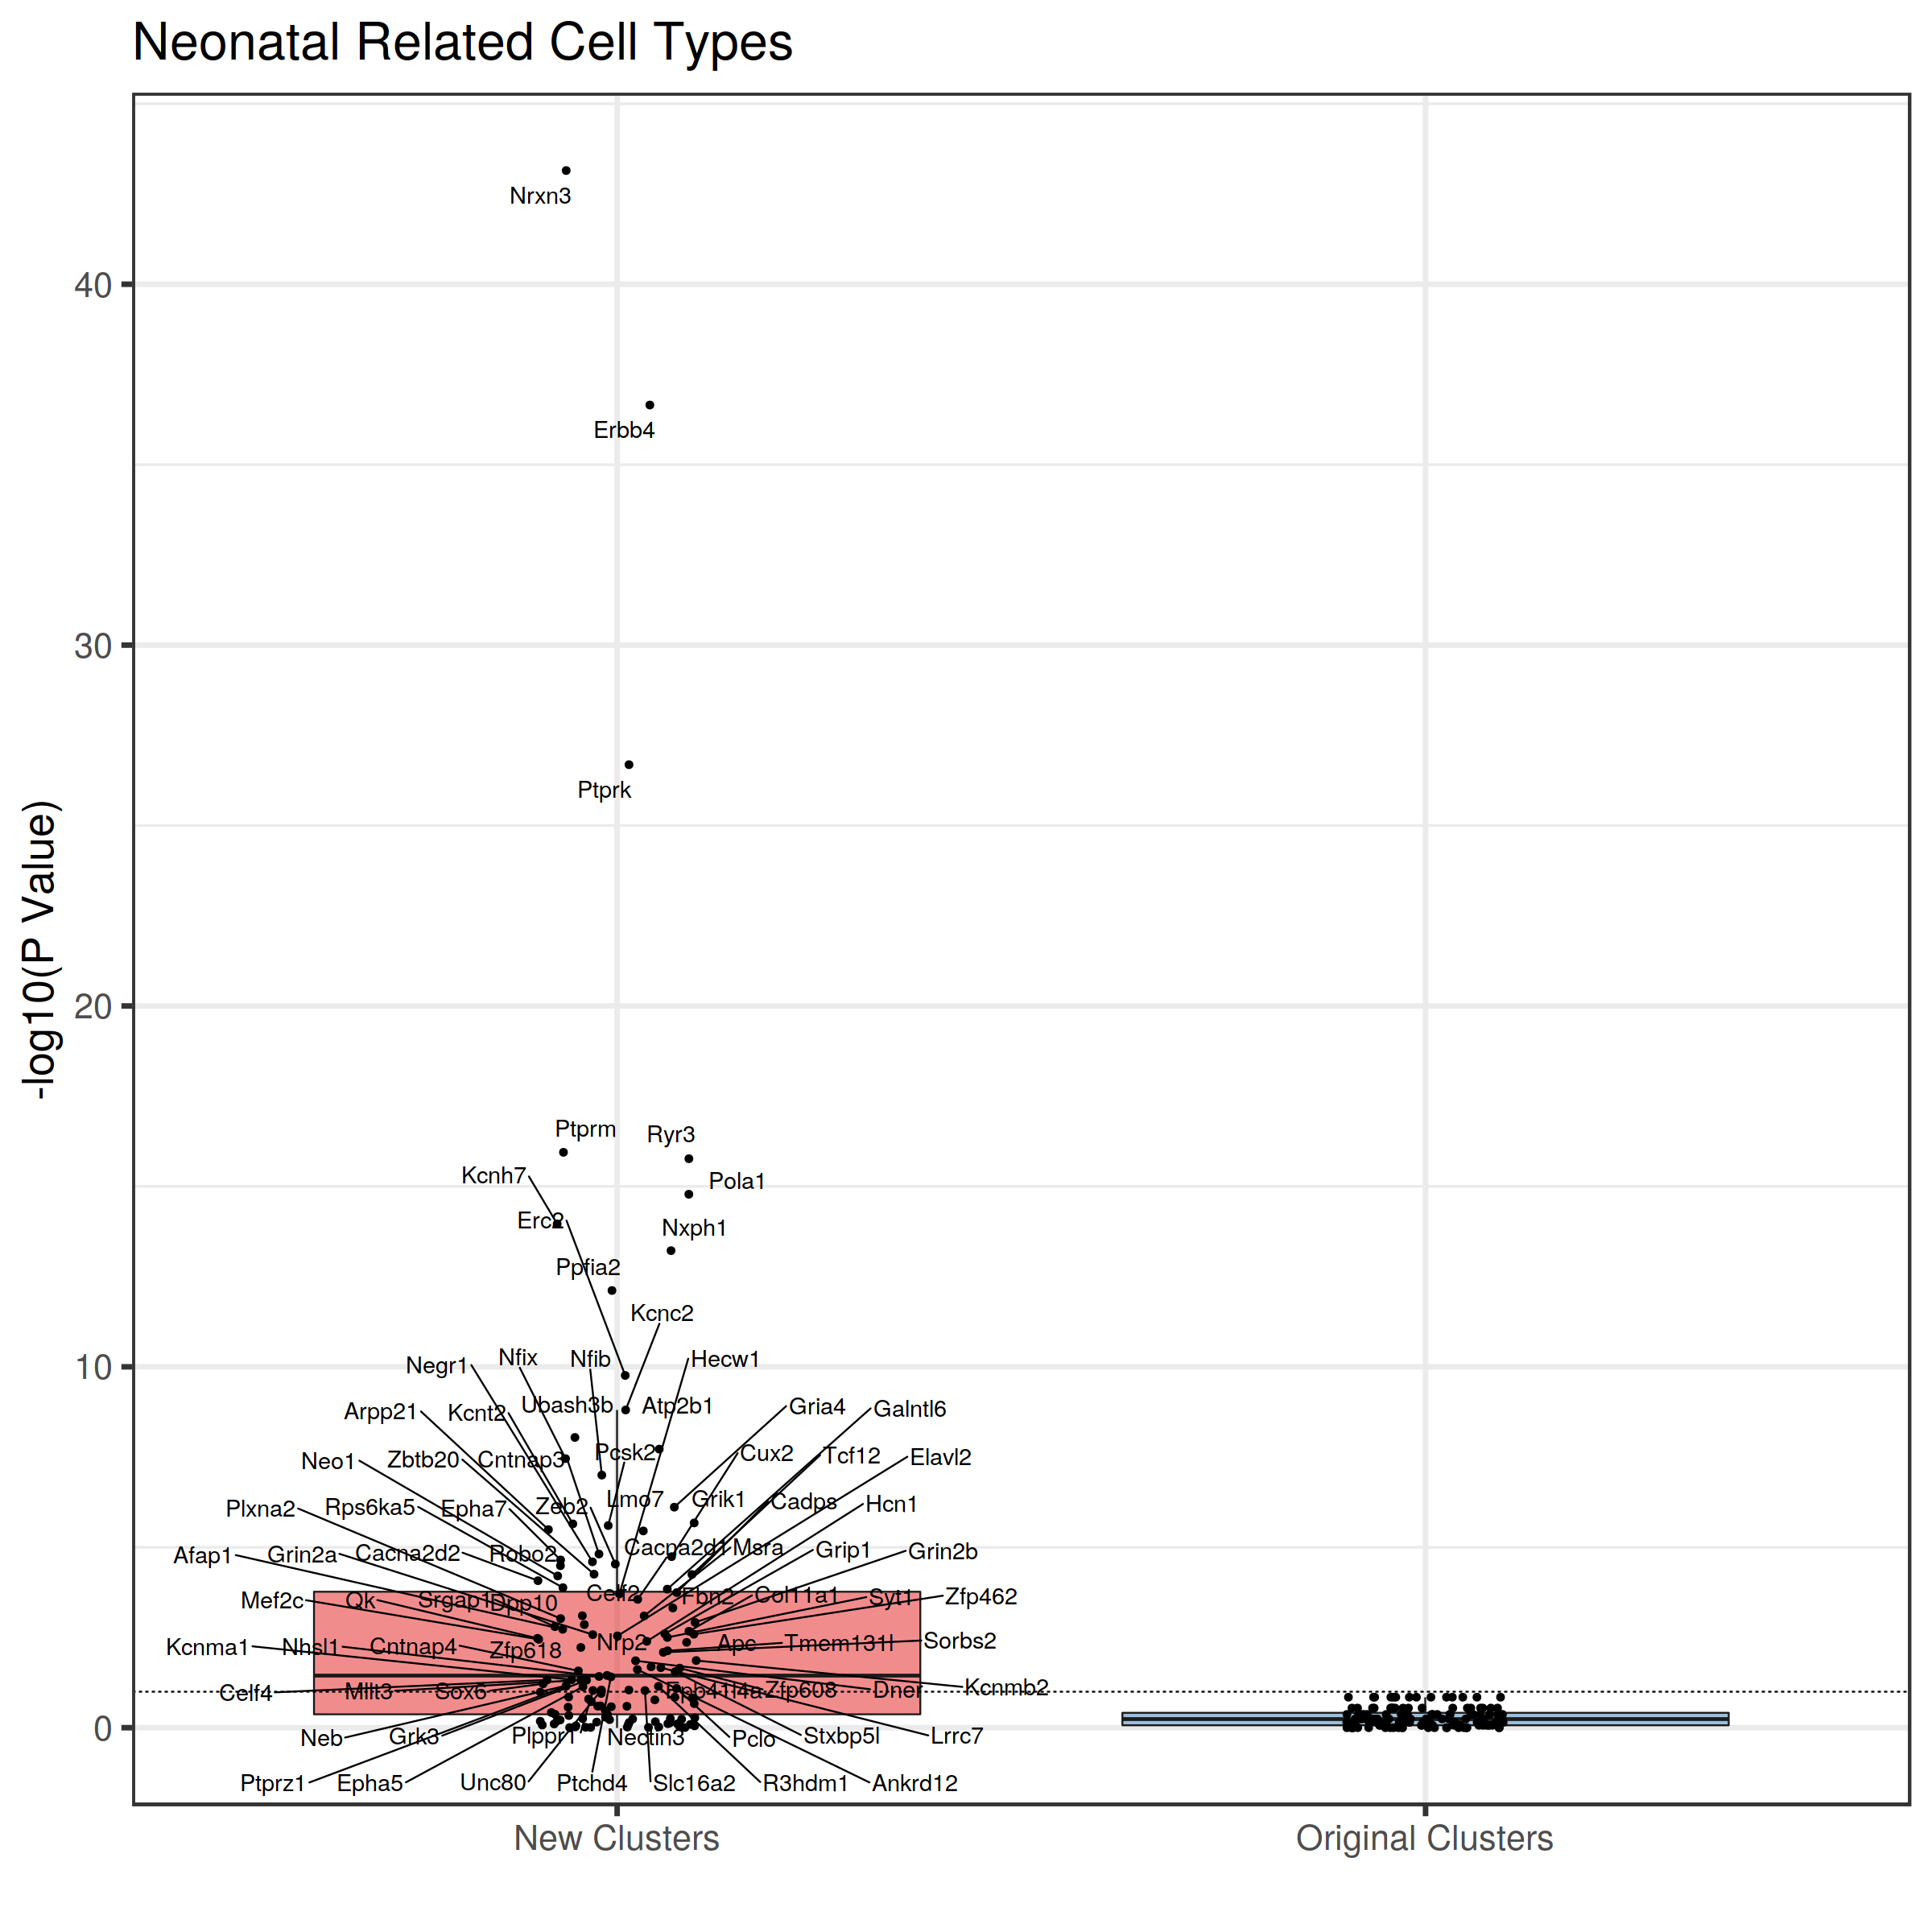

In [29]:
## All four neunatal categories
targetGeneList = c()
for(cT in c('Hippocampal Pyramidal Cell, Neo', 'PV-SST Interneuron, Neonatal', 'Hippocampal Pyramidal Cell, Neo', 'P1-7', 'Neuron')){
    targetGeneList = c(targetGeneList, alls[[cT]])
}
targetGeneList = unique(targetGeneList)[unique(targetGeneList) %in% colnames(GADgeneAll)]
gadD = c()
for(targetGene in targetGeneList){ 
    gad = data.frame(names = rownames(all), gene = GADgeneAll[, colnames(all) == targetGene], type = "GAD", targetGene = targetGene) %>% cbind(umapD, .) %>% 
            select(X1, X2, cellType, score = gene, type, targetGene)
    gadD = rbind(gadD, gad)
}
neuronSub = gadD %>% filter(X1 >=-7.5, X1 <=2.5, X2 >= 0, X2 <= 5.2)
neuronSub$newCellType = "Neonatal Neuron 1"
neuronSub$newCellType[neuronSub$X1 >=-3.2] = "Neonatal Neuron 2"

ind = which(rownames(all) %in% rownames(neuronSub))

# alls$'Neuron'
# gene_lists[[cellTypeNameList[1]]]
# head(neuronSub)
# head(all)

pData = c()
neuronMap = GADgeneAll[ind, targetGeneList] %>% data.frame %>% mutate(cellType = neuronSub[1:length(ind), ] %$% newCellType) %>% arrange(cellType)
ind1 = which(neuronMap$cellType == "Neonatal Neuron 1")
ind2 = which(neuronMap$cellType != "Neonatal Neuron 1")


cell_types <- unique(neuronMap$cellType)
cell_data <- list()
for (cell_type in cell_types) {
    cell_data[[cell_type]] = neuronMap %>% filter(cellType == cell_type)
}

xvars <- colnames(neuronMap)
t_test_ans <- list()
pDataDir = c()
for (xv in xvars) {
    if (xv == 'cellType') next
    x1 <- cell_data[[cell_types[1]]][,xv]
    x2 <- cell_data[[cell_types[2]]][,xv]
    t_test_ans[[xv]] <- wilcox.test(x1, x2, alternative = "two.sided")$p.value #t.test(x1, x2)$p.value
    if(wilcox.test(x1, x2, alternative = "greater")$p.value <= 0.1){
        dir = 1
    }else if(wilcox.test(x1, x2, alternative = "less")$p.value <= 0.1){
        dir = -1
    }else{
        dir = 0
    }
    pDataDir = data.frame(gene = xv, direction = dir, type = "New Clusters") %>% rbind(pDataDir, .)
}

t_test_res <- bind_rows(t_test_ans) %>%
    pivot_longer(everything(), names_to = c("gene"), values_to = "pvalue") %>%
    arrange(pvalue) 

pData = t_test_res %>% mutate(type = "New Clusters")

neuronMap = GADgeneAll[ind, targetGeneList] %>% data.frame %>% mutate(cellType = neuronSub[1:length(ind), ] %$% cellType) %>% arrange(cellType)
ind1 = which(neuronMap$cellType == "Neonatal Neuron 1")
ind2 = which(neuronMap$cellType != "Neonatal Neuron 1")



cell_types <- unique(neuronMap$cellType)
cell_data <- list()
for (cell_type in cell_types) {
    cell_data[[cell_type]] = neuronMap %>% filter(cellType == cell_type)
}

xvars <- colnames(neuronMap)
t_test_ans <- list()
for (xv in xvars) {
    if (xv == 'cellType') next
    x1 <- cell_data[[cell_types[1]]][,xv]
    x2 <- cell_data[[cell_types[2]]][,xv]
    t_test_ans[[xv]] <- wilcox.test(x1, x2, alternative = "two.sided")$p.value #t.test(x1, x2)$p.value
    if(wilcox.test(x1, x2, alternative = "greater")$p.value <= 0.1){
        dir = 1
    }else if(wilcox.test(x1, x2, alternative = "less")$p.value <= 0.1){
        dir = -1
    }else{
        dir = 0
    }
    pDataDir = data.frame(gene = xv, direction = dir, type = "Original Cluster") %>% rbind(pDataDir, .)
}

t_test_res <- bind_rows(t_test_ans) %>%
    pivot_longer(everything(), names_to = c("gene"), values_to = "pvalue") %>%
    arrange(pvalue) 

pData = rbind(pData, t_test_res %>% mutate(type = "Original Clusters"))
sigGADgene = pData %>% filter(pvalue <= 0.05, type == "New Clusters") %>% arrange(pvalue) %$% gene
## saveRDS(sigGADgene, file = paste0("/Tan2021/RDS/sigGADgene_all_Neonatal_Related.rds"))

pos = position_jitter(width = 0.1, seed = 2)
newClusterMerge = pData %>% ggplot(aes(x = type, y = -log10(pvalue), fill = type, label = gene)) +
    geom_boxplot(outlier.shape = NA, alpha = 0.5, color = "grey10") +
    geom_jitter( size = 2, position = pos) +
    geom_hline(yintercept = -log10(0.1), linetype = "dashed") +
    geom_text_repel(data = subset(pData, pvalue <= 0.1), aes(x = type, y = -log10(pvalue), label = gene), position = pos, max.overlaps = Inf, size = 6, min.segment.length = 2, box.padding = 0.75) +
    theme_bw(base_size = 32) +
    xlab("") +
    ylab("-log10(P Value)") +
    ggpubr::rremove("legend") +
    scale_fill_brewer(palette = "Set1") +
ggtitle("Neonatal Related Cell Types")

saveRDS(newClusterMerge, file = "/Tan2021/RDS/newClusterMerge.rds")

newClusterMerge

In [ ]:
# pDataDir %>% filter(gene %in% sigGADgene, type == "New Clusters") 
#  pData %>% filter(pvalue <= 0.05, type == "New Clusters")
sigGADgene = pData %>% filter(pvalue <= 0.01, type == "New Clusters") %>% arrange(pvalue) %$% gene

length(sigGADgene)

# pDataDir %>% filter(gene %in% sigGADgene, type == "New Clusters") %>% arrange(gene)
pDataDir %>% filter(type == "New Clusters", direction!=0)

In [ ]:
sigGADgene = pData %>% filter(pvalue <= 0.1) %>% arrange(pvalue) %$% gene

sigGADgene %>% length

In [ ]:

targetGene = sigGADgene[1:8] #c("Frmd4a", "Srgap1", "Tmem131l", "Nfib", "Ankrd12", "Ptprz1") #gene_lists[[cellTypeNameList[1]]] #t_test_res$gene #
neuronMap = all[ind, targetGene] %>% data.frame %>% mutate(cellType = neuronSub[1:length(ind), ] %$% newCellType) %>% arrange(cellType)
neuronCT = data.frame(cellType = neuronMap$cellType) #data.frame(cellType = neuronSub %>% filter(targetGene == gene_lists[[cellTypeNameList[1]]][1]) %$% newCellType)
rownames(neuronCT) = rownames(neuronMap)

quantile_breaks <- function(xs, n = 10) {
  breaks <- quantile(xs[xs != 0], probs = seq(0, 1, length.out = (n - 1)))
  c(0, breaks[!duplicated(breaks)])
}

mat_breaks <- quantile_breaks(neuronMap %>% select(-cellType), n = 100)

# pheatmap(neuronMap %>% filter(cellType == "Neonatal Neuron 1") %>% select(-cellType), 
#          breaks = mat_breaks, cluster_cols = F, cluster_rows = T, annotation_row = neuronCT %>% filter(cellType == "Neonatal Neuron 1"), show_rownames = F)
# pheatmap(neuronMap %>% filter(cellType == "Neonatal Neuron 2") %>% select(-cellType), 
#          breaks = mat_breaks, cluster_cols = F, cluster_rows = T, annotation_row = neuronCT %>% filter(cellType == "Neonatal Neuron 2"), show_rownames = F)

pheatmap(neuronMap %>% select(-cellType), 
         breaks = mat_breaks, cluster_cols = T, cluster_rows = F, annotation_row = neuronCT, show_rownames = F)

rbind(neuronMap[ind1, ] %>% select(-cellType) %>% colMeans, neuronMap[ind2, ] %>% select(-cellType) %>% colMeans) %>% 
    data.frame %>% select(all_of(targetGene)) %>%
    pheatmap(., 
         cluster_cols = T, cluster_rows = F, show_rownames = F)




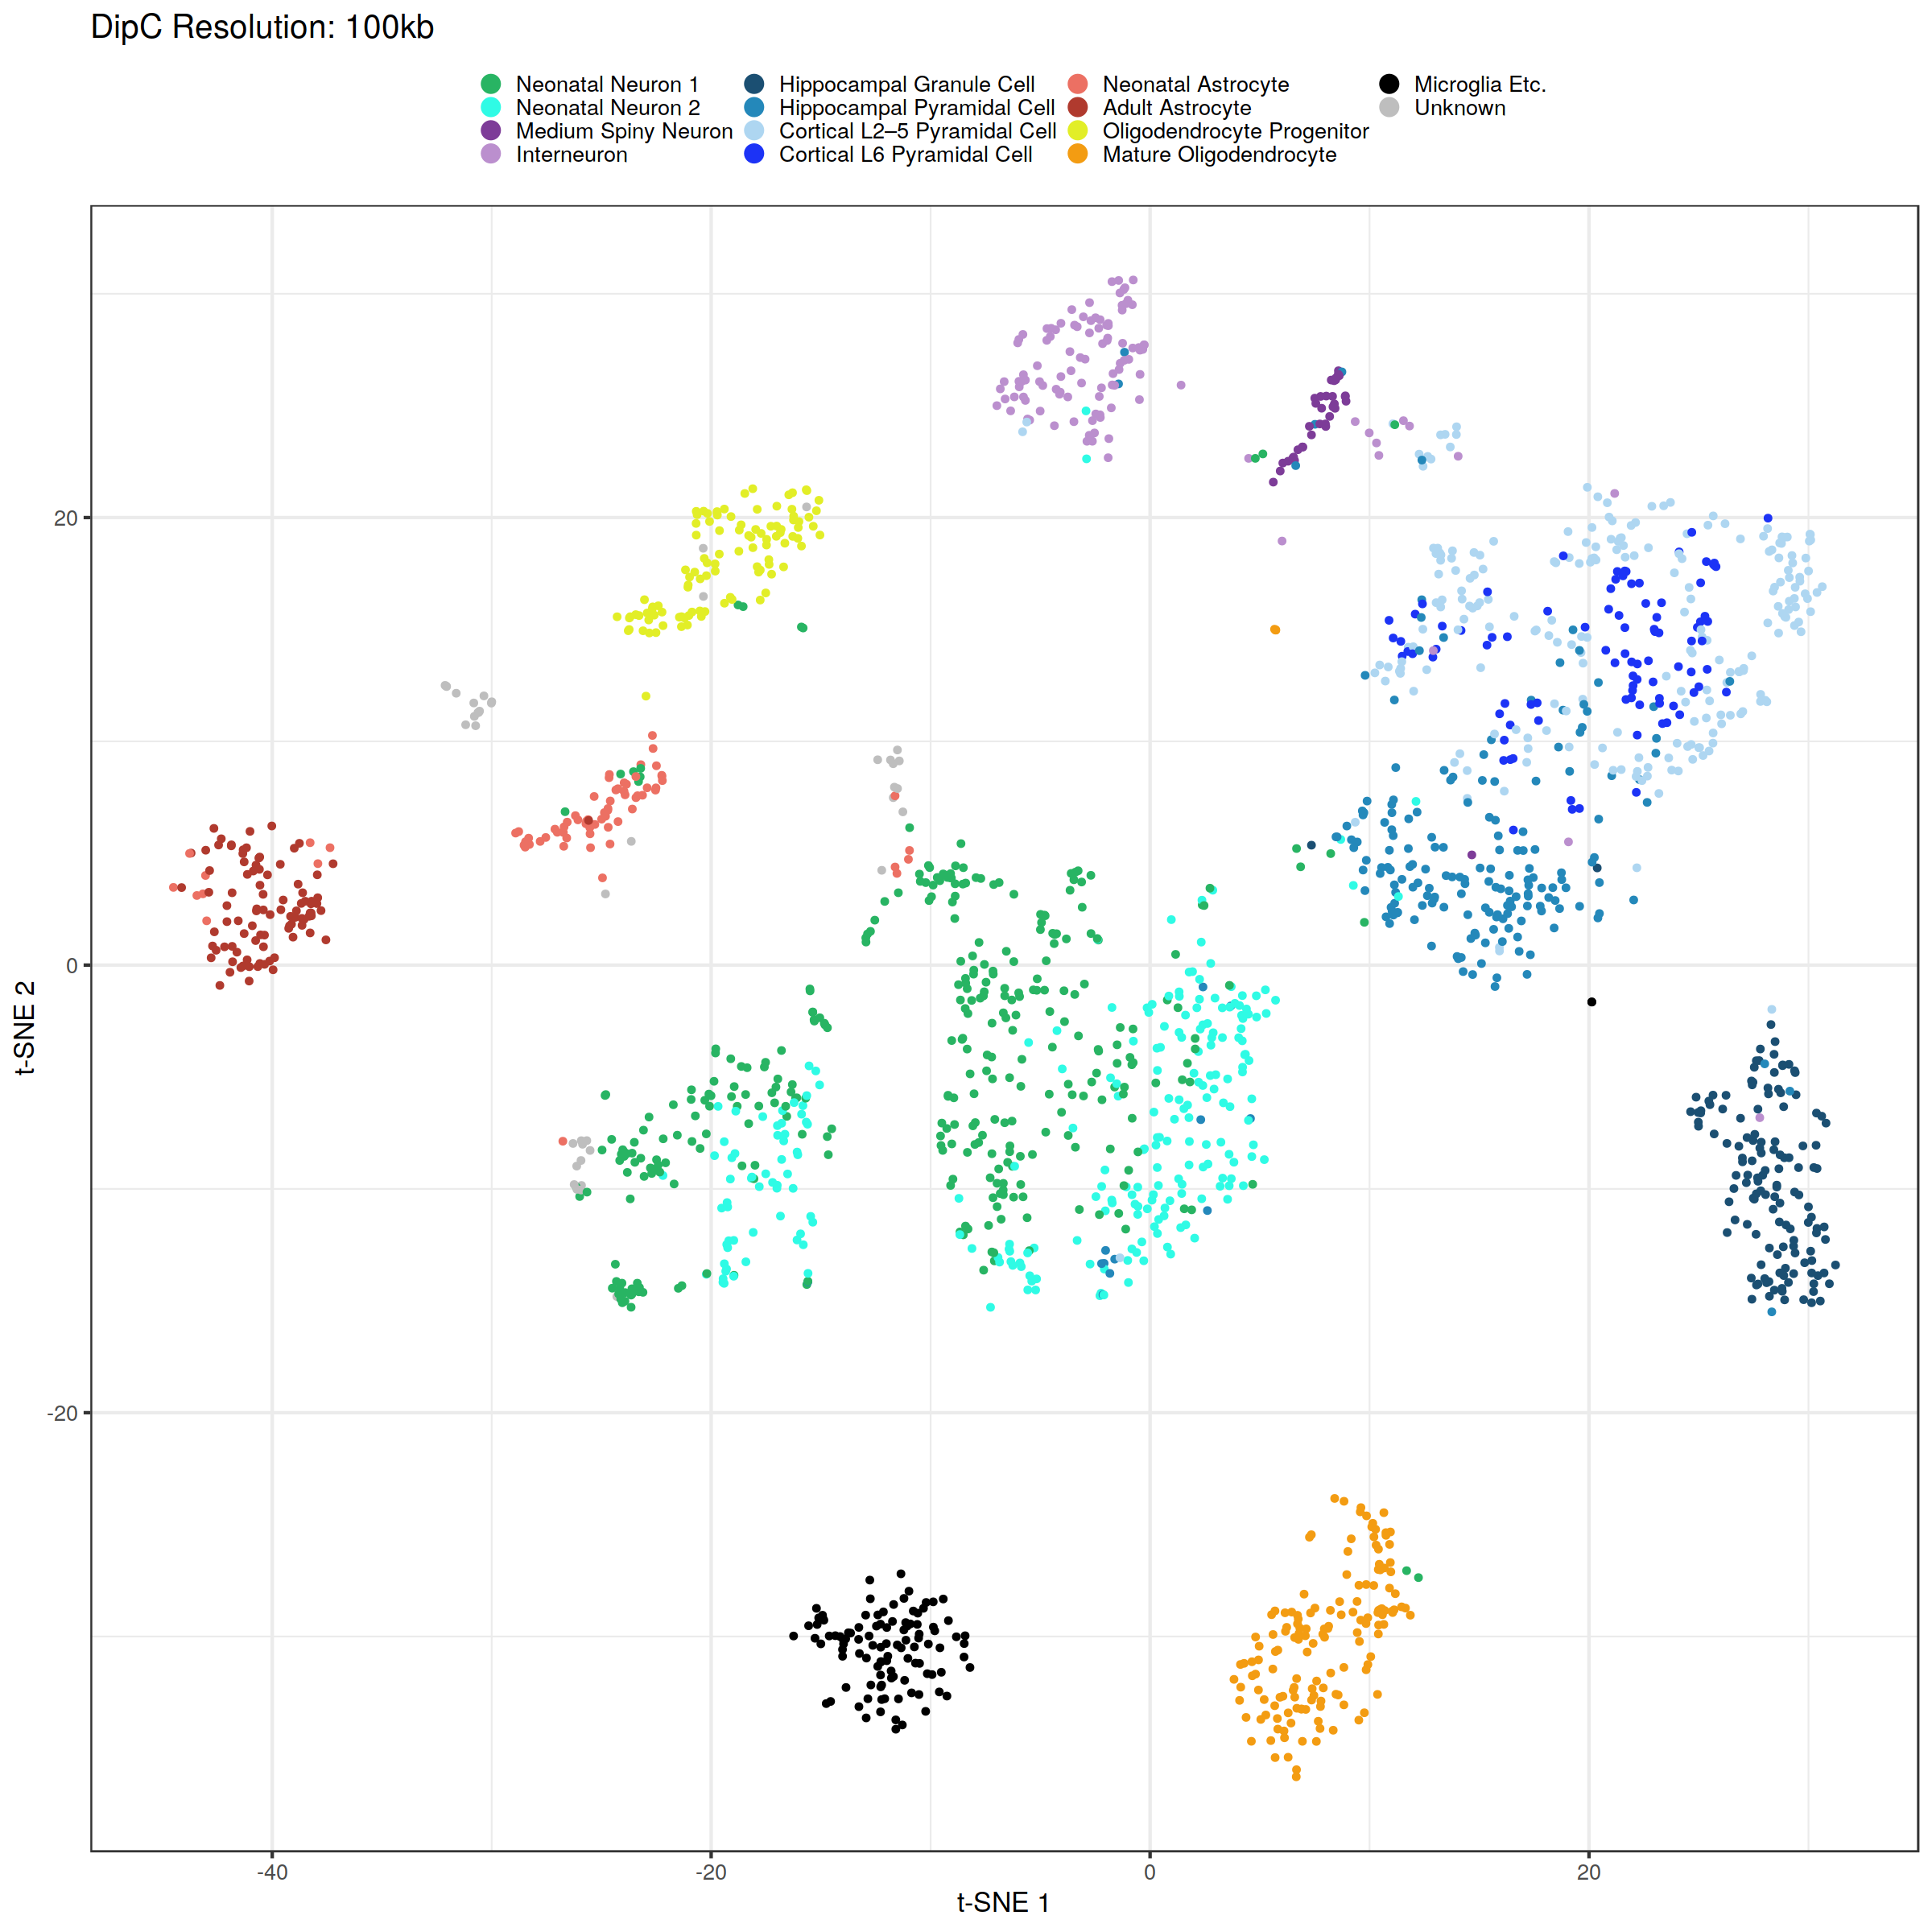

In [33]:
tsneD = cbind(resTSNE, cell_info[, "cell-type cluster"])
colnames(tsneD) = c("X1", "X2", "celltype")

dipCtsne = tsneD %>% ggplot(aes(x = X1, y = X2, color = celltype)) +
geom_point(size = 2) +
theme_bw(base_size = 20) +
xlab("t-SNE 1") +
ylab("t-SNE 2") +
ggtitle("DipC Resolution: 100kb") +
scale_color_manual(breaks = c("Neonatal Neuron 1", "Neonatal Neuron 2", 
                              "Medium Spiny Neuron", "Interneuron",
                              "Hippocampal Granule Cell", "Hippocampal Pyramidal Cell", 
                             "Cortical L2–5 Pyramidal Cell", "Cortical L6 Pyramidal Cell", 
                              "Neonatal Astrocyte", "Adult Astrocyte",
                              "Oligodendrocyte Progenitor", "Mature Oligodendrocyte", 
                              "Microglia Etc.", "Unknown"), 
                   values = c("#28B463", "#2FFBE5", 
                              "#7D3C98", "#BB8FCE",
                              "#1B4F72", "#2488BA",
                              "#AED6F1", "#1C33F6", 
                              "#EC7063", "#B03A2E", 
                              "#E2EE27", "#F39C12", 
                              "#000000", "grey")) +
theme(legend.position = "top") +
ggpubr::rremove("legend.title") +
guides(colour = guide_legend(nrow = 4, override.aes = list(size = 6)))

saveRDS(dipCtsne, file = "/Tan2021/RDS/dipCtsne.rds")
dipCtsne

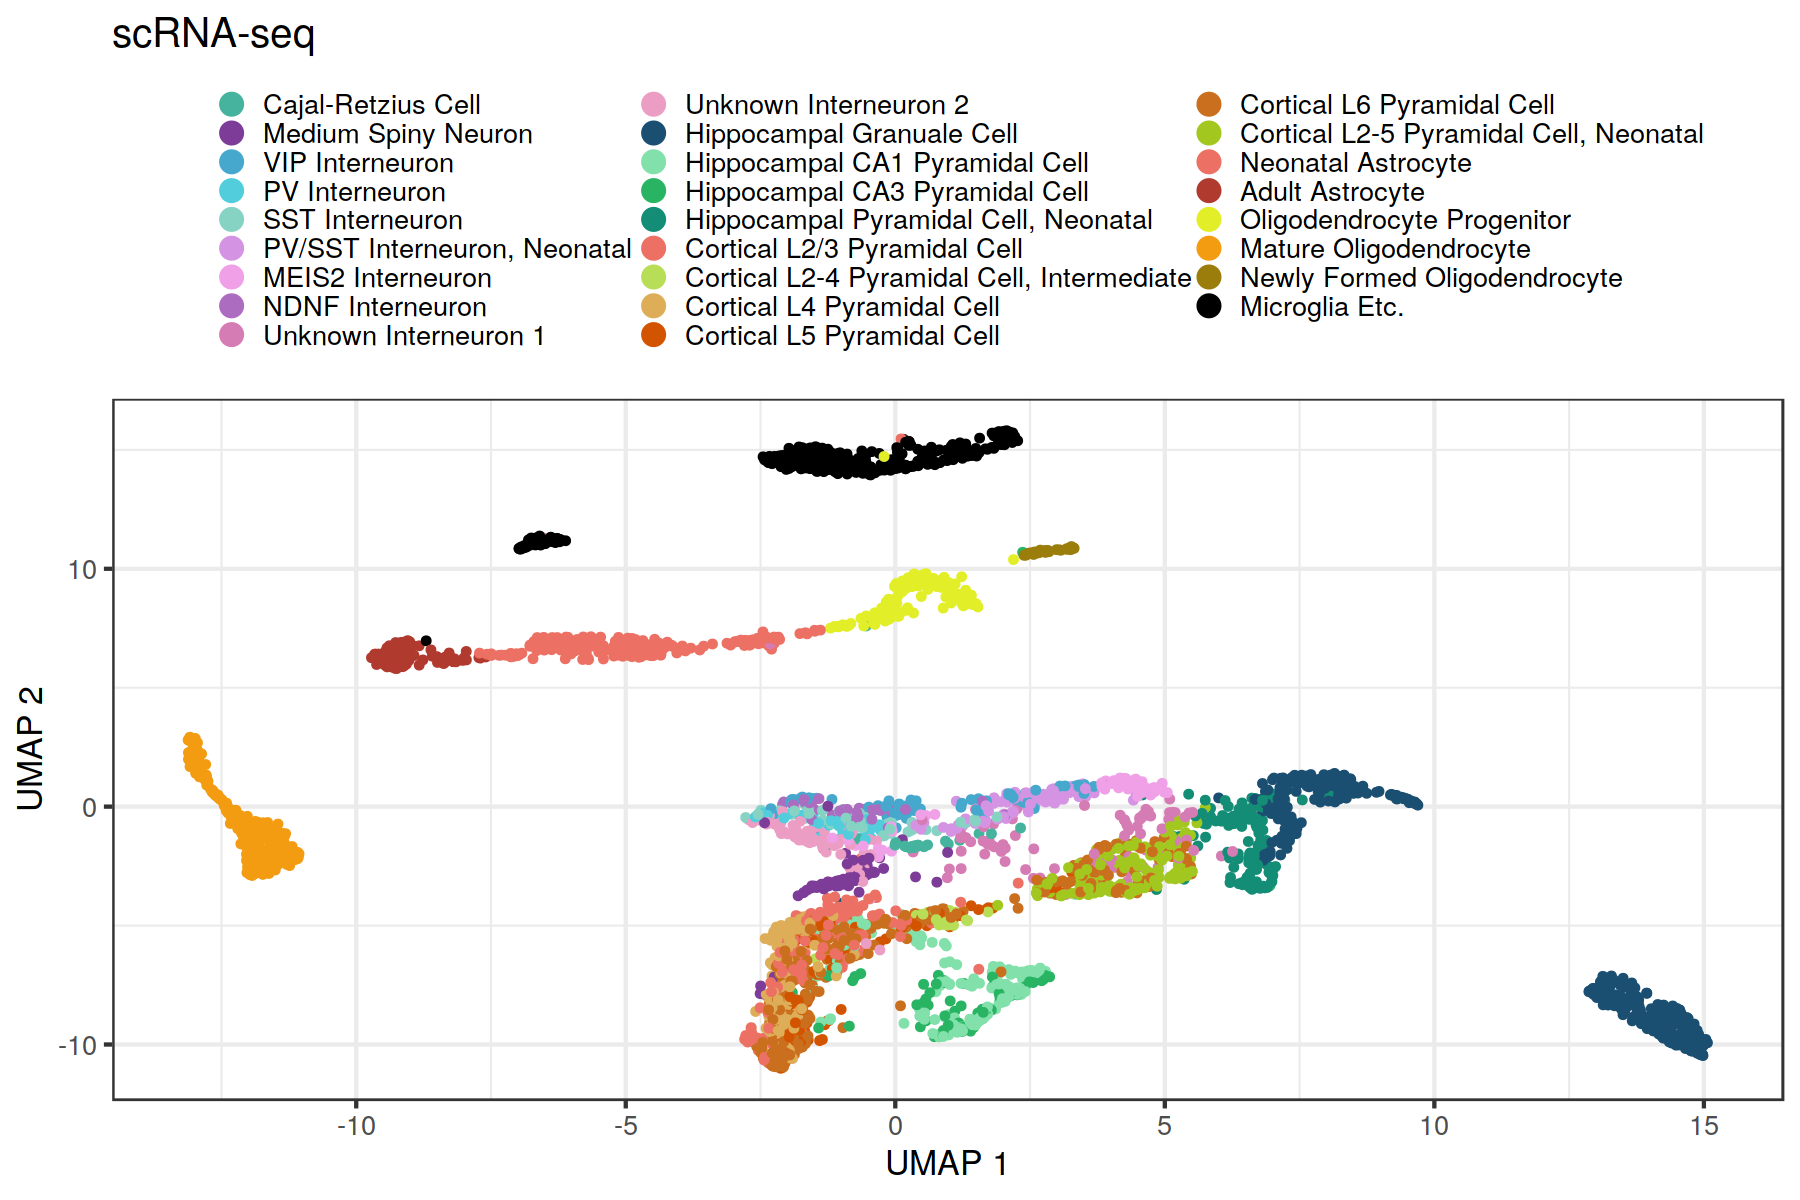

In [35]:
options(repr.plot.width=15, repr.plot.height=10)

rnaUMAPrds = rnaUMAPD %>% ggplot(aes(x = X1, y = X2, color = cellType)) +
geom_point(size = 2) +
theme_bw(base_size = 20) +
xlab("UMAP 1") +
ylab("UMAP 2") +
ggtitle("scRNA-seq") +
scale_color_manual(breaks =  c("Neonatal Neuron 1", "Neonatal Neuron 2", "Cajal-Retzius Cell",
                              "Medium Spiny Neuron", "VIP Interneuron", "PV Interneuron", "SST Interneuron", "PV/SST Interneuron, Neonatal", "MEIS2 Interneuron", "NDNF Interneuron", "Unknown Interneuron 1", "Unknown Interneuron 2",
                              "Hippocampal Granuale Cell", "Hippocapmal Pyramidal Cell", "Hippocampal CA1 Pyramidal Cell", "Hippocampal CA3 Pyramidal Cell", "Hippocampal Pyramidal Cell, Neonatal",
                             "Cortical L2/3 Pyramidal Cell", "Cortical L2-4 Pyramidal Cell, Intermediate", "Cortical L4 Pyramidal Cell", "Cortical L5 Pyramidal Cell", "Cortical L6 Pyramidal Cell", "Cortical L2-5 Pyramidal Cell, Neonatal",
                              "Neonatal Astrocyte", "Adult Astrocyte",
                              "Oligodendrocyte Progenitor", "Mature Oligodendrocyte", "Newly Formed Oligodendrocyte",
                              "Microglia Etc.",  "Unknown"), 
                   values = c("#28B463", "#2FFBE5", "#45B39D",
                              "#7D3C98", "#46A8CD", "#51CDDC", "#87D3C3", "#D494E3", "#F0A0E7", "#AC6CC0", "#D67CB4", "#EC9DC3",
                              "#1B4F72", "#2488BA", "#82E0AA", "#28B463", "#138D75",
                              "#EC7063", "#B8DE58", "#DEAD58", "#D35400", "#CA6F1E", "#A2C820",
                              "#EC7063", "#B03A2E", 
                              "#E2EE27", "#F39C12", "#9A7D0A",
                              "#000000",  "grey")) +
theme(legend.position = "top") +
ggpubr::rremove("legend.title") +
guides(colour = guide_legend(nrow = 9, override.aes = list(size = 6)))

saveRDS(rnaUMAPrds, file = "/Tan2021/RDS/rnaUMAPrds.rds")
rnaUMAPrds

Centering and scaling data matrix

Centering and scaling data matrix



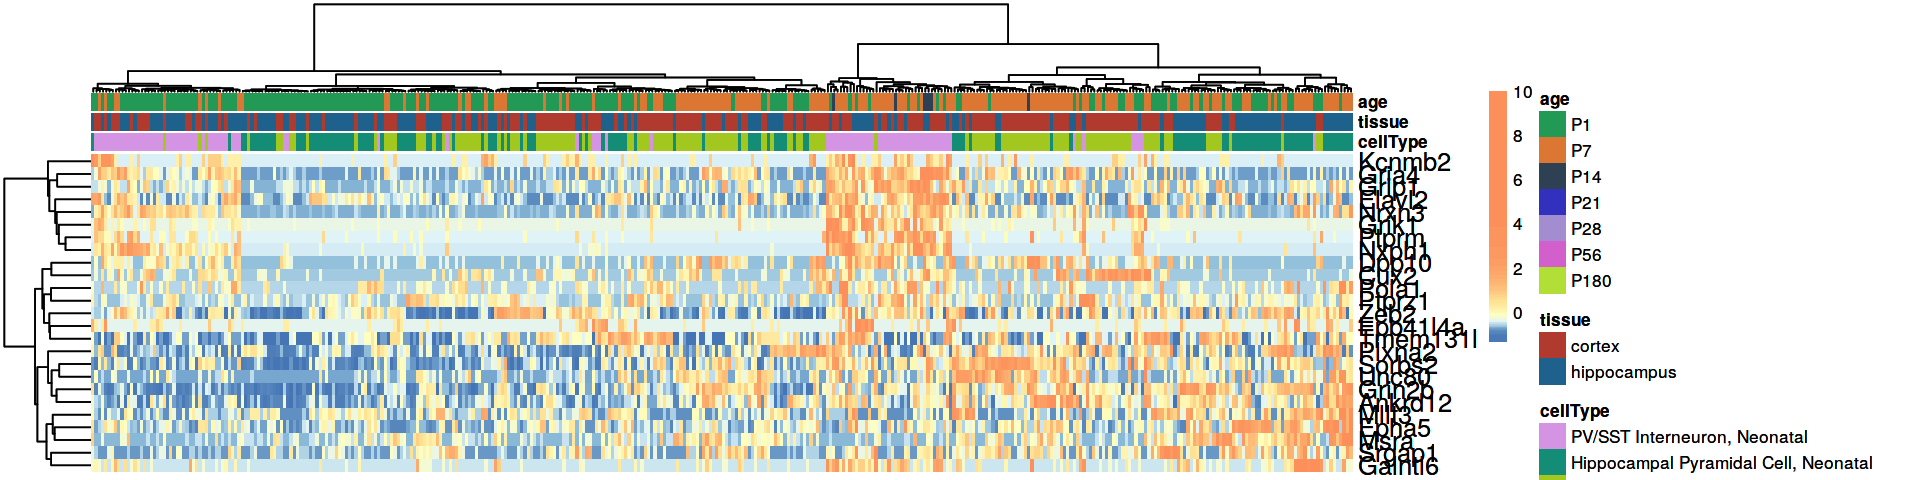

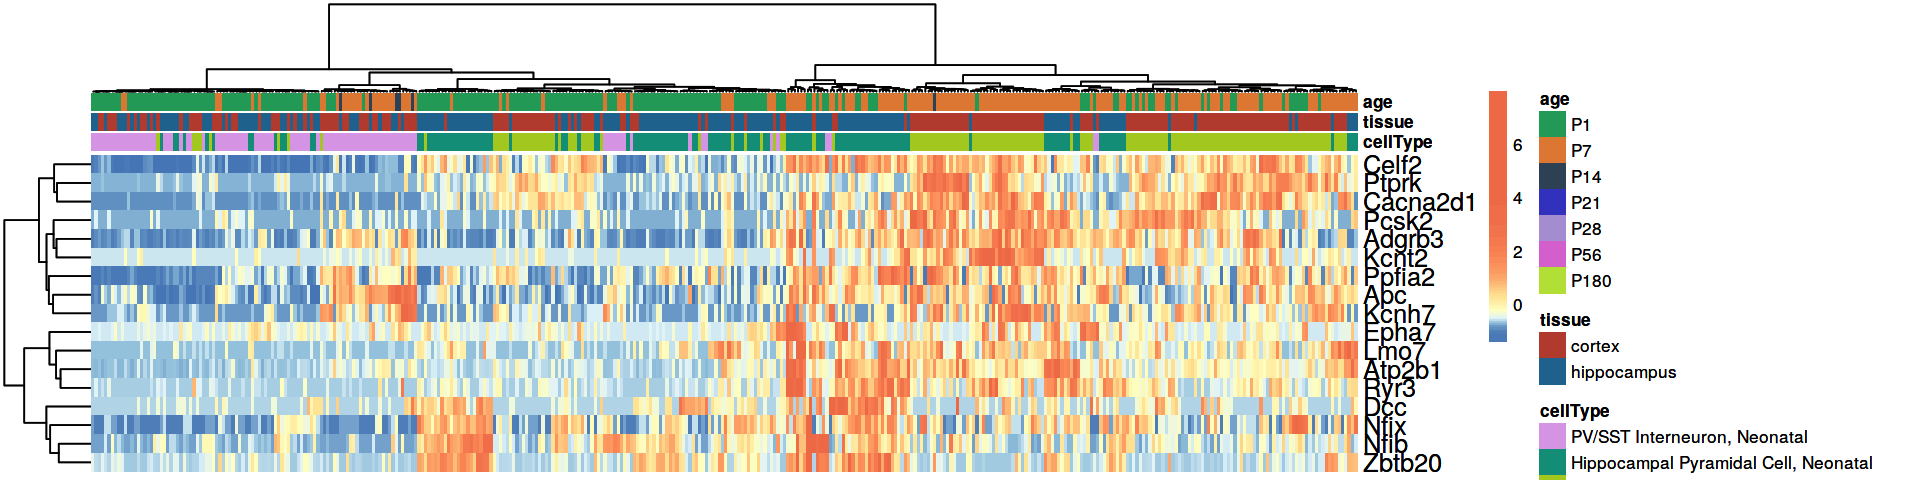

In [39]:
## RNA_SeuratObj

quantile_breaks <- function(xs, n = 10) {
  breaks <- quantile(xs[xs != 0], probs = seq(0, 1, length.out = (n - 1)))
  c(0, breaks[!duplicated(breaks)])
}


cellInd = RNA_SeuratObj@active.ident %in% c("PV/SST Interneuron, Neonatal", "Hippocampal Pyramidal Cell, Neonatal", "Cortical L2-5 Pyramidal Cell, Neonatal")
neuronCellTypeLabel = data.frame(cellType = factor(RNA_SeuratObj@active.ident[cellInd], levels = c("PV/SST Interneuron, Neonatal", "Hippocampal Pyramidal Cell, Neonatal", "Cortical L2-5 Pyramidal Cell, Neonatal")),
                                tissue = factor(RNA_SeuratObj@meta.data$tissue[cellInd], levels = c("cortex", "hippocampus")),
                                age = factor(RNA_SeuratObj@meta.data$age[cellInd], levels = paste0("P", c(1, 7, 14, 21, 28, 56, 180))))
neuronCellTypeColor = c("#D494E3", "#138D75", "#A2C820")
names(neuronCellTypeColor) = c("PV/SST Interneuron, Neonatal", "Hippocampal Pyramidal Cell, Neonatal", "Cortical L2-5 Pyramidal Cell, Neonatal")

## tissue
#neuronTissueLabel = data.frame(cellType = factor(RNA_SeuratObj@meta.data$tissue[cellInd], levels = c("cortex", "hippocampus")))
neuronTissueColor = c("#B03A2E", "#1F618D")
names(neuronTissueColor) = c("cortex", "hippocampus")

## age
#neuronAgeLabel = data.frame(cellType = factor(RNA_SeuratObj@meta.data$age[cellInd], levels = paste0("P", c(1, 7, 14, 21, 28, 56, 180))))
neuronAgeColor = c("#229954", "#DC7633","#2E4053", "#3131BE", "#A48CD1", "#D35FCC", "#B1DF35")
names(neuronAgeColor) = paste0("P", c(1, 7, 14, 21, 28, 56, 180))


sigGADgene = readRDS(file = paste0("/Tan2021/RDS/sigGADgene_all_Neonatal_Related.rds"))
# sigGADgene = pDataDir %>% filter(type == "New Clusters", direction!=0) %$% gene
geneGADdirLabel = data.frame(direction = pDataDir %>% filter(gene %in% sigGADgene, type == "New Clusters") %$% direction %>% factor(., levels = c(1, -1)))
rownames(geneGADdirLabel) = pDataDir %>% filter(gene %in% sigGADgene, type == "New Clusters") %$% gene
geneGADdirColor = c("#A93226", "#1F618D") #factor(pDataDir %>% filter(gene %in% sigGADgene, type == "New Clusters") %$% direction, levels = c(1, -1), labels = c("#922B21", "#2874A6"))
names(geneGADdirColor) = c(1, -1)

cellInd = RNA_SeuratObj@active.ident %in% c("PV/SST Interneuron, Neonatal", "Hippocampal Pyramidal Cell, Neonatal", "Cortical L2-5 Pyramidal Cell, Neonatal")
geneInd = rownames(RNA_SeuratObj@assays$RNA@counts) %in% (pDataDir %>% filter(type == "New Clusters", direction==1) %$% gene)
subRNA = RNA_SeuratObj@assays$RNA@counts[geneInd, cellInd]
geneInd = rownames(RNA_SeuratObj@assays$RNA@counts) %in% (pDataDir %>% filter(type == "New Clusters", direction==-1) %$% gene)
subRNA = RNA_SeuratObj@assays$RNA@counts[geneInd, cellInd] %>% rbind(subRNA, .)

subRNA = subRNA[rownames(subRNA) %in% sigGADgene, ]

# mat_breaks <- quantile_breaks(subRNA %>% as.matrix  %>% ScaleData, n = 100)
# pheatmap(subRNA,  breaks = mat_breaks, annotation_col = neuronCellTypeLabel, annotation_row = geneGADdirLabel, 
#          annotation_colors = list(cellType = neuronCellTypeColor, direction = geneGADdirColor), cluster_cols = T, cluster_rows = F,  clustering_method = "ward.D", show_colnames = F, scale = "row")

# mat_breaks <- quantile_breaks(subRNA %>% as.matrix  %>% ScaleData, n = 100)
# pheatmap(subRNA,  breaks = mat_breaks, annotation_col = neuronCellTypeLabel, annotation_row = geneGADdirLabel, 
#          annotation_colors = list(cellType = neuronCellTypeColor, direction = geneGADdirColor), cluster_cols = T, cluster_rows = T, clustering_method = "ward.D", show_colnames = F, scale = "row")

##
cellInd = RNA_SeuratObj@active.ident %in% c("PV/SST Interneuron, Neonatal", "Hippocampal Pyramidal Cell, Neonatal", "Cortical L2-5 Pyramidal Cell, Neonatal")
geneInd = rownames(RNA_SeuratObj@assays$RNA@counts) %in% (pDataDir %>% filter(type == "New Clusters", direction==1) %$% gene)
subRNA = RNA_SeuratObj@assays$RNA@counts[geneInd, cellInd]

subRNA = subRNA[rownames(subRNA) %in% sigGADgene, ]
leftGene = rownames(subRNA)
saveRDS(leftGene, file = "/Tan2021/RDS/leftGene.rds")

mat_breaks <- quantile_breaks(subRNA %>% as.matrix  %>% ScaleData, n = 100)
neonatalIhp = pheatmap(subRNA,  breaks = mat_breaks, annotation_col = neuronCellTypeLabel, #annotation_row = geneGADdirLabel, 
         annotation_colors = list(cellType = neuronCellTypeColor, tissue = neuronTissueColor, age = neuronAgeColor, direction = geneGADdirColor), cluster_cols = T, cluster_rows = T, clustering_method = "ward.D", 
                       show_colnames = F, scale = "row", fontsize_row = 15)

neonatalIhp
##
cellInd = RNA_SeuratObj@active.ident %in% c("PV/SST Interneuron, Neonatal", "Hippocampal Pyramidal Cell, Neonatal", "Cortical L2-5 Pyramidal Cell, Neonatal")
geneInd = rownames(RNA_SeuratObj@assays$RNA@counts) %in% (pDataDir %>% filter(type == "New Clusters", direction==-1) %$% gene)
subRNA = RNA_SeuratObj@assays$RNA@counts[geneInd, cellInd]

subRNA = subRNA[rownames(subRNA) %in% sigGADgene, ]

rightGene = rownames(subRNA)
saveRDS(rightGene, file = "/Tan2021/RDS/rightGene.rds")

mat_breaks <- quantile_breaks(subRNA %>% as.matrix  %>% ScaleData, n = 100)
neonatalIIhp = pheatmap(subRNA,  breaks = mat_breaks, annotation_col = neuronCellTypeLabel, #annotation_row = geneGADdirLabel, 
         annotation_colors = list(cellType = neuronCellTypeColor, tissue = neuronTissueColor, age = neuronAgeColor,  direction = geneGADdirColor), cluster_cols = T, cluster_rows = T, clustering_method = "ward.D", 
                        show_colnames = F, scale = "row", fontsize_row = 15)

neonatalIIhp

saveRDS(neonatalIhp, file = "/Tan2021/RDS/neonatalIhp.rds")

saveRDS(neonatalIIhp, file = "/Tan2021/RDS/neonatalIIhp.rds")


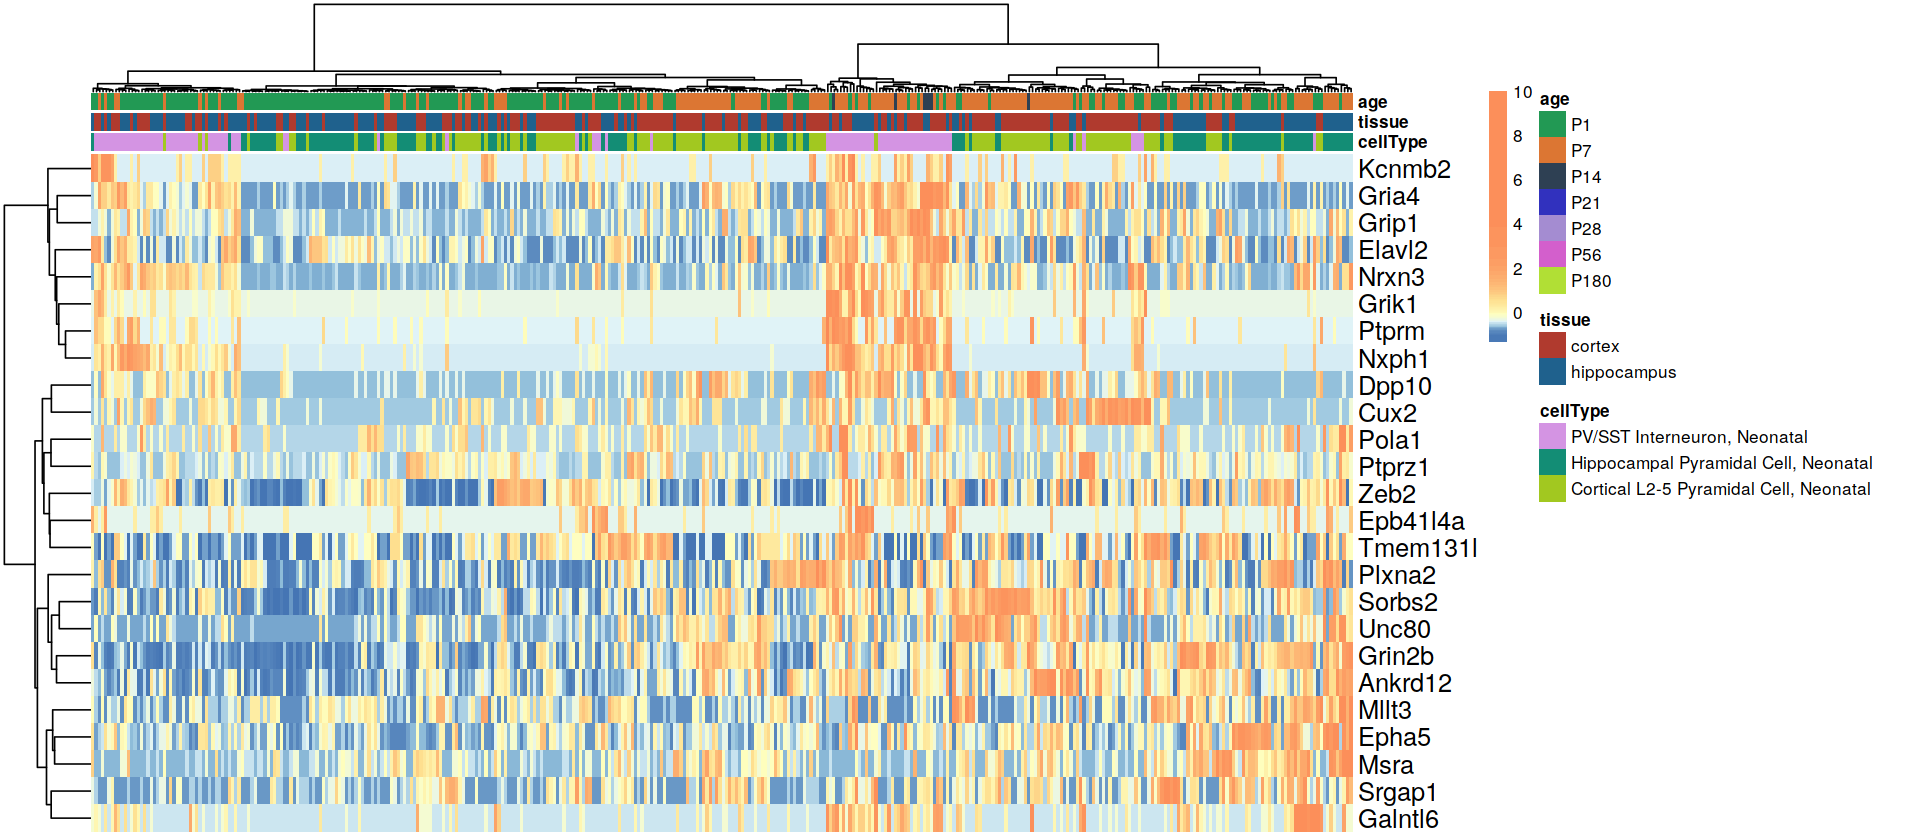

In [37]:
options(repr.plot.width=16, repr.plot.height=7)
neonatalIhp


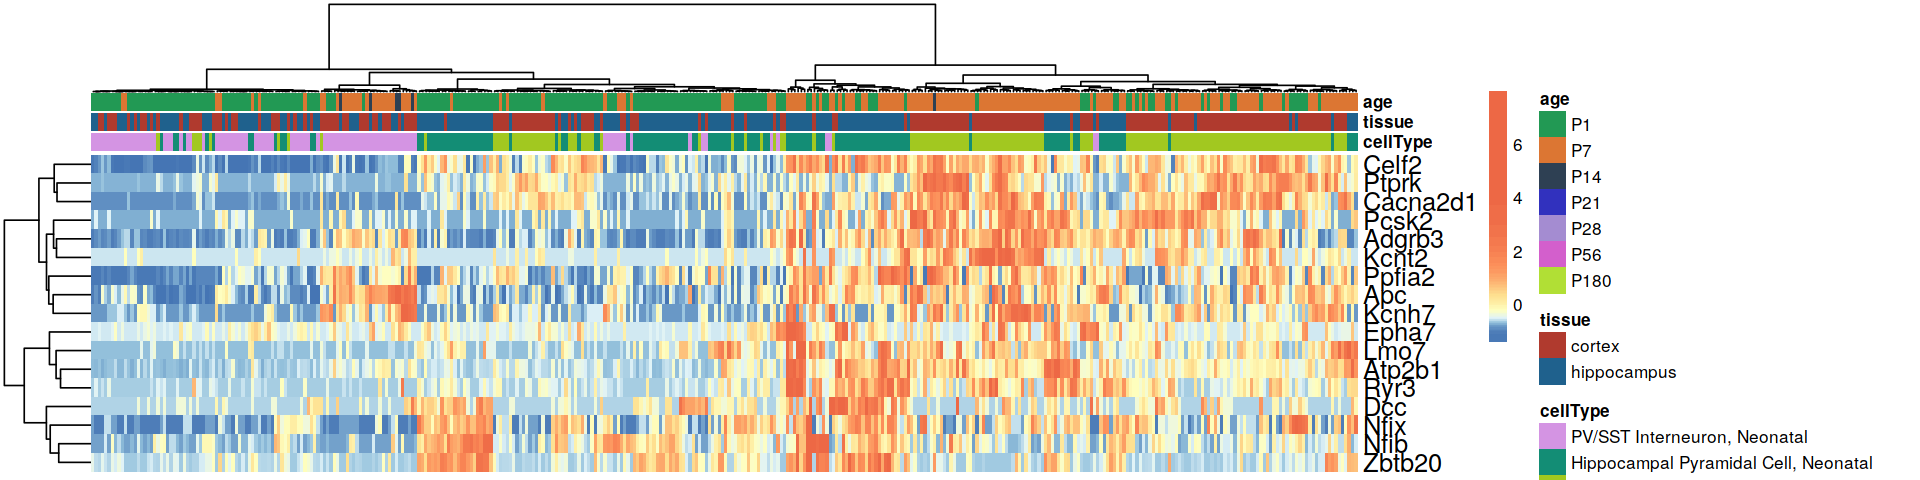

In [38]:
options(repr.plot.width=16, repr.plot.height=4)
neonatalIIhp


In [13]:
sigGADgene = readRDS(file = paste0("/Tan2021/RDS/sigGADgene_all_Neonatal_Related.rds"))
length(sigGADgene)

[1] 49

Loading required package: GenomicFeatures

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading req

category   over_represented_pvalue under_represented_pvalue numDEInCat
5312  GO:0034703 0.0001084348            0.9999909                6         
5314  GO:0034705 0.0001326989            0.9999947                4         
1131  GO:0004970 0.0002986912            0.9999927                3         
5311  GO:0034702 0.0003911895            0.9999577                6         
11017 GO:1902495 0.0004124801            0.9999549                6         
11850 GO:1990351 0.0004370329            0.9999517                6         
8017  GO:0051957 0.0006972153            0.9999952                2         
2091  GO:0008066 0.0008283876            0.9999699                3         
4942  GO:0032983 0.0008773990            0.9999922                2         
1221  GO:0005234 0.0010084715            0.9999903                2         
3250  GO:0016595 0.0010497950            0.9999897                2         
5436  GO:0035282 0.0011299786            0.9999537                3         
8014  GO:0051954 0.0011503834            0.9999882                2         
10344 GO:0099529 0.0013413985            0.9999414                3         
11468 GO:1904315 0.0013413985            0.9999414                3         
1110  GO:0004888 0.0016943722            0.9997541                6         
8015  GO:0051955 0.0017177220            0.9999765                2         
1219  GO:0005230 0.0017635184            0.9999145                3         
3882  GO:0022824 0.0017635184            0.9999145                3         
3886  GO:0022835 0.0017635184            0.9999145                3         
      numInCat
5312   83     
5314   27     
1131   14     
5311  103     
11017 104     
11850 105     
8017    4     
2091   19     
4942    5     
1221    5     
3250    5     
5436   21     
8014    5     
10344  22     
11468  22     
1110  131     
8015    6     
1219   24     
3882   24     
3886   24     
      term                                                                                            
5312  cation channel complex                                                                          
5314  potassium channel complex                                                                       
1131  ionotropic glutamate receptor activity                                                          
5311  ion channel complex                                                                             
11017 transmembrane transporter complex                                                               
11850 transporter complex                                                                             
8017  positive regulation of amino acid transport                                                     
2091  glutamate receptor activity                                                                     
4942  kainate selective glutamate receptor complex                                                    
1221  extracellularly glutamate-gated ion channel activity                                            
3250  glutamate binding                                                                               
5436  segmentation                                                                                    
8014  positive regulation of amine transport                                                          
10344 neurotransmitter receptor activity involved in regulation of postsynaptic membrane potential    
11468 transmitter-gated ion channel activity involved in regulation of postsynaptic membrane potential
1110  transmembrane signaling receptor activity                                                       
8015  regulation of amino acid transport                                                              
1219  extracellular ligand-gated ion channel activity                                                 
3882  transmitter-gated ion channel activity                                                          
3886  transmit

'select()' returned 1:1 mapping between keys and columns

Can't find mm10/ensGene length data in genLenDataBase...

Found the annotation package, TxDb.Mmusculus.UCSC.mm10.ensGene

Trying to get the gene lengths from it.

Warning message in pcls(G):
“initial point very close to some inequality constraints”


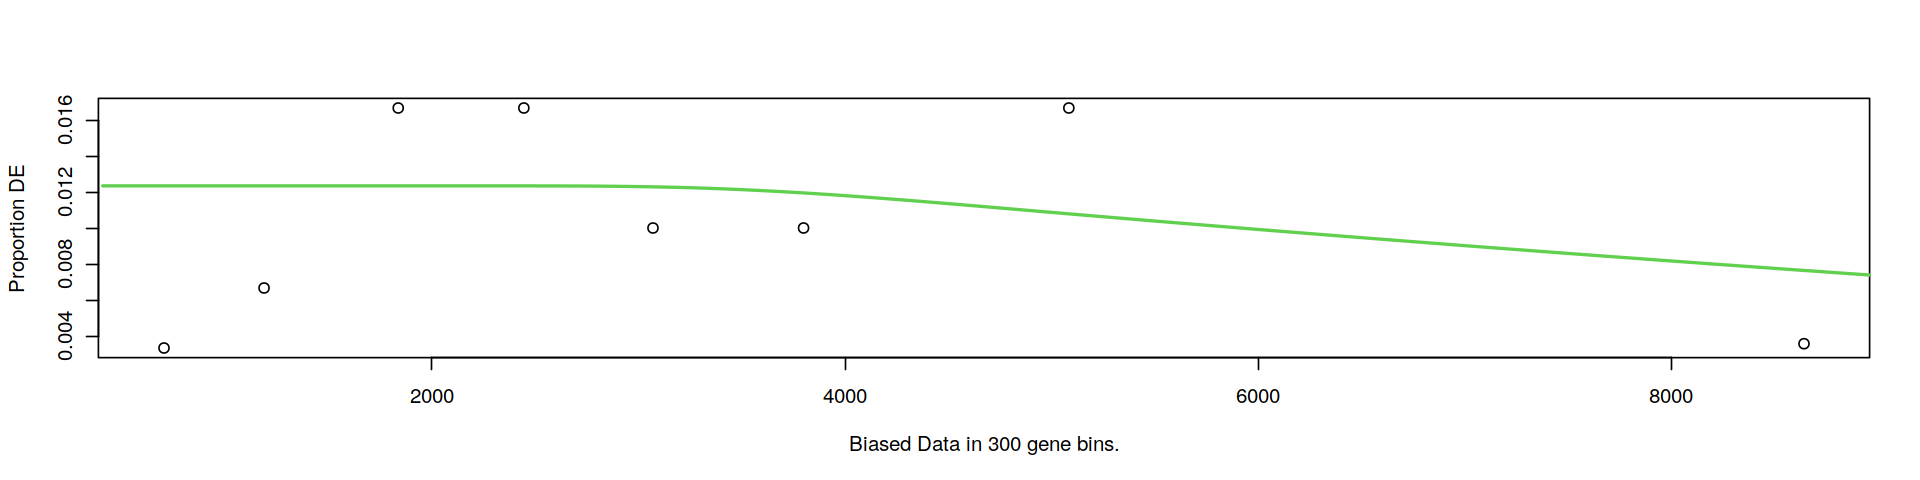

Fetching GO annotations...

For 13 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

'select()' returned 1:1 mapping between keys and columns



category   over_represented_pvalue under_represented_pvalue numDEInCat
7097  GO:0046873 0.000949720             0.9999094                5         
7874  GO:0051481 0.001026173             0.9999890                2         
7518  GO:0050680 0.001343248             0.9999423                3         
3900  GO:0022890 0.001859218             0.9997920                5         
7371  GO:0048667 0.001981148             0.9997263                6         
2198  GO:0008324 0.002014998             0.9997702                5         
6658  GO:0045295 0.002672743             0.9999500                2         
10465 GO:0110111 0.002877998             0.9999428                2         
10084 GO:0098662 0.003021565             0.9996199                5         
7436  GO:0048812 0.003365990             0.9994801                6         
8320  GO:0060401 0.003606421             0.9997754                3         
7452  GO:0048858 0.003653736             0.9994257                6         
10485 GO:0120039 0.003653736             0.9994257                6         
7426  GO:0048786 0.003708007             0.9997679                3         
4946  GO:0032990 0.003822732             0.9993932                6         
3583  GO:0019725 0.003947854             0.9994696                5         
4003  GO:0030182 0.004470842             0.9991138                8         
4945  GO:0032989 0.004866381             0.9991863                6         
3892  GO:0022843 0.004953377             0.9996546                3         
10082 GO:0098660 0.004988751             0.9992906                5         
      numInCat term                                                      
7097  101      metal ion transmembrane transporter activity              
7874    7      negative regulation of cytosolic calcium ion concentration
7518   30      negative regulation of epithelial cell proliferation      
3900  119      inorganic cation transmembrane transporter activity       
7371  195      cell morphogenesis involved in neuron differentiation     
2198  122      cation transmembrane transporter activity                 
6658    9      gamma-catenin binding                                     
10465  10      negative regulation of animal organ morphogenesis         
10084 138      inorganic cation transmembrane transport                  
7436  215      neuron projection morphogenesis                           
8320   43      cytosolic calcium ion transport                           
7452  218      cell projection morphogenesis                             
10485 218      plasma membrane bounded cell projection morphogenesis     
7426   39      presynaptic active zone                                   
4946  221      cell part morphogenesis                                   
3583  154      cellular homeostasis                                      
4003  398      neuron differentiation                                    
4945  234      cellular component morphogenesis                          
3892   42      voltage-gated cation channel activity                     
10082 156      inorganic ion transmembrane transport                     
      ontology
7097  MF      
7874  BP      
7518  BP      
3900  MF      
7371  BP      
2198  MF      
6658  MF      
10465 BP      
10084 BP      
7436  BP      
8320  BP      
7452  BP      
10485 BP      
7426  CC      
4946  BP      
3583  BP      
4003  BP      
4945  BP      
3892  MF      
10082 BP

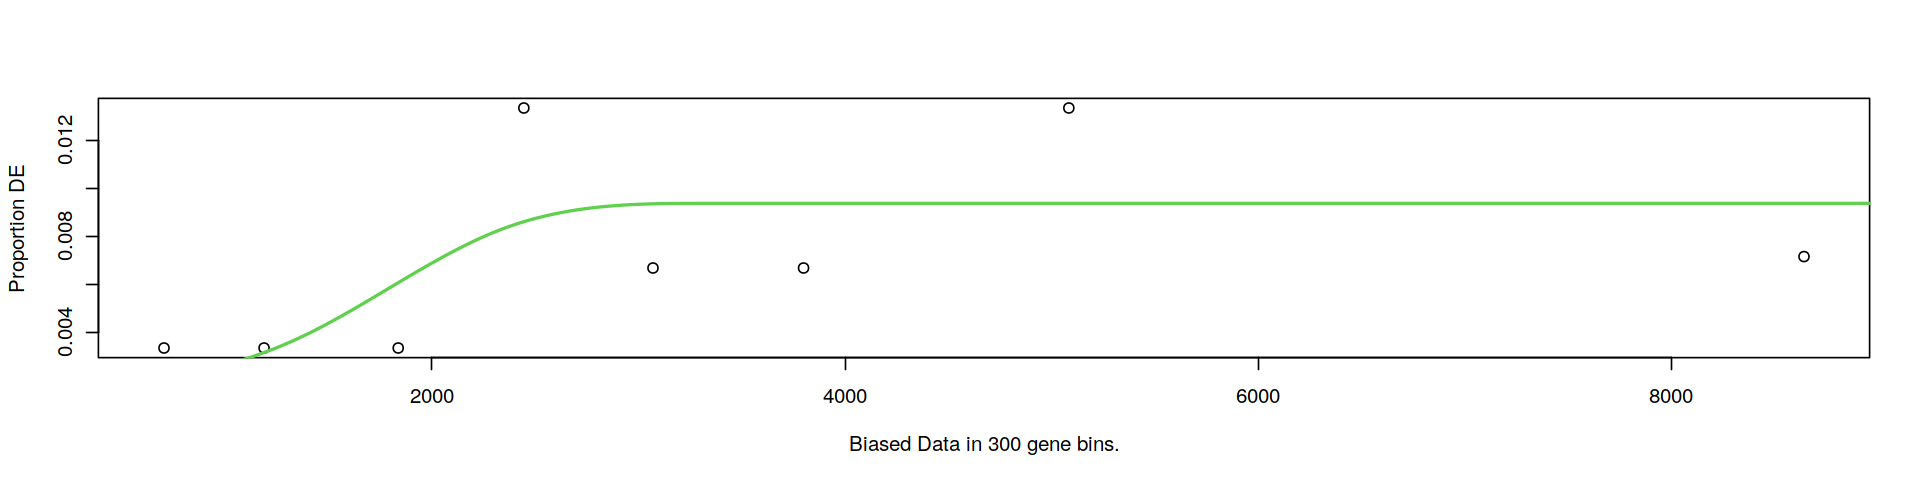

In [41]:
# GO of left and right cluster GAD genes
library(TxDb.Mmusculus.UCSC.mm10.ensGene)
library(org.Mm.eg.db)
library(goseq)

left = readRDS( file = "/Tan2021/RDS/leftGene.rds")# c("Grip1", "Gria4", "Kcnip1", "Elavl2", "Nrxn3", "Grik1", "Ptprm", "Nxph1", "Mllt3",
#         "Epha5", "Msra", "Srgap1", "Galntl6", "Plxna2", "Zbtb20", "Dcc", "Pola1", "Zeb2", "Celf2",
#         "Frmd4a", "Sorbs2", "Adgrb3", "Kcnh7", "Ankrd12", "Rtn1", "Grin2b", "Kcnmb2", "Epb41l4a",
#         "Thsd7a", "Dpp10", "Tenm2", "Tmem131l", "Cux2") #
right = readRDS( file = "/Tan2021/RDS/rightGene.rds") #c("Ptprk", "Cacna2d1", "Kcnt2", "Cacna1b", "Ryr2", "Pcsk2", "Epha7", "Lmo7", "Atp2b1",
#           "Ryr3", "Apc", "Ppfia2", "Unc80", "Ptprz1", "Nfix", "Nfib") #readRDS( file = "/Tan2021/RDS/rightGene.rds") #

paths = list.files("/Tan2021/gad_scores_control_promoter/", full.names = TRUE)
names = list.files("/Tan2021/gad_scores_control_promoter/")
temp = fread(paths[1])
GAD_reg = matrix(0, nrow = nrow(temp), ncol = length(paths))
for (k in 1:length(names)){
    cell = fread(paths[k])
    GAD_reg[, k] = cell$V2
}
GAD_reg = GAD_reg[!duplicated(temp$V1), ]
temp = temp[!duplicated(temp$V1), ]
rownames(GAD_reg) = temp$V1
colnames(GAD_reg) = names
all_cell_norm = t(t(GAD_reg) / colSums(GAD_reg)) * 1e04
all = (all_cell_norm - rowMeans(all_cell_norm))/sqrt(rowVars(all_cell_norm))
all = rownames(all)

library("org.Mm.eg.db")
symbols <- mapIds(org.Mm.eg.db, keys = all, keytype = "SYMBOL", column="ENSEMBL")
symbols = symbols[!duplicated(symbols)]
symbols = symbols[!is.na(symbols)]
all_genes = rep(0, length(symbols))
names(all_genes) = symbols

left_ens <- mapIds(org.Mm.eg.db, keys = left, keytype = "SYMBOL", column="ENSEMBL")

left_go = all_genes
left_go[names(left_go) %in% left_ens] = 1

pwf=nullp(DEgenes = left_go, genome = "mm10", id = "ensGene")
left_go_result = goseq(pwf,"mm10","ensGene")#[1:10, ]
left_go_result %>% head(20) #%>% filter(ontology == "BP") %>% top_n(20, wt = -over_represented_pvalue)

right_ens <- mapIds(org.Mm.eg.db, keys = right, keytype = "SYMBOL", column="ENSEMBL")
right_go = all_genes
right_go[names(right_go) %in% right_ens] = 1

pwf=nullp(right_go, "mm10", "ensGene")
right_go_result = goseq(pwf,"mm10","ensGene")#[1:10, ]
right_go_result %>% head(20)  #%>% filter(ontology == "BP") %>% top_n(20, wt = -over_represented_pvalue)

#save(left_go_result, right_go_result, file = "/Tan2021/Neonatal_subclusters_GO.RData")

# analysis is done in Neonatal_Subcluster.ipynb
save(left_go_result, right_go_result, file = "/Tan2021/RData/Neonatal_subclusters_GO_full.RData")
load(file = "/Tan2021/RData/Neonatal_subclusters_GO_full.RData")

In [42]:
head(left_go_result %>% mutate(newTerm = paste0(term, "(", ontology, ")")) )

category   over_represented_pvalue under_represented_pvalue numDEInCat
5312  GO:0034703 0.0001084348            0.9999909                6         
5314  GO:0034705 0.0001326989            0.9999947                4         
1131  GO:0004970 0.0002986912            0.9999927                3         
5311  GO:0034702 0.0003911895            0.9999577                6         
11017 GO:1902495 0.0004124801            0.9999549                6         
11850 GO:1990351 0.0004370329            0.9999517                6         
      numInCat term                                   ontology
5312   83      cation channel complex                 CC      
5314   27      potassium channel complex              CC      
1131   14      ionotropic glutamate receptor activity MF      
5311  103      ion channel complex                    CC      
11017 104      transmembrane transporter complex      CC      
11850 105      transporter complex                    CC      
      newTerm                                   
5312  cation channel complex(CC)                
5314  potassium channel complex(CC)             
1131  ionotropic glutamate receptor activity(MF)
5311  ion channel complex(CC)                   
11017 transmembrane transporter complex(CC)     
11850 transporter complex(CC)

also installing the dependency ‘shades’



ggfittext installed

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


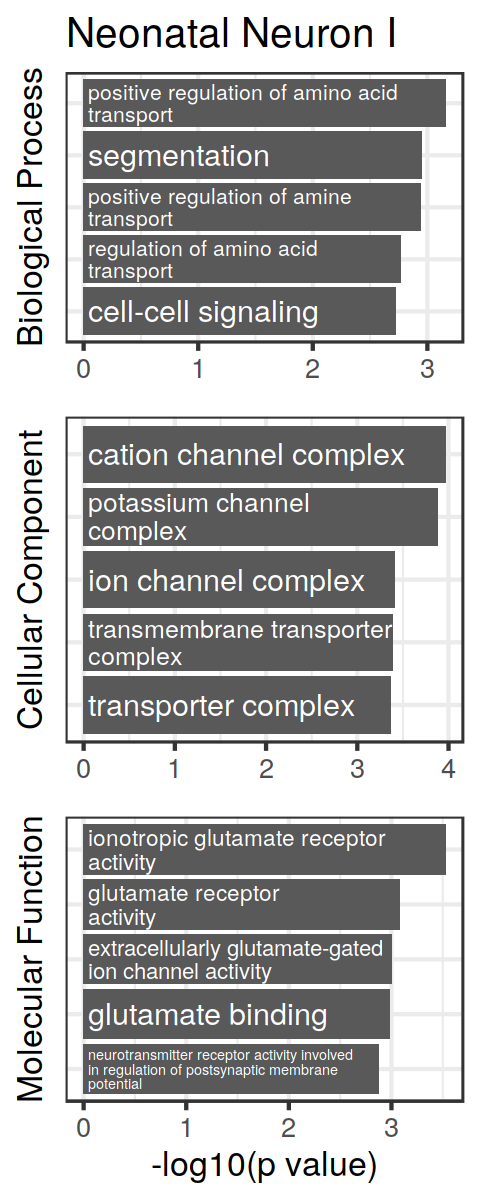

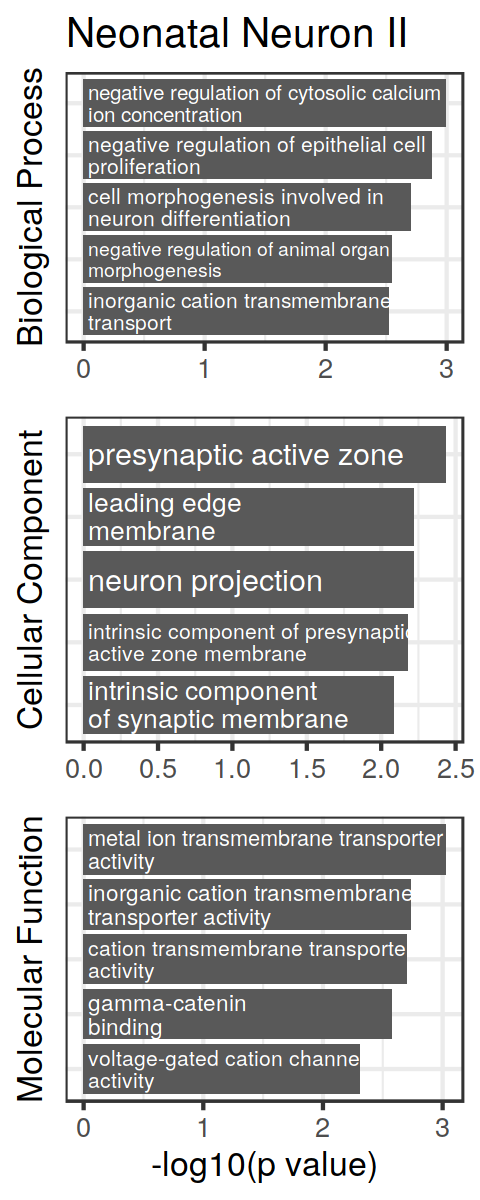

In [45]:
pacman::p_load(ggfittext)

bp1 = left_go_result %>% filter(ontology == "BP") %>% head(5) %>% ggplot(aes(x = reorder(term, -over_represented_pvalue), y = -log10(over_represented_pvalue), label = reorder(term, -over_represented_pvalue))) +
    geom_col(position = "dodge") +
geom_bar_text(position = "dodge", place = "left", reflow = TRUE, grow = FALSE, size = 18) +
coord_flip() +
ggtitle("Neonatal Neuron I") +
theme_bw(base_size = 20) +
theme(axis.text.y = element_blank(),  axis.title.x = element_blank(), axis.ticks.y = element_blank()) +
guides(size = FALSE) +
xlab("Biological Process") +
ylab("")

cc1 = left_go_result %>% filter(ontology == "CC") %>% head(5) %>% ggplot(aes(x = reorder(term, -over_represented_pvalue), y = -log10(over_represented_pvalue), label = reorder(term, -over_represented_pvalue))) +
    geom_col(position = "dodge") +
geom_bar_text(position = "dodge", place = "left", reflow = TRUE, grow = FALSE, size = 18) +
coord_flip() +
ylab("") +
theme_bw(base_size = 20) +
theme(axis.text.y = element_blank(),  axis.title.x = element_blank(), axis.ticks.y = element_blank()) +
guides(size = FALSE) +
xlab("Cellular Component")

mf1 = left_go_result %>% filter(ontology == "MF") %>% head(5) %>% ggplot(aes(x = reorder(term, -over_represented_pvalue), y = -log10(over_represented_pvalue), label = reorder(term, -over_represented_pvalue))) +
    geom_col(position = "dodge") +
geom_bar_text(position = "dodge", place = "left", reflow = TRUE, grow = FALSE, size = 18) +
coord_flip() +
ylab("-log10(p value)") +
theme_bw(base_size = 20) +
theme(axis.text.y = element_blank(),  axis.ticks.y = element_blank()) +
guides(size = FALSE) +
xlab("Molecular Function") +
ylab("-log10(p value)")

neonatalIgo = ggarrange(bp1, cc1, mf1, nrow = 3, ncol = 1) 

##
bp2 = right_go_result %>% filter(ontology == "BP") %>% head(5) %>% ggplot(aes(x = reorder(term, -over_represented_pvalue), y = -log10(over_represented_pvalue), label = reorder(term, -over_represented_pvalue))) +
    geom_col(position = "dodge") +
geom_bar_text(position = "dodge", place = "left", reflow = TRUE, grow = FALSE, size = 18) +
coord_flip() +
ggtitle("Neonatal Neuron II") +
theme_bw(base_size = 20) +
theme(axis.text.y = element_blank(),  axis.title.x = element_blank(), axis.ticks.y = element_blank()) +
guides(size = FALSE) +
xlab("Biological Process")

cc2 = right_go_result %>% filter(ontology == "CC") %>% head(5) %>% ggplot(aes(x = reorder(term, -over_represented_pvalue), y = -log10(over_represented_pvalue), label = reorder(term, -over_represented_pvalue))) +
    geom_col(position = "dodge") +
geom_bar_text(position = "dodge", place = "left", reflow = TRUE, grow = FALSE, size = 18) +
coord_flip() +
theme_bw(base_size = 20) +
theme(axis.text.y = element_blank(), axis.title.x = element_blank(), axis.ticks.y = element_blank()) +
guides(size = FALSE) +
xlab("Cellular Component")

mf2 = right_go_result %>% filter(ontology == "MF") %>% head(5) %>% ggplot(aes(x = reorder(term, -over_represented_pvalue), y = -log10(over_represented_pvalue), label = reorder(term, -over_represented_pvalue))) +
    geom_col(position = "dodge") +
geom_bar_text(position = "dodge", place = "left", reflow = TRUE, grow = FALSE, size = 18) +
coord_flip() +
theme_bw(base_size = 20) +
theme(axis.text.y = element_blank(), axis.ticks.y = element_blank()) +
guides(size = FALSE) +
xlab("Molecular Function") +
ylab("-log10(p value)")

neonatalIIgo = ggarrange(bp2, cc2, mf2, nrow = 3, ncol = 1) 

saveRDS(neonatalIgo, file = "/Tan2021/RDS/neonatalIgo.rds")
saveRDS(neonatalIIgo, file = "/Tan2021/RDS/neonatalIIgo.rds")

options(repr.plot.width=4, repr.plot.height=10)


neonatalIgo
neonatalIIgo

In [46]:
cellTypeList = c("Neonatal Neuron 1", "Neonatal Neuron 2", 
                 "Medium Spiny Neuron", "Interneuron",
                 "Hippocampal Granule Cell", "Hippocampal Pyramidal Cell", 
                 "Cortical L2-5 Pyramidal Cell", "Cortical L6 Pyramidal Cell", 
                 "Neonatal Astrocyte", "Adult Astrocyte",
                 "Oligodendrocyte Progenitor", "Mature Oligodendrocyte", 
                 "Microglia Etc.") #, "Unknown"
cellTypeNameList = gsub(" ", "_", cellTypeList)
cellTypeNameList

[1] "Neonatal_Neuron_1"            "Neonatal_Neuron_2"           
 [3] "Medium_Spiny_Neuron"          "Interneuron"                 
 [5] "Hippocampal_Granule_Cell"     "Hippocampal_Pyramidal_Cell"  
 [7] "Cortical_L2-5_Pyramidal_Cell" "Cortical_L6_Pyramidal_Cell"  
 [9] "Neonatal_Astrocyte"           "Adult_Astrocyte"             
[11] "Oligodendrocyte_Progenitor"   "Mature_Oligodendrocyte"      
[13] "Microglia_Etc."

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Warning message:
“Removed 26 rows containing non-finite values (stat_boxplot).”


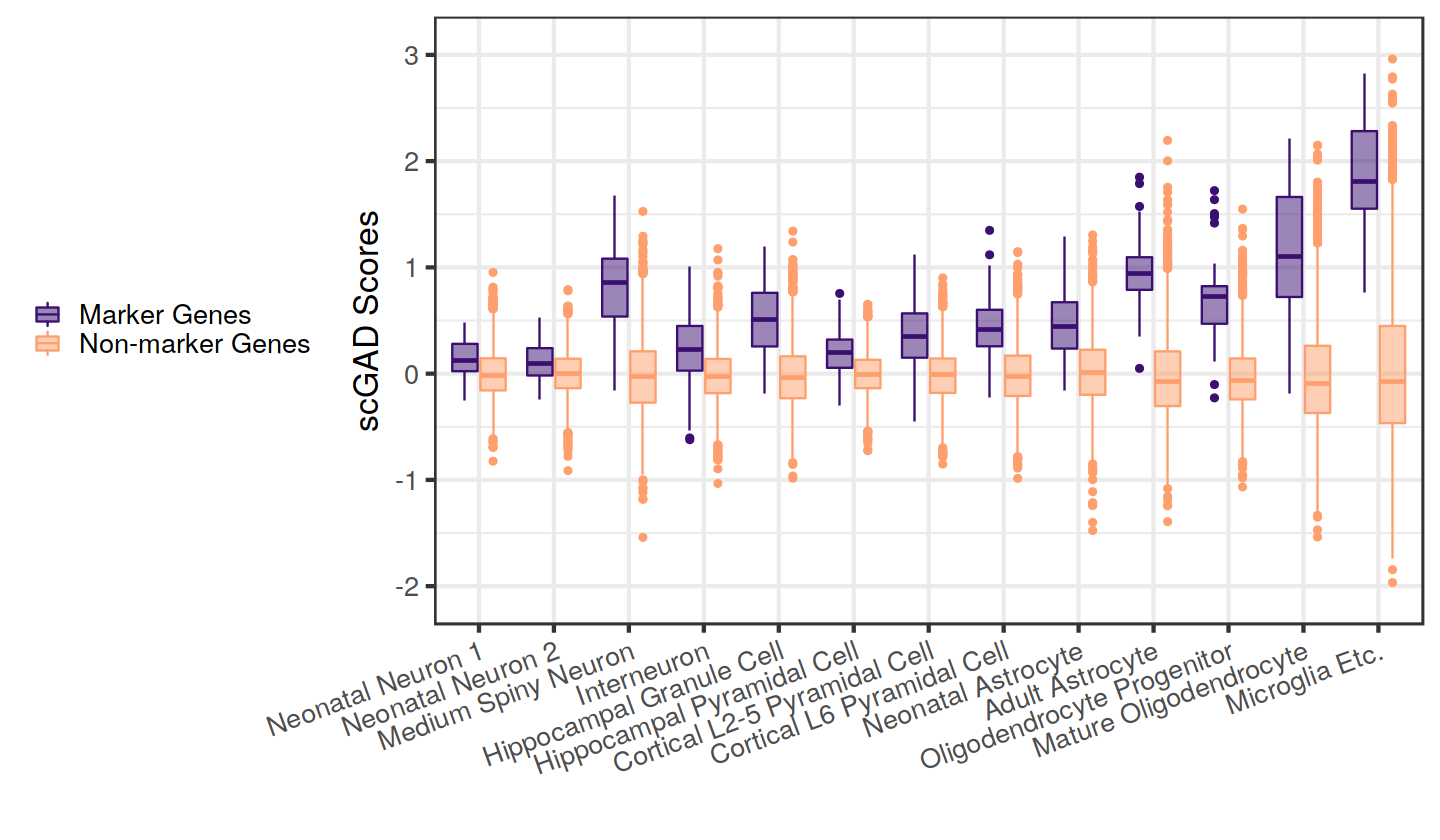

In [53]:
options(repr.plot.width=12, repr.plot.height=7)
gadMarkerNonmarker = mean_gad_score_boxplot %>%
ggplot(aes(x=factor(cell_type, levels = cellTypeNameList, labels = cellTypeList), y=as.numeric(gad), color=factor(markers, levels = c(1, 0), labels = c("Marker Genes", "Non-marker Genes")), fill=factor(markers, levels = c(1, 0), labels = c("Marker Genes", "Non-marker Genes")))) + 
    geom_boxplot() + 
    theme_bw(base_size = 20) + 
    ggpubr::rotate_x_text(angle = 20) +
    ylab("scGAD Scores") + xlab("") + 
    coord_cartesian(ylim = c(0, 5)) +
    scale_fill_viridis(option = "magma", discrete =TRUE, begin = 0.2, end = 0.8, alpha = 0.5) +
    scale_color_viridis(option = "magma", discrete =TRUE, begin = 0.2, end = 0.8) +
    ggpubr::rremove("legend.title") +
    theme(legend.position = "left") +
coord_cartesian(ylim = c(-2.1, 3.1))
#coord_flip(ylim = c(0,4)) +


saveRDS(gadMarkerNonmarker, file = "/Tan2021/RDS/gadMarkerNonmarker.rds")
gadMarkerNonmarker

In [55]:
# Get gad scores for all cells and summary these into a matrix "all".
paths = list.files("/Tan2021/gad_scores_control_promoter/", full.names = TRUE)
names = list.files("/Tan2021/gad_scores_control_promoter/")
temp = fread(paths[1])
GAD_reg = matrix(0, nrow = nrow(temp), ncol = length(paths))
for (k in 1:length(names)){
    cell = fread(paths[k])
    GAD_reg[, k] = cell$V2
}
GAD_reg = GAD_reg[!duplicated(temp$V1), ]
temp = temp[!duplicated(temp$V1), ]
rownames(GAD_reg) = temp$V1
colnames(GAD_reg) = names
all_cell_norm = t(t(GAD_reg) / colSums(GAD_reg)) * 1e04
all = (all_cell_norm - rowMeans(all_cell_norm))/sqrt(rowVars(all_cell_norm))

s = CreateSeuratObject(all)
all.genes <- rownames(s)

cell_types = summary$`cell-type cluster`
names(cell_types) = summary$cell
Idents(s) = cell_types
s@assays$RNA@scale.data = all
pbmc.markers = all_marker_genes
head(all_marker_genes)
top10 = pbmc.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)
top10 = top10[!duplicated(top10$gene), ]
selected = s@assays$RNA@scale.data
selected = selected[rownames(selected) %in% top10$gene, ]
selected = selected[match(top10$gene, rownames(selected)), ]
selected = aggregate(selected, data.frame(top10$cluster), sum)
all_features = as.character(selected$top10.cluster)


p_val        avg_log2FC pct.1 pct.2 p_val_adj    cluster           
Gli2    5.688103e-24 1.513480   0.907 0.432 1.411787e-20 Neonatal Astrocyte
Lpp     1.894119e-21 2.033270   0.893 0.440 4.701203e-18 Neonatal Astrocyte
Sox6    9.964665e-21 3.088212   0.920 0.404 2.473230e-17 Neonatal Astrocyte
Creb5   4.875110e-20 1.587464   0.853 0.444 1.210002e-16 Neonatal Astrocyte
Bcl2    6.401930e-20 1.457874   0.853 0.423 1.588959e-16 Neonatal Astrocyte
Shroom3 1.191160e-19 4.144654   0.893 0.431 2.956459e-16 Neonatal Astrocyte
        gene   
Gli2    Gli2   
Lpp     Lpp    
Sox6    Sox6   
Creb5   Creb5  
Bcl2    Bcl2   
Shroom3 Shroom3

In [56]:
cellTypeList= c("Neonatal Neuron 1", "Neonatal Neuron 2", 
                 "Medium Spiny Neuron", "Interneuron",
                 "Hippocampal Granule Cell", "Hippocampal Pyramidal Cell", 
                 "Cortical L2–5 Pyramidal Cell", "Cortical L6 Pyramidal Cell", 
                 "Neonatal Astrocyte", "Adult Astrocyte",
                 "Oligodendrocyte Progenitor", "Mature Oligodendrocyte", 
                 "Microglia Etc.", "Unknown") #
cellTypeColor = c("#28B463", "#2FFBE5", 
                              "#7D3C98", "#BB8FCE",
                              "#1B4F72", "#2488BA",
                              "#AED6F1", "#1C33F6", 
                              "#EC7063", "#B03A2E", 
                              "#E2EE27", "#F39C12", 
                              "#000000", "grey")

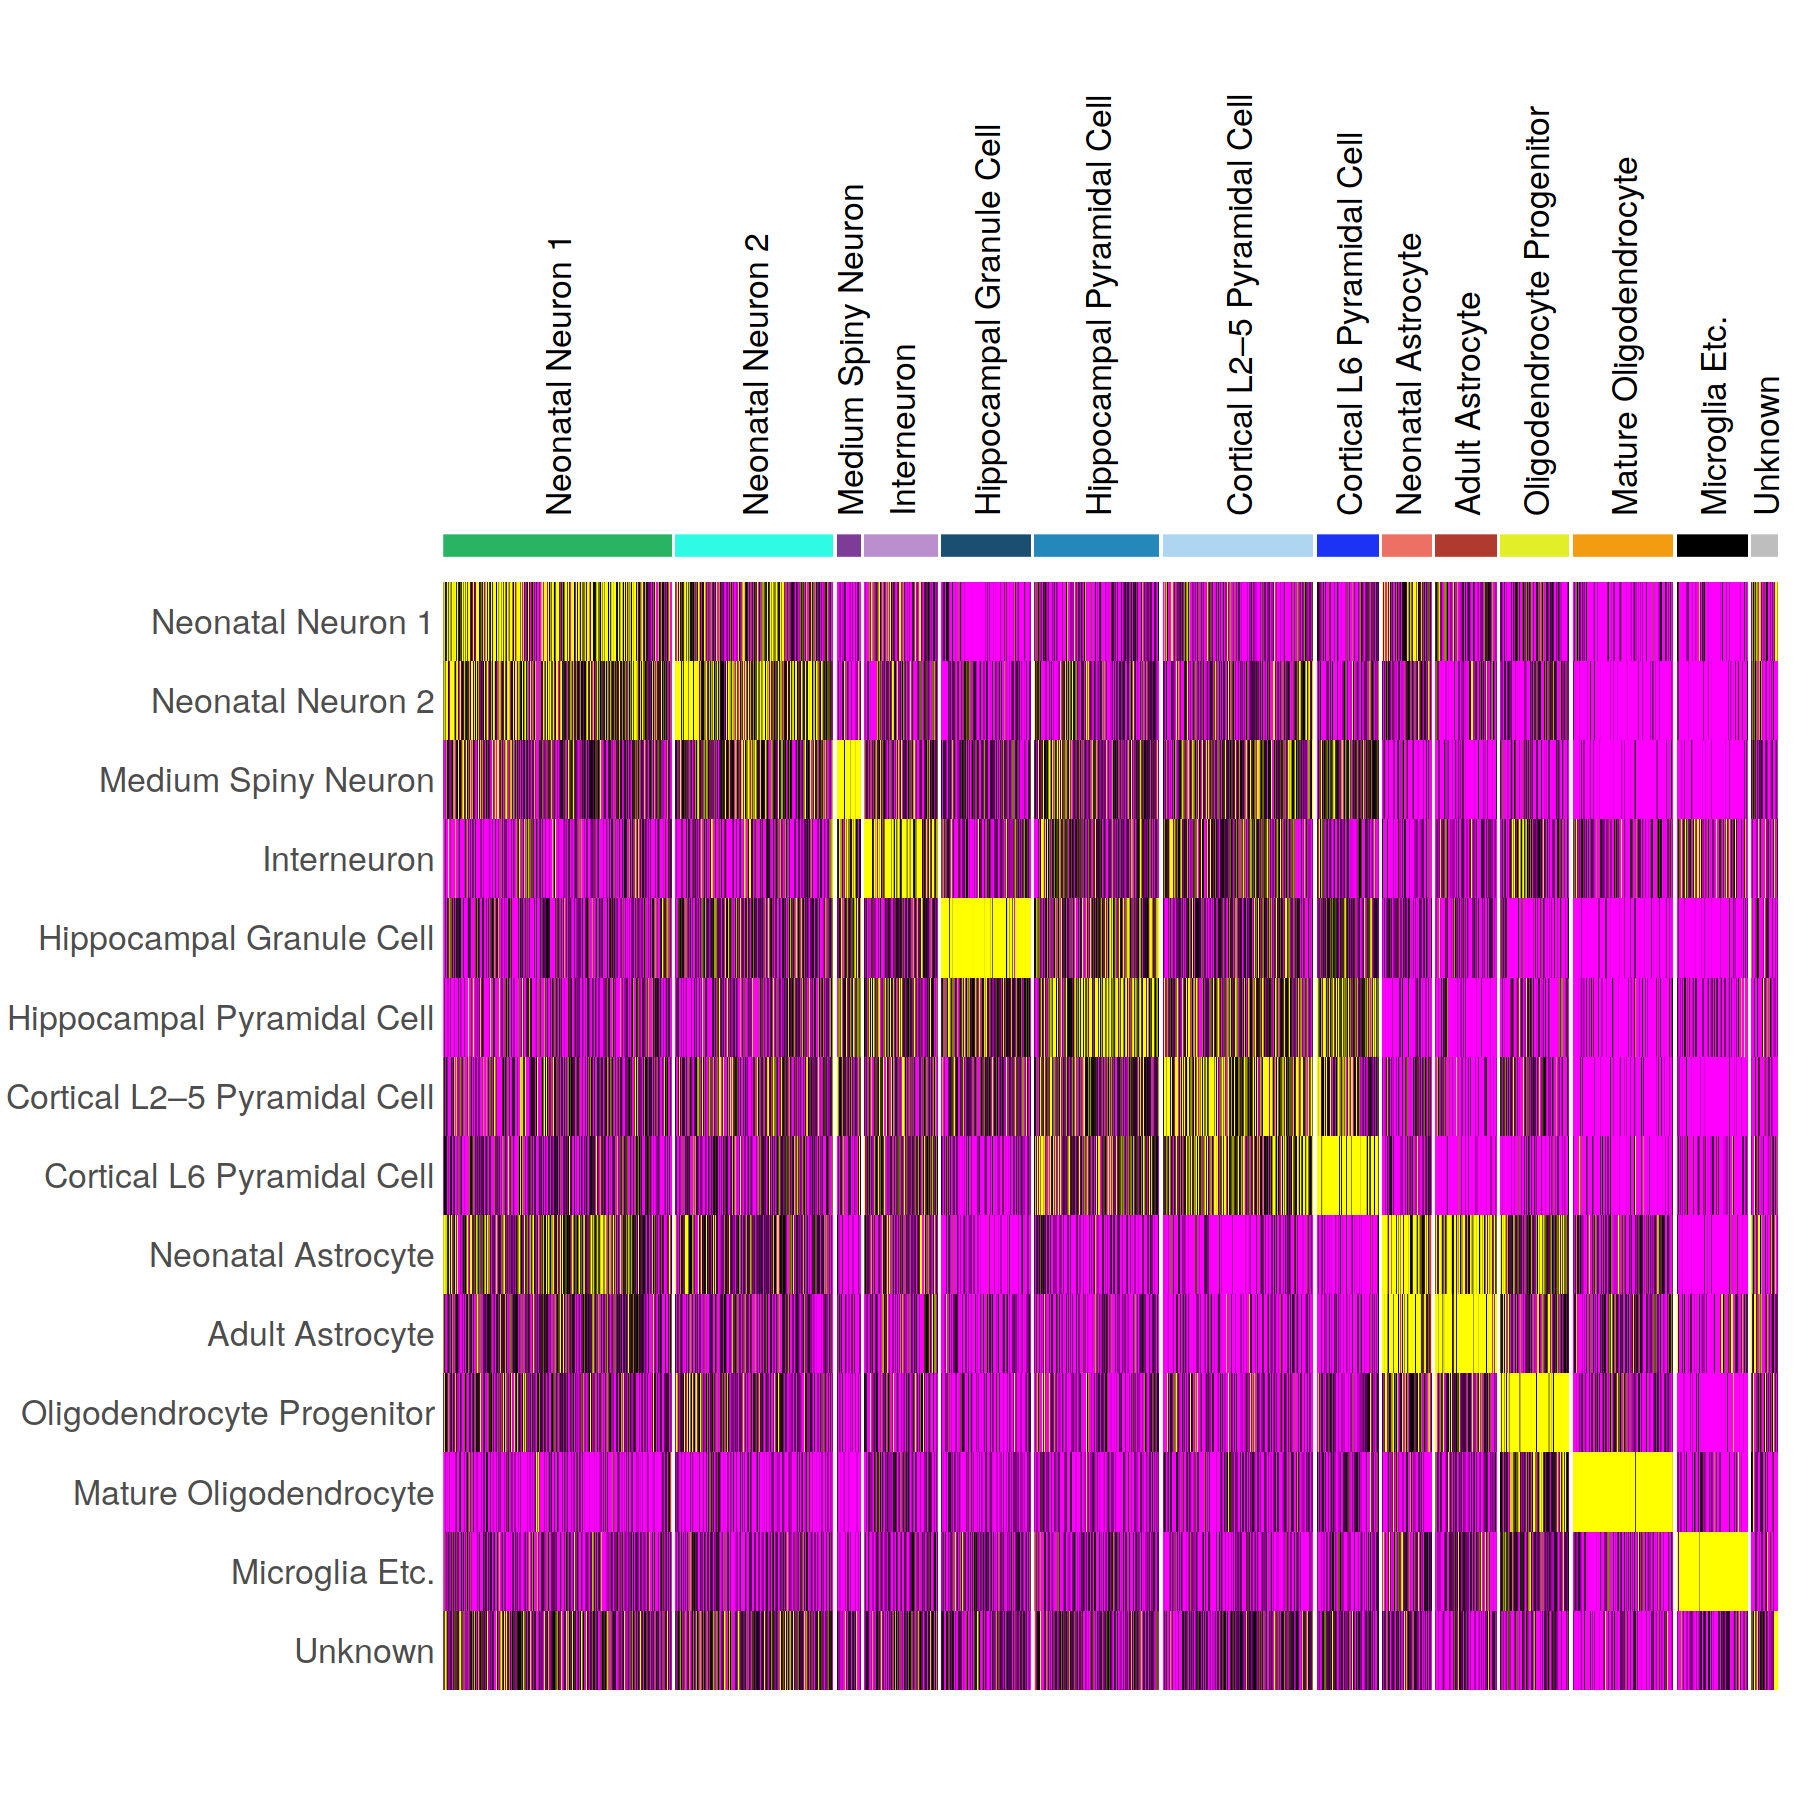

In [57]:
options(repr.plot.width=15, repr.plot.height=15)
Idents(seurat_heatmap_obj) = factor(Idents(seurat_heatmap_obj), levels = cellTypeList)
p = DoHeatmap(seurat_heatmap_obj, features = all_features, slot = "counts", label = TRUE, group.colors = cellTypeColor, angle = 90, size = 7) + NoLegend() + theme(axis.text.y = element_text(size = 20))
p$data$Feature = factor(p$data$Feature, levels = rev(cellTypeList))
oriNeonatal1 = p 
oriNeonatal1


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


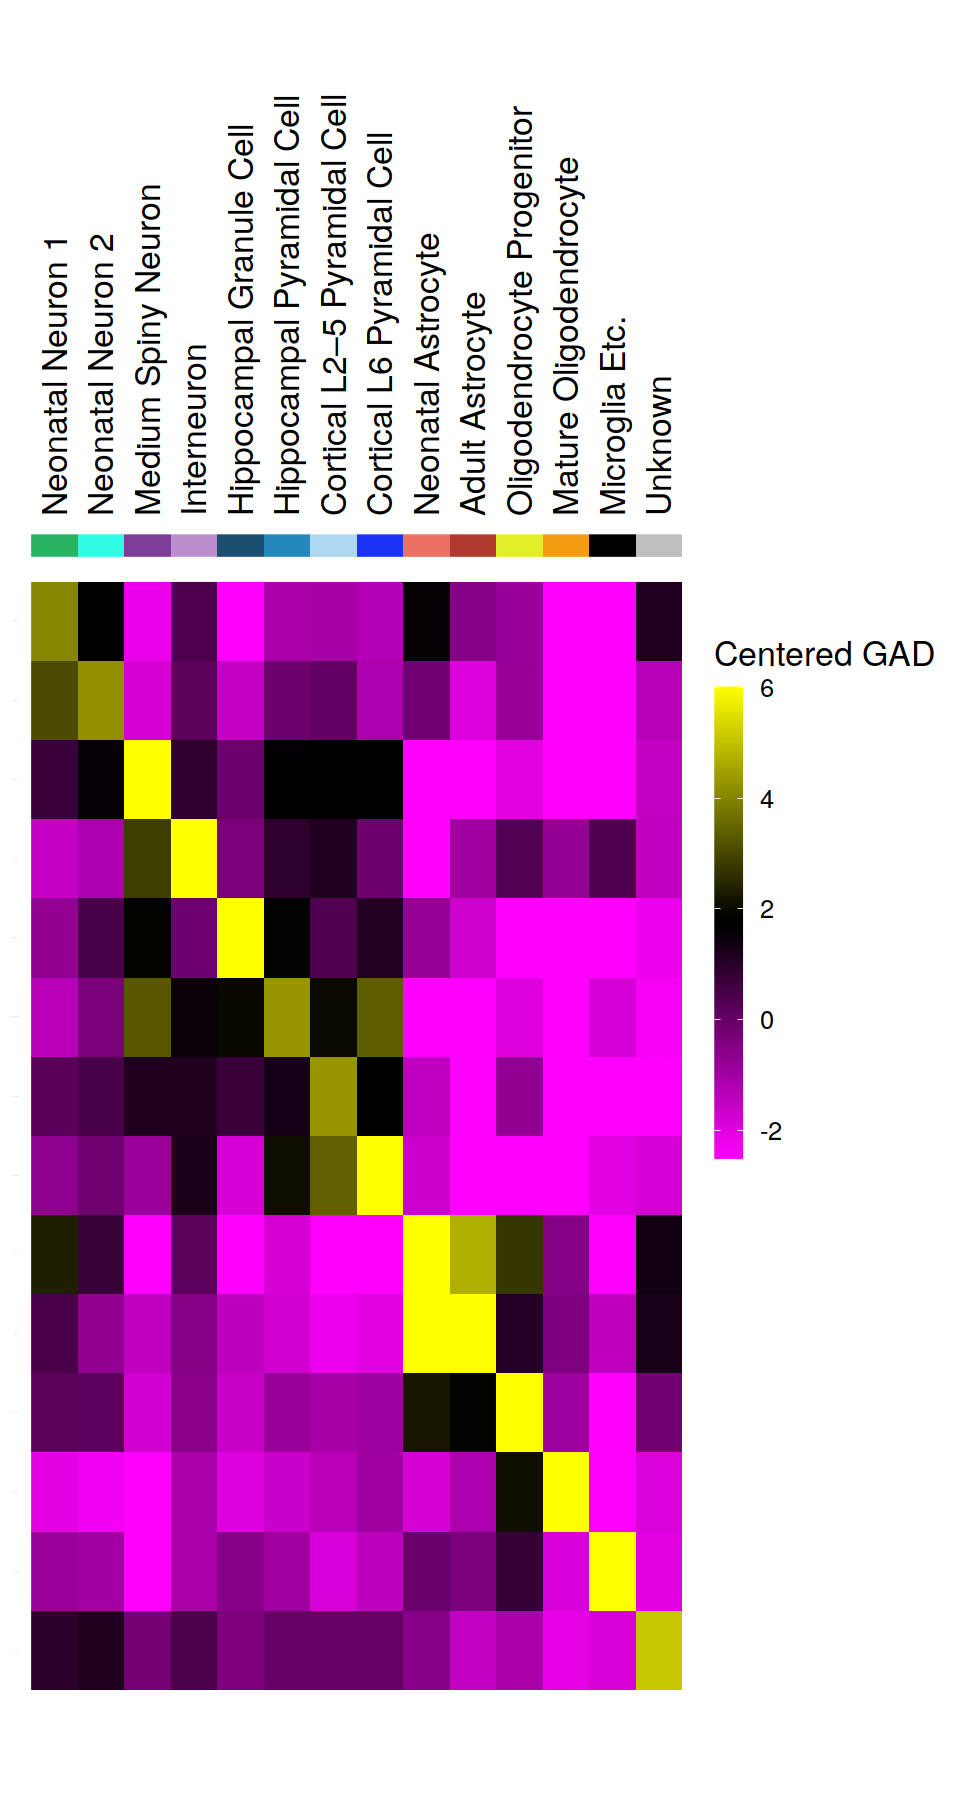

In [58]:
options(repr.plot.width=8, repr.plot.height=15)
Idents(seurat_mean_heatmap_obj) = factor(Idents(seurat_mean_heatmap_obj), levels = cellTypeList)
p = DoHeatmap(seurat_mean_heatmap_obj, features = all_features, slot = "counts", label = TRUE, group.colors = cellTypeColor, draw.lines = FALSE, size = 7, angle = 90) + 
    theme(axis.text.y = element_text(size = 0), legend.key.height = unit(2, "cm"), legend.text = element_text(size = 15), legend.title = element_text(size = 20)) + guides(colour = FALSE) + labs(fill = "Centered GAD")

p$data$Feature = factor(p$data$Feature, levels = rev(cellTypeList))
oriNeonatal2 = p #+ ggpubr::theme_pubclean()
oriNeonatal2

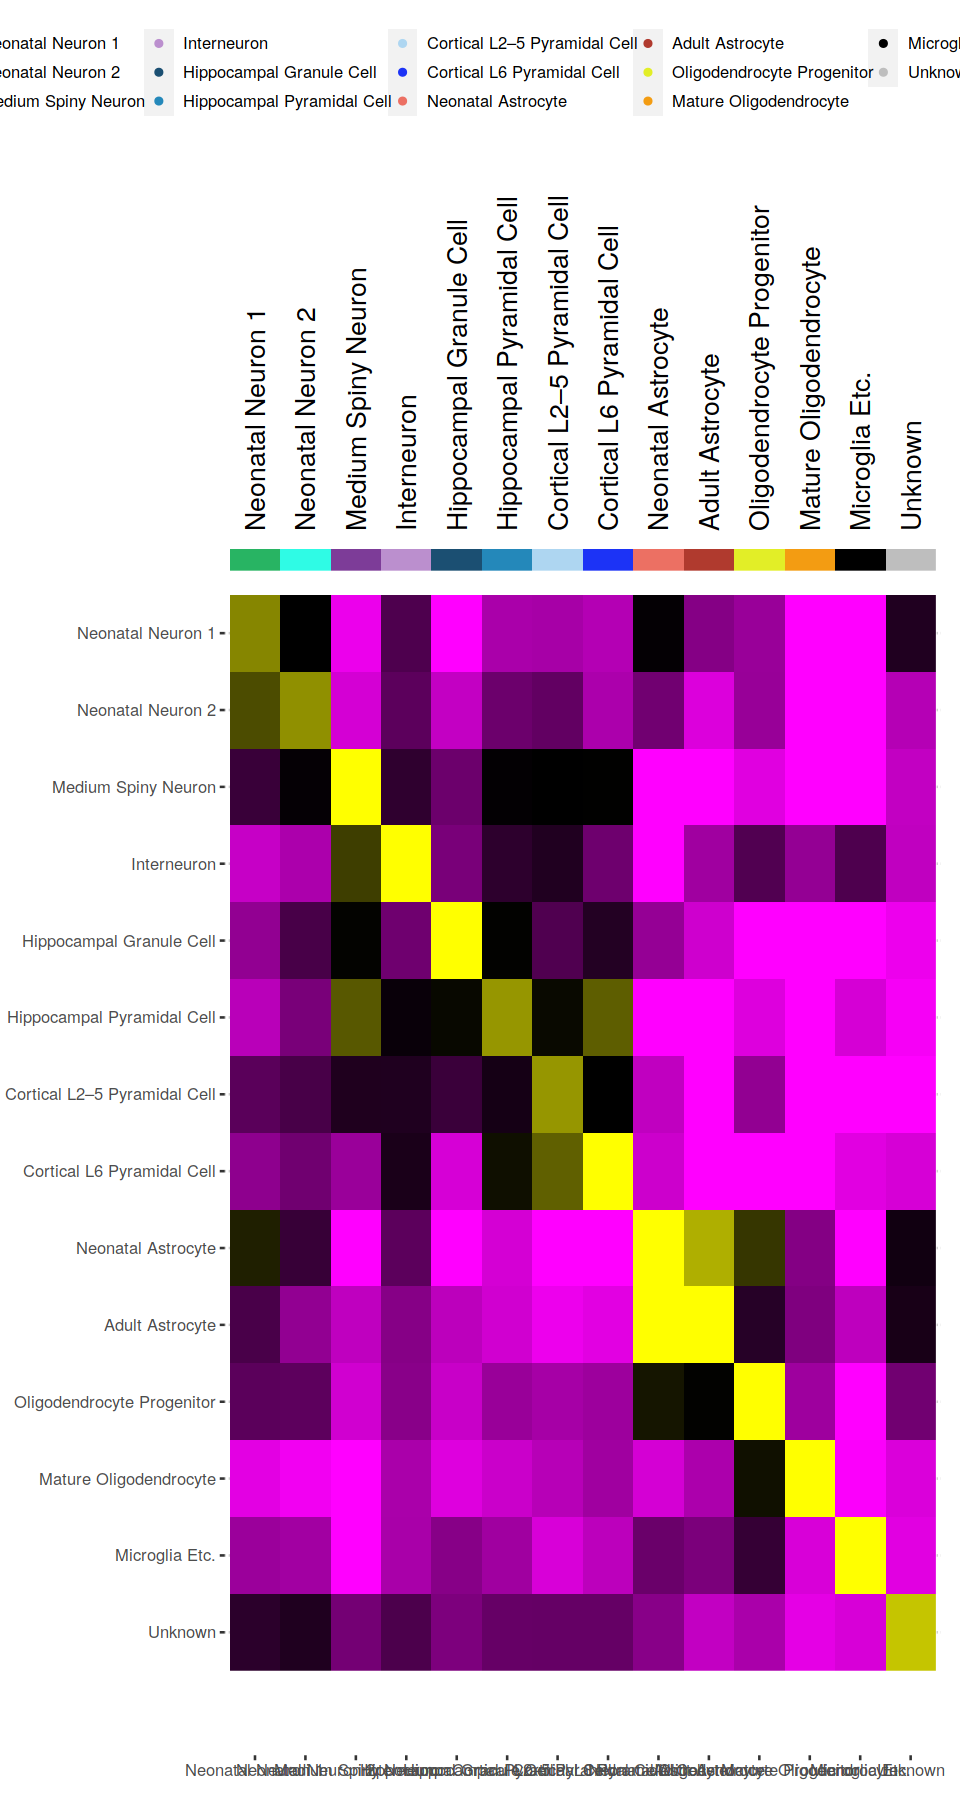

In [59]:
Idents(seurat_mean_heatmap_obj) = factor(Idents(seurat_mean_heatmap_obj), levels = cellTypeList)
p = DoHeatmap(seurat_mean_heatmap_obj, features = all_features, slot = "counts", label = TRUE, group.colors = cellTypeColor, draw.lines = FALSE, angle = 90) + NoLegend()
p$data$Feature = factor(p$data$Feature, levels = rev(cellTypeList))
p + ggpubr::theme_pubclean()

In [60]:
## save(all_genes, top10_genes, sig_genes, file = "/Tan2021/detected_markergenes_control_all_top10_sig.RData")
load(file = "/Tan2021/rdata_01272022/detected_markergenes_control_all_top10_sig.RData")
load("/Tan2021/rdata_01272022/heatmap_objs.RData")

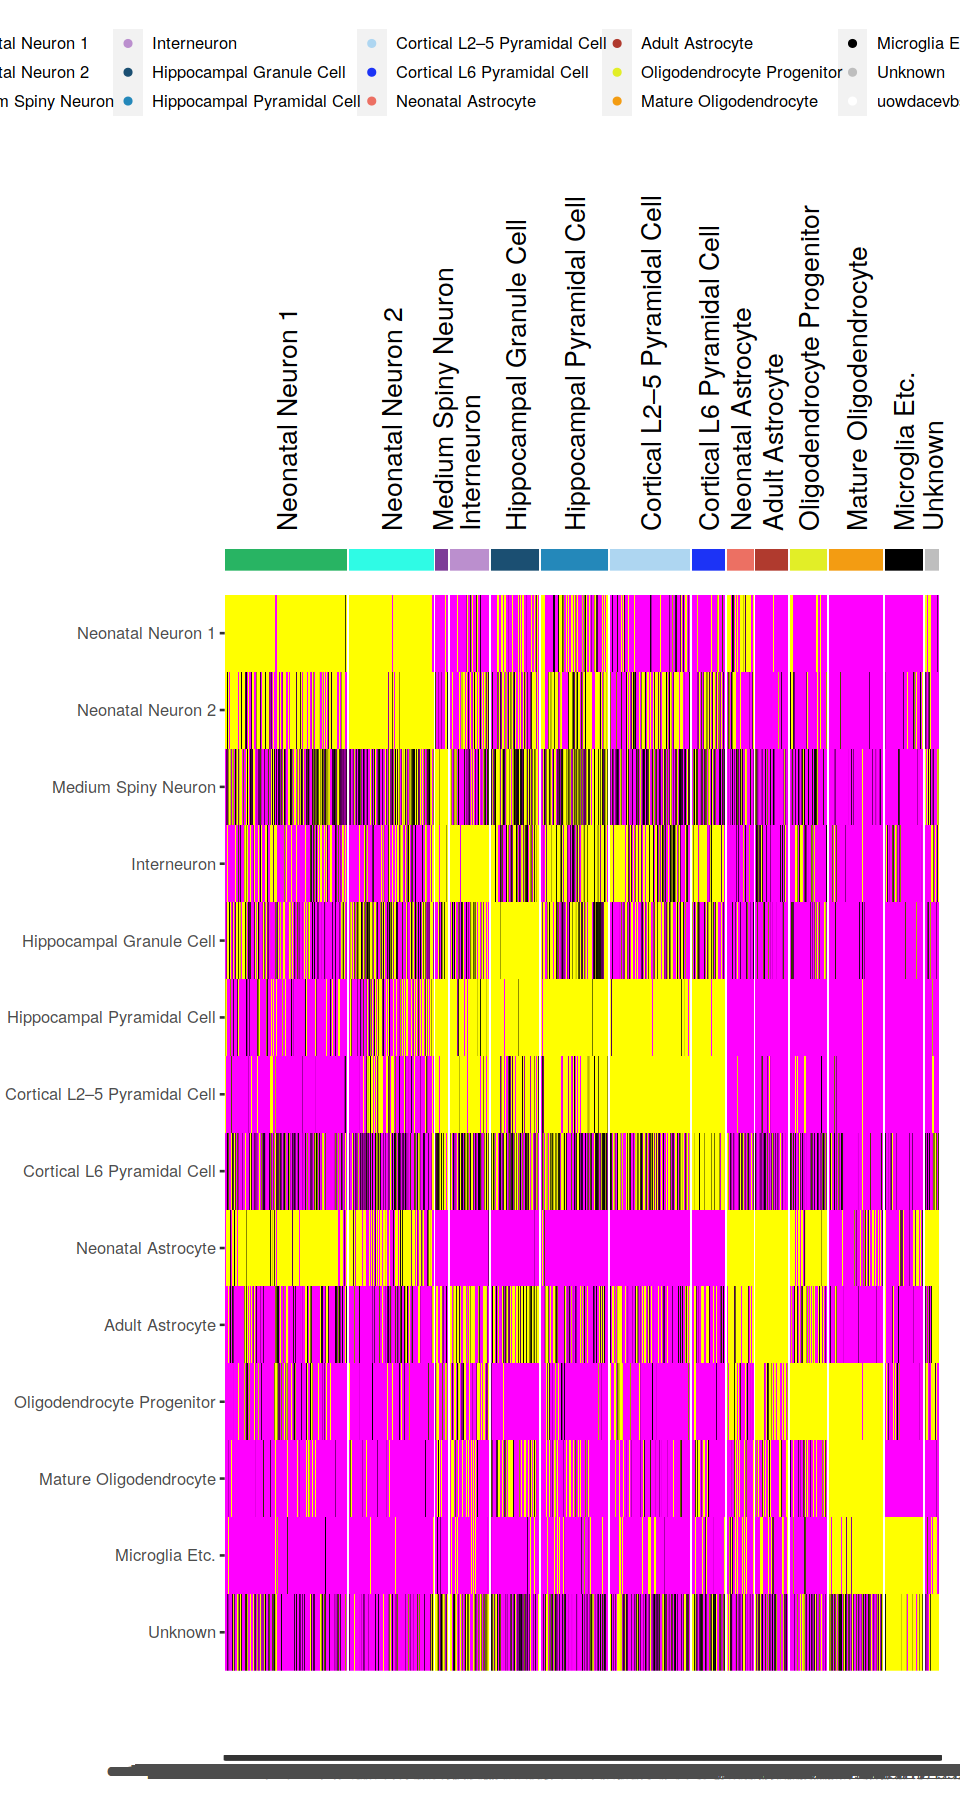

In [61]:
Idents(seurat_rowmean_sig_heatmap_obj) = factor(Idents(seurat_rowmean_sig_heatmap_obj), levels = cellTypeList)
p = DoHeatmap(seurat_rowmean_sig_heatmap_obj, features = all_features, slot = "counts", label = TRUE, group.colors = cellTypeColor, angle = 90) + NoLegend()
p$data$Feature = factor(p$data$Feature, levels = rev(cellTypeList))
p + ggpubr::theme_pubclean()

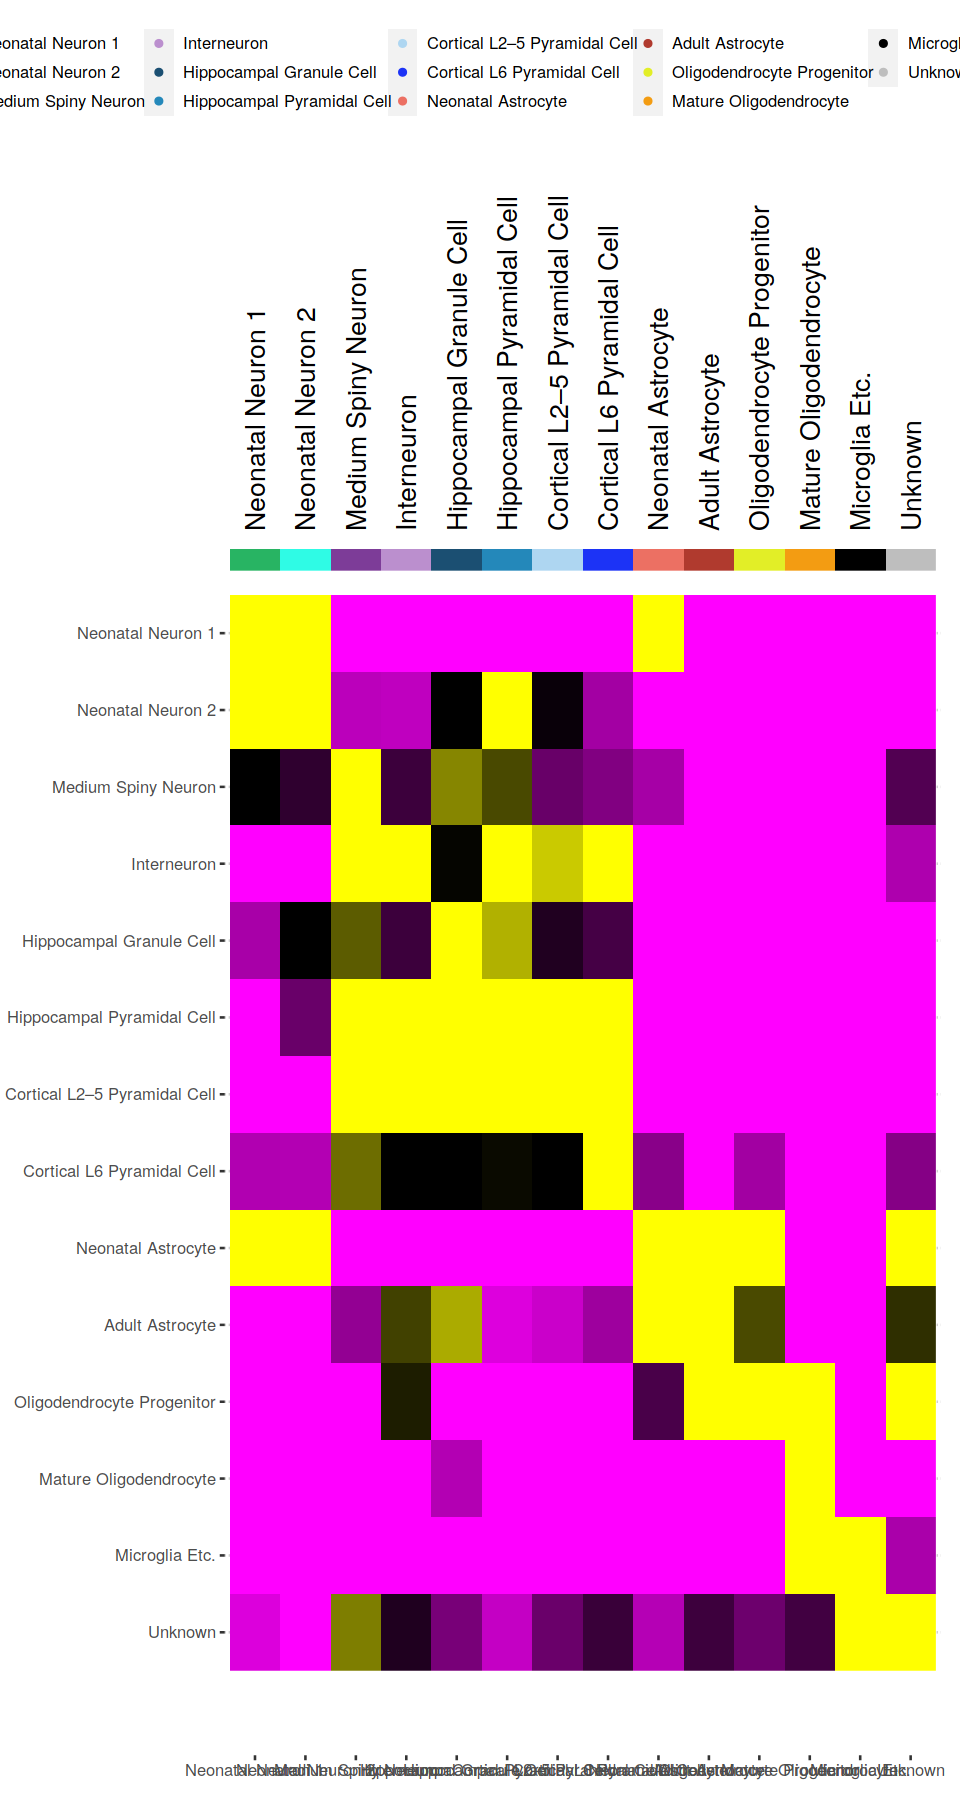

In [62]:
Idents(seurat_rowcolmean_sig_heatmap_obj) = factor(Idents(seurat_rowcolmean_sig_heatmap_obj), levels = cellTypeList)
p = DoHeatmap(seurat_rowcolmean_sig_heatmap_obj, features = all_features, slot = "counts", label = TRUE, group.colors = cellTypeColor, draw.lines = FALSE, angle = 90) + NoLegend()
p$data$Feature = factor(p$data$Feature, levels = rev(cellTypeList))
p + ggpubr::theme_pubclean()

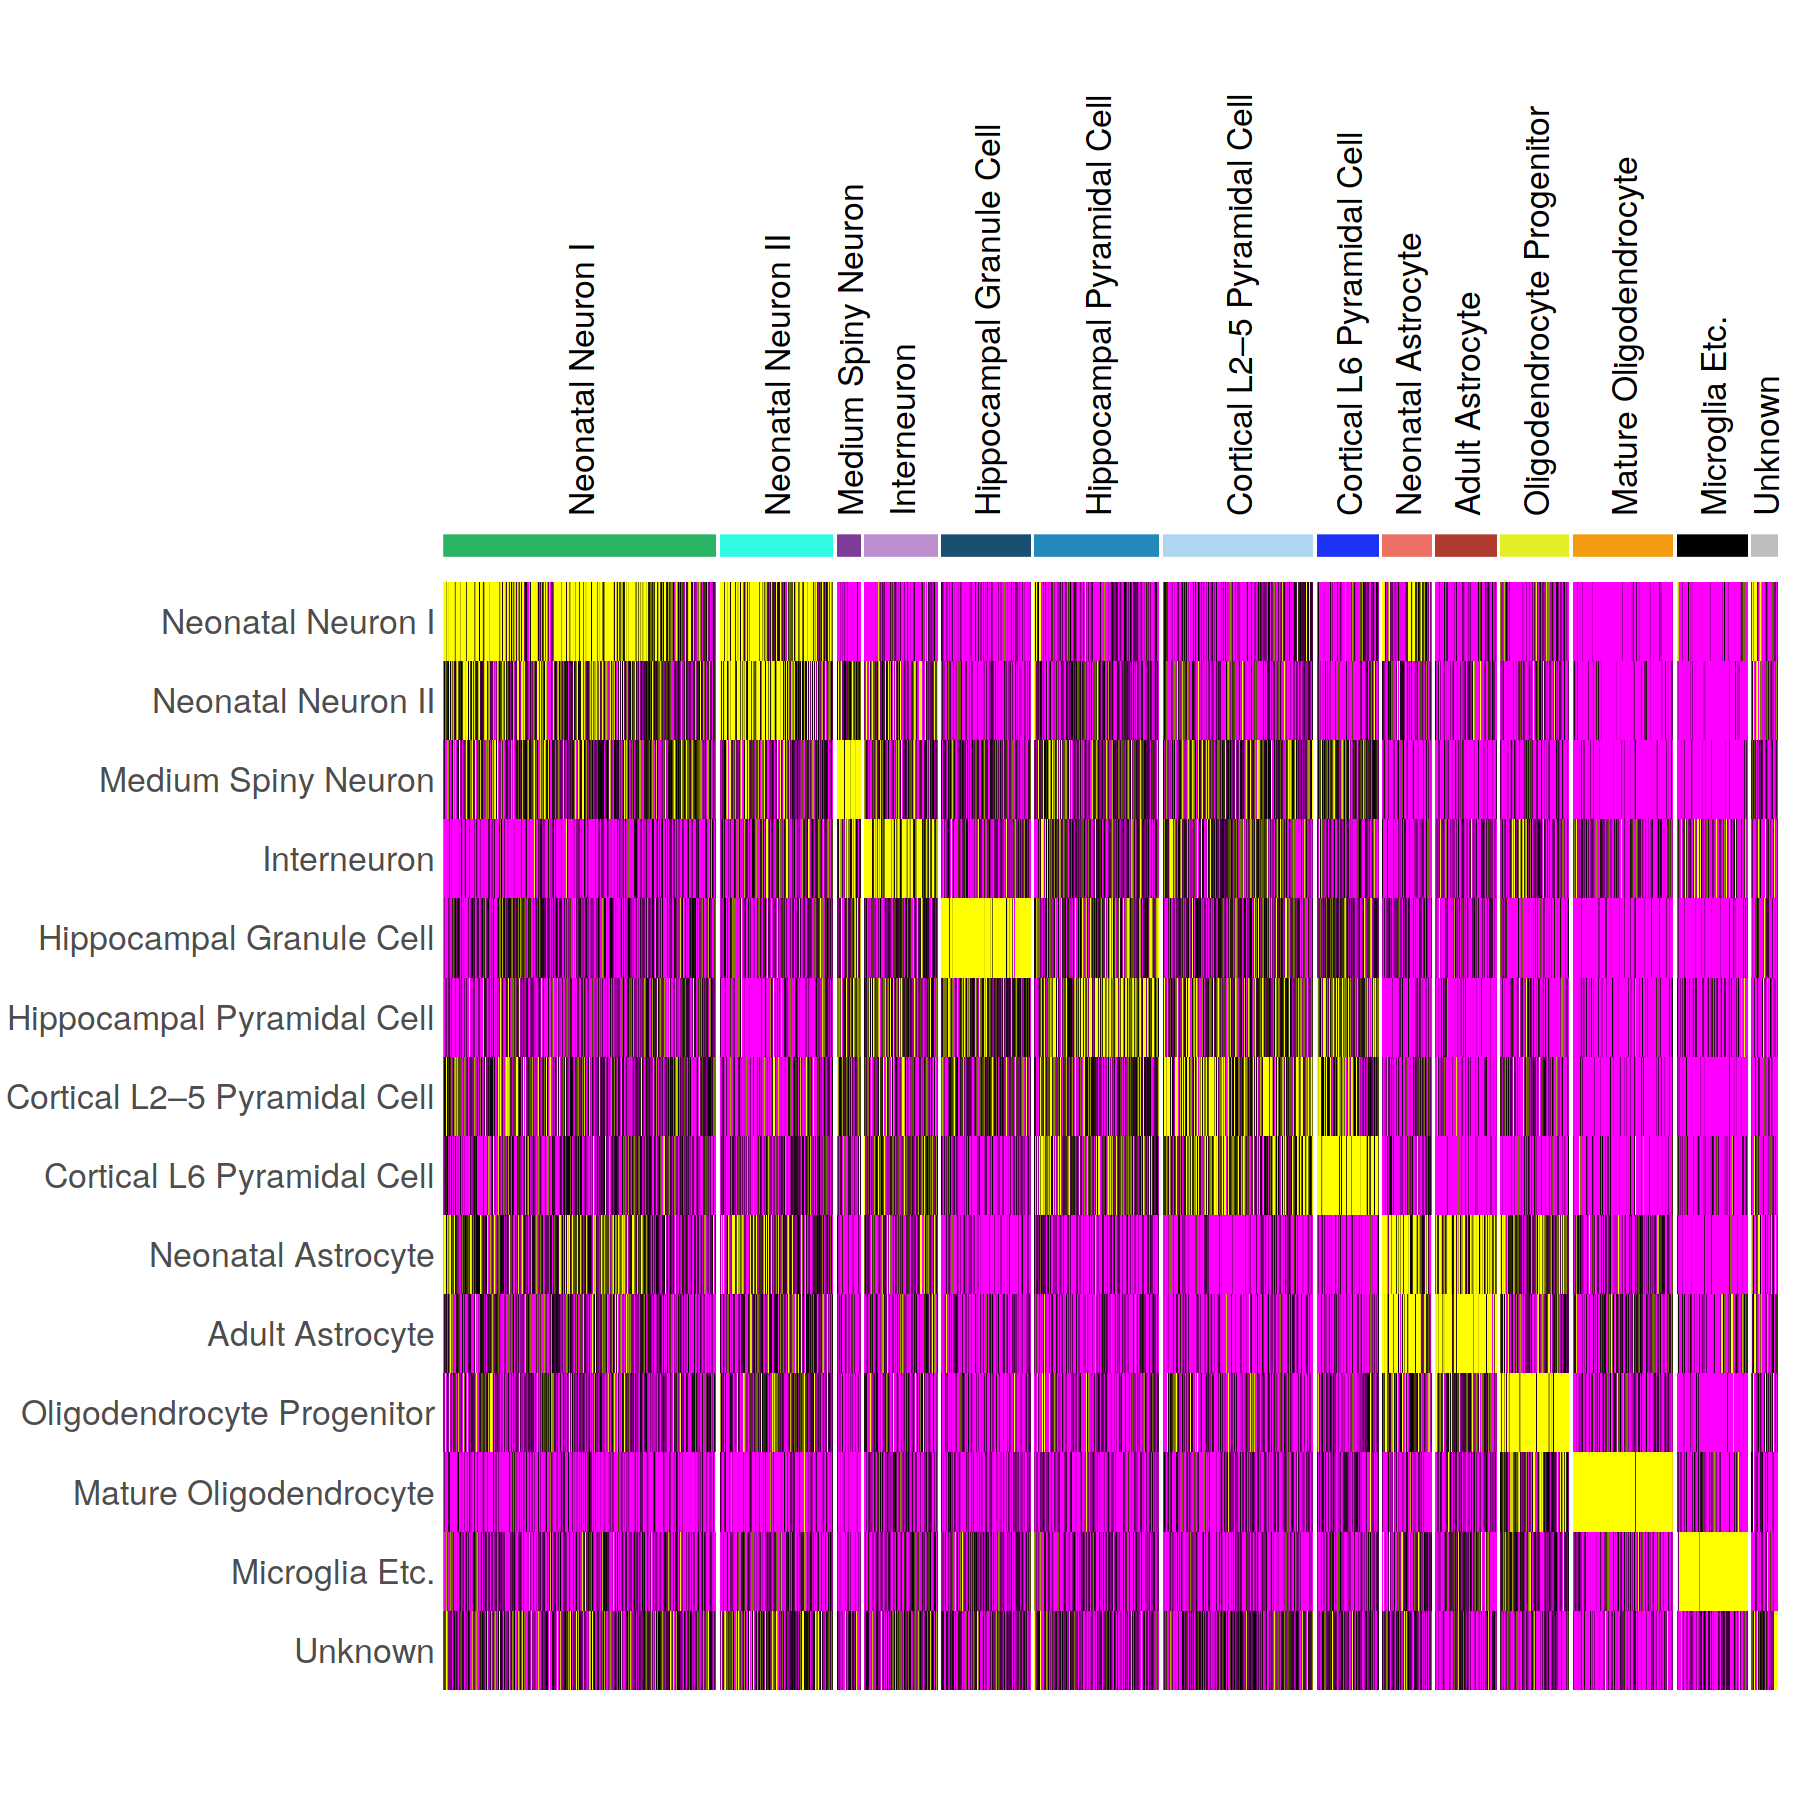

In [63]:
## new neonatal clusters
load(file = "/Tan2021/rdata_01272022/neonatal_heatmap_objs.RData")

cellTypeList= c("Sub Neonatal 1", "Sub Neonatal 2", 
                 "Medium Spiny Neuron", "Interneuron",
                 "Hippocampal Granule Cell", "Hippocampal Pyramidal Cell", 
                 "Cortical L2–5 Pyramidal Cell", "Cortical L6 Pyramidal Cell", 
                 "Neonatal Astrocyte", "Adult Astrocyte",
                 "Oligodendrocyte Progenitor", "Mature Oligodendrocyte", 
                 "Microglia Etc.", "Unknown") #
cellTypeRename = c("Neonatal Neuron I", "Neonatal Neuron II", 
                 "Medium Spiny Neuron", "Interneuron",
                 "Hippocampal Granule Cell", "Hippocampal Pyramidal Cell", 
                 "Cortical L2–5 Pyramidal Cell", "Cortical L6 Pyramidal Cell", 
                 "Neonatal Astrocyte", "Adult Astrocyte",
                 "Oligodendrocyte Progenitor", "Mature Oligodendrocyte", 
                 "Microglia Etc.", "Unknown") #

cellTypeColor = c("#28B463", "#2FFBE5", 
                              "#7D3C98", "#BB8FCE",
                              "#1B4F72", "#2488BA",
                              "#AED6F1", "#1C33F6", 
                              "#EC7063", "#B03A2E", 
                              "#E2EE27", "#F39C12", 
                              "#000000", "grey")

options(repr.plot.width=15, repr.plot.height=15)
Idents(seurat_rowmean_top10_heatmap_obj) = factor(Idents(seurat_rowmean_top10_heatmap_obj), levels = cellTypeList, labels = cellTypeRename)
p = DoHeatmap(seurat_rowmean_top10_heatmap_obj, features = cellTypeList, slot = "counts", label = TRUE, group.colors = cellTypeColor, angle = 90, size = 7) + NoLegend() + theme(axis.text.y = element_text(size = 20))
p$data$Feature = factor(p$data$Feature, levels = rev(cellTypeList), labels = rev(cellTypeRename))
newNeonatalGADhm1 = p
saveRDS(newNeonatalGADhm1, file = "/Tan2021/RDS/newNeonatalGADhm1.rds")
newNeonatalGADhm1

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


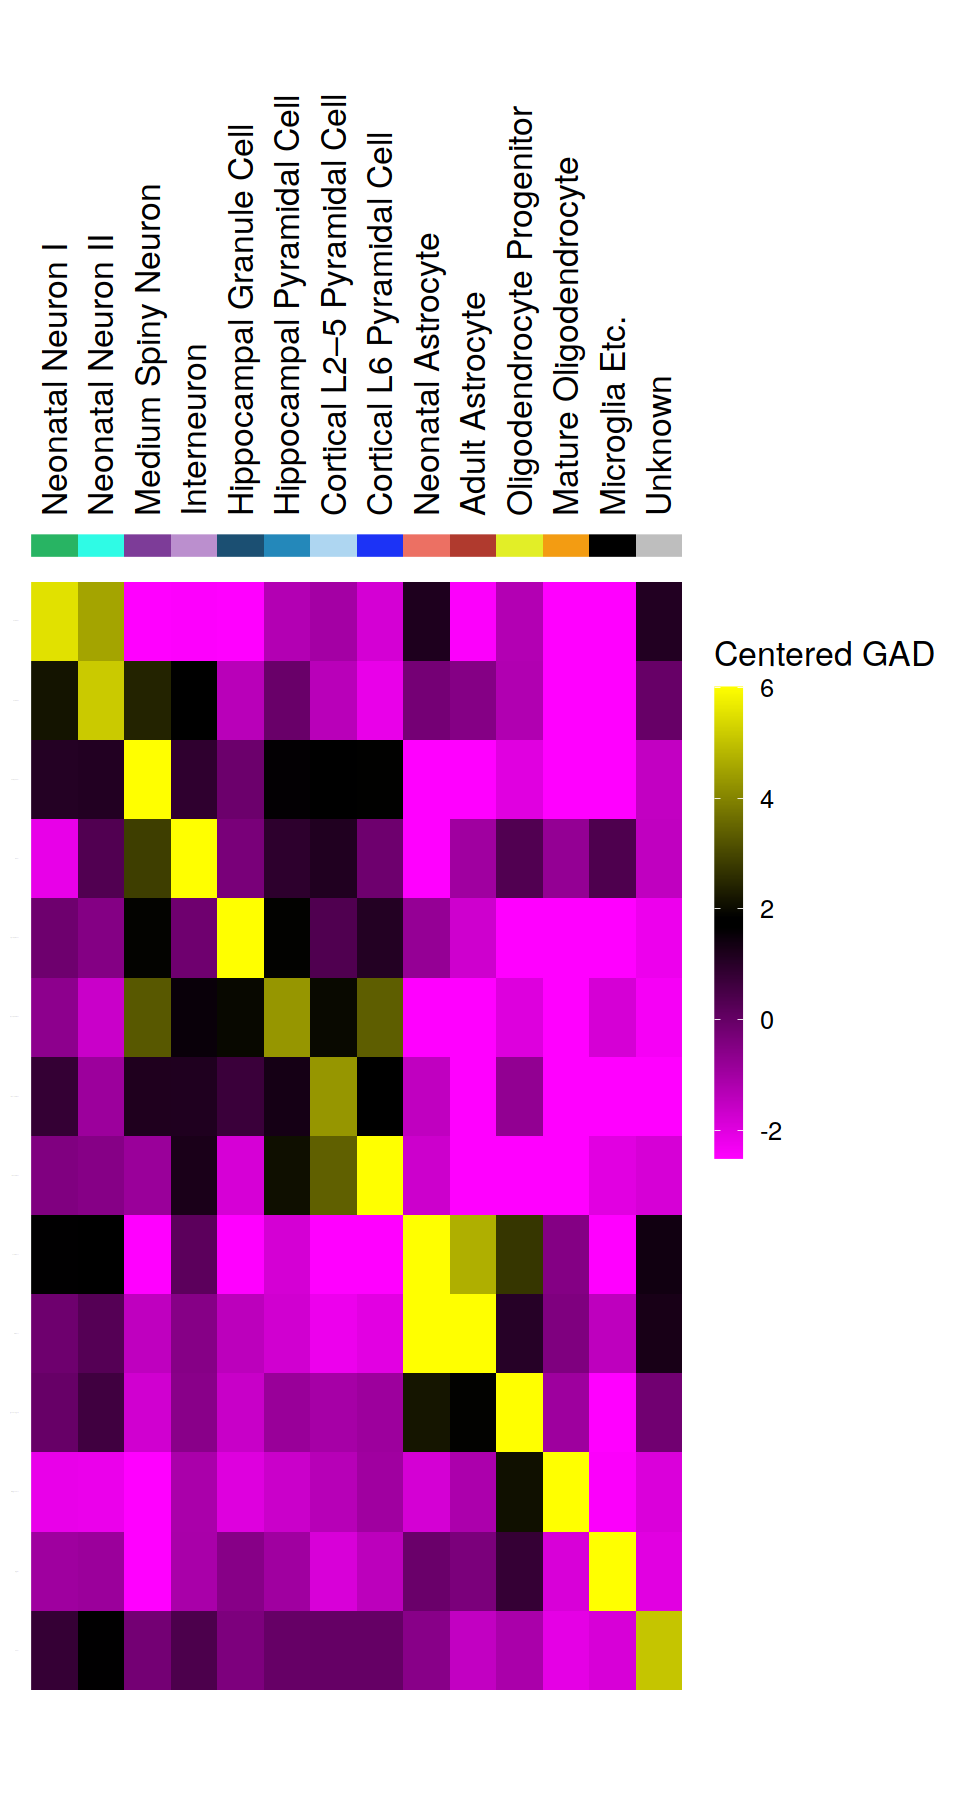

In [64]:
options(repr.plot.width=8, repr.plot.height=15)

load(file = "/Tan2021/rdata_01272022/neonatal_heatmap_objs.RData")

Idents(seurat_rowcolmean_top10_heatmap_obj) = factor(Idents(seurat_rowcolmean_top10_heatmap_obj), levels = cellTypeList, labels = cellTypeRename)
p = DoHeatmap(seurat_rowcolmean_top10_heatmap_obj, features = cellTypeList, slot = "counts", label = TRUE, group.colors = cellTypeColor, draw.lines = FALSE, size = 7, angle = 90) + 
    theme(axis.text.y = element_text(size = 0), legend.key.height = unit(2, "cm"), legend.text = element_text(size = 15), legend.title = element_text(size = 20)) + guides(colour = FALSE) + labs(fill = "Centered GAD")
p$data$Feature = factor(p$data$Feature, levels = rev(cellTypeList), labels = rev(cellTypeRename))
newNeonatalGADhm2 = p
saveRDS(newNeonatalGADhm2, file = "/Tan2021/RDS/newNeonatalGADhm2.rds")

newNeonatalGADhm2

In [65]:
pacman::p_load(ggfittext)

In [66]:
options(repr.plot.width=30, repr.plot.height=20)

In [67]:
targetGene_go_result = readRDS(file = "/Tan2021/RDS/newCluster1_GADgene_GO.rds")
GO_results_sig_genes[["Neonatal_Neuron_I"]] = targetGene_go_result %>% head(10)

targetGene_go_result = readRDS(file = "/Tan2021/RDS/newCluster2_GADgene_GO.rds")
GO_results_sig_genes[["Neonatal_Neuron_II"]] = targetGene_go_result %>% head(10)


In [68]:
GO_results_sig_genes %>% names
cellTypeNameList = c("Neonatal Neuron I", "Neonatal Neuron II", 
                 "Medium Spiny Neuron", "Interneuron",
                 "Hippocampal Granule Cell", "Hippocampal Pyramidal Cell", 
                 "Cortical L2-5 Pyramidal Cell", "Cortical L6 Pyramidal Cell", 
                 "Neonatal Astrocyte", "Adult Astrocyte",
                 "Oligodendrocyte Progenitor", "Mature Oligodendrocyte", 
                 "Microglia Etc.", "Unknown") #%>% gsub(" ", "_", .)
cellTypeNameList

[1] "Neonatal_Astrocyte"           "Neonatal_Neuron_1"           
 [3] "Neonatal_Neuron_2"            "Unknown"                     
 [5] "Oligodendrocyte_Progenitor"   "Microglia_Etc."              
 [7] "Hippocampal_Pyramidal_Cell"   "Cortical_L2-5_Pyramidal_Cell"
 [9] "Mature_Oligodendrocyte"       "Adult_Astrocyte"             
[11] "Interneuron"                  "Cortical_L6_Pyramidal_Cell"  
[13] "Medium_Spiny_Neuron"          "Hippocampal_Granule_Cell"    
[15] "Neonatal_Neuron_I"            "Neonatal_Neuron_II"

[1] "Neonatal Neuron I"            "Neonatal Neuron II"          
 [3] "Medium Spiny Neuron"          "Interneuron"                 
 [5] "Hippocampal Granule Cell"     "Hippocampal Pyramidal Cell"  
 [7] "Cortical L2-5 Pyramidal Cell" "Cortical L6 Pyramidal Cell"  
 [9] "Neonatal Astrocyte"           "Adult Astrocyte"             
[11] "Oligodendrocyte Progenitor"   "Mature Oligodendrocyte"      
[13] "Microglia Etc."               "Unknown"

In [69]:

GO_results_sig_genes[["Cortical_L2-5_Pyramidal_Cell"]]

category   over_represented_pvalue under_represented_pvalue numDEInCat
6641  GO:0045202 1.548483e-08            1.0000000                78        
6116  GO:0043005 4.409656e-08            1.0000000                76        
9874  GO:0097060 1.258477e-07            1.0000000                41        
1208  GO:0005216 1.795322e-07            1.0000000                32        
2971  GO:0015267 2.771204e-07            0.9999999                32        
3879  GO:0022803 2.771204e-07            0.9999999                32        
10125 GO:0098793 3.318377e-07            0.9999999                40        
5743  GO:0036477 3.845071e-07            1.0000000                55        
3887  GO:0022836 4.029922e-07            0.9999999                27        
3900  GO:0022890 4.073548e-07            0.9999999                32        
      numInCat term                                                ontology
6641  414      synapse                                             CC      
6116  408      neuron projection                                   CC      
9874  167      synaptic membrane                                   CC      
1208  115      ion channel activity                                MF      
2971  117      channel activity                                    MF      
3879  117      passive transmembrane transporter activity          MF      
10125 167      presynapse                                          CC      
5743  273      somatodendritic compartment                         CC      
3887   90      gated channel activity                              MF      
3900  119      inorganic cation transmembrane transporter activity MF

In [77]:
goPlot = vector("list", length(GO_results_sig_genes))
for(i in 1:length(cellTypeNameList)){
    cT = cellTypeNameList[i] %>% gsub(" ", "_", .)
    goPlot[[i]] =GO_results_sig_genes[[cT]] %>% ggplot(aes(x = reorder(term, -over_represented_pvalue), y = -log10(over_represented_pvalue), label = reorder(term, -over_represented_pvalue))) +
    geom_col(position = "dodge") +
geom_bar_text(position = "dodge", place = "left", reflow = TRUE, grow = FALSE) +
coord_flip() +
xlab("") +
ylab("-log10(p value)") +
theme_bw(base_size = 20) +
theme(axis.text.y = element_blank(), axis.ticks.y = element_blank()) +
guides(size = FALSE) +
ggtitle(cellTypeNameList[i])


}

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = F

In [71]:
pdf("/Figures/GAD_markergene_GO.pdf", width = 30, height = 20)
ggarrange(goPlot[[1]], goPlot[[2]], goPlot[[3]], goPlot[[4]], goPlot[[5]], goPlot[[6]], goPlot[[7]], goPlot[[8]], goPlot[[9]], goPlot[[10]], goPlot[[11]], goPlot[[12]], goPlot[[13]], goPlot[[14]])
dev.off()

png 
  2

In [80]:
GO_results_sig_genes

$Neonatal_Astrocyte
       category over_represented_pvalue under_represented_pvalue numDEInCat
9830 GO:0090596            5.586685e-07                0.9999999         20
2468 GO:0009887            1.426863e-06                0.9999995         40
2003 GO:0007423            2.147043e-06                0.9999994         28
885  GO:0003700            2.480188e-06                0.9999993         27
7341 GO:0048598            4.425812e-06                0.9999987         25
6365 GO:0043583            5.033514e-06                0.9999990         16
7441 GO:0048839            5.495078e-06                0.9999990         15
7302 GO:0048513            6.743883e-06                0.9999968         75
6623 GO:0045165            1.018143e-05                0.9999983         13
2472 GO:0009891            1.422509e-05                0.9999942         42
     numInCat                                        term ontology
9830       75                 sensory organ morphogenesis       BP
2468      240                  animal organ morphogenesis       BP
2003      141                   sensory organ development       BP
885       134   DNA-binding transcription factor activity       MF
7341      122                     embryonic morphogenesis       BP
6365       58                             ear development       BP
7441       52                       inner ear development       BP
7302      613                    animal organ development       BP
6623       42                        cell fate commitment       BP
2472      281 positive regulation of biosynthetic process       BP

$Neonatal_Neuron_1
        category over_represented_pvalue under_represented_pvalue numDEInCat
885   GO:0003700            0.0008823588                0.9996021         31
4052  GO:0030286            0.0009593849                0.9998544          8
312   GO:0001759            0.0013609149                0.9999601          4
10464 GO:0110110            0.0014031677                0.9998529          6
10109 GO:0098742            0.0020738428                0.9991896         20
941   GO:0004017            0.0021509726                1.0000000          3
8384  GO:0060510            0.0021670670                1.0000000          3
8528  GO:0060911            0.0023801653                1.0000000          3
10540 GO:0140110            0.0024704657                0.9986744         41
6869  GO:0045945            0.0024705942                1.0000000          3
      numInCat                                                       term
885        134                  DNA-binding transcription factor activity
4052        17                                             dynein complex
312          5                                            organ induction
10464       11          positive regulation of animal organ morphogenesis
10109       77  cell-cell adhesion via plasma-membrane adhesion molecules
941          3                                  adenylate kinase activity
8384         3                         type II pneumocyte differentiation
8528         3                               cardiac cell fate commitment
10540      203                           transcription regulator activity
6869         3 positive regulation of transcription by RNA polymerase III
      ontology
885         MF
4052        CC
312         BP
10464       BP
10109       BP
941         MF
8384        BP
8528        BP
10540       MF
6869        BP

$Neonatal_Neuron_2
       category over_represented_pvalue under_represented_pvalue numDEInCat
3851 GO:0022038             0.002333467                0.9999473          3
2700 GO:0010770             0.006428900                0.9979204         11
3137 GO:0016209             0.006434775                1.0000000          2
8136 GO:0060024             0.006687062                1.0000000          2
5845 GO:0040034             0.007428887                1.0000000          2
7299 GO:0048505             0.007428887                1.0000000          2
2951 GO:0

In [82]:
pacman::p_load(GeneOverlap)
pacman::p_load(VennDiagram)

In [83]:
# Overlap between tan2021 and our marker genes.
load(file = "/Tan2021/rdata_01272022/detected_markergenes_control.RData")
load("/Tan2021/Tan2021_results.RData")
load(file = "/Tan2021/RNA_SeuratObj.RData")

In [84]:
options(repr.plot.width=12, repr.plot.height=12)

In [85]:
cellTypeList = c("Neonatal Neuron 1", "Neonatal Neuron 2", 
                 "Medium Spiny Neuron", "Interneuron",
                 "Hippocampal Granule Cell", "Hippocampal Pyramidal Cell", 
                 "Cortical L2–5 Pyramidal Cell", "Cortical L6 Pyramidal Cell", 
                 "Neonatal Astrocyte", "Adult Astrocyte",
                 "Oligodendrocyte Progenitor", "Mature Oligodendrocyte", 
                 "Microglia Etc.") #, "Unknown"

cellTypeNameList = gsub(" ", "_", cellTypeList)
cellTypeNameList[7] = names(gene_lists)[2]

In [86]:
names(gene_lists)[2] == cellTypeNameList[7]

[1] TRUE

In [87]:
names(gene_lists) %>% unique

[1] "Adult_Astrocyte"              "Cortical_L2-5_Pyramidal_Cell"
 [3] "Cortical_L6_Pyramidal_Cell"   "Hippocampal_Granule_Cell"    
 [5] "Hippocampal_Pyramidal_Cell"   "Interneuron"                 
 [7] "Mature_Oligodendrocyte"       "Medium_Spiny_Neuron"         
 [9] "Microglia_Etc."               "Neonatal_Astrocyte"          
[11] "Neonatal_Neuron_1"            "Neonatal_Neuron_2"           
[13] "Neuron"                       "Oligodendrocyte_Progenitor"

In [18]:
cellTypeNameList %>% length

[1] 13

In [74]:
tan = gene_lists[[cellTypeNameList[i]]]
markers = rownames(pbmc.markers)[pbmc.markers$cluster == cellTypeList[i]]
tan %>% length
markers %>% length

[1] 52

[1] 33

In [88]:
options(repr.plot.width=17, repr.plot.height=10)
i = 12
cellTypeNameList[i]
tan = gene_lists[[cellTypeNameList[i]]]
markers = rownames(pbmc.markers)[pbmc.markers$cluster == cellTypeList[i]]
input = list(tan, markers)

go.obj = newGeneOverlap(tan, markers, genome.size = 2483)
go.obj = testGeneOverlap(go.obj)
pval = formatC(go.obj@pval, format = "e", digits = 2)
    grid.newpage()

vennObj = venn.diagram(x = input, filename = NULL, imagetype = "svg", cex = 4, cat.cex = 2.5, cat.pos = c(0.1, 0.1), cat.default.pos = "outer", fill = c("#E69F00", "#1F618D"), 
                       category.names = c("MALBAC-DT Marker Gene", "scGAD Marker Gene"), scaled = TRUE, rotation.degree = 0, 
                       sub = paste(cellTypeList[i], "(p value: ", pval, ")"), sub.cex =4, sub.pos = c(0.5, 1), force.unique = TRUE, height = 4000, width = 6500)

grid.draw(vennObj)


[1] "Mature_Oligodendrocyte"

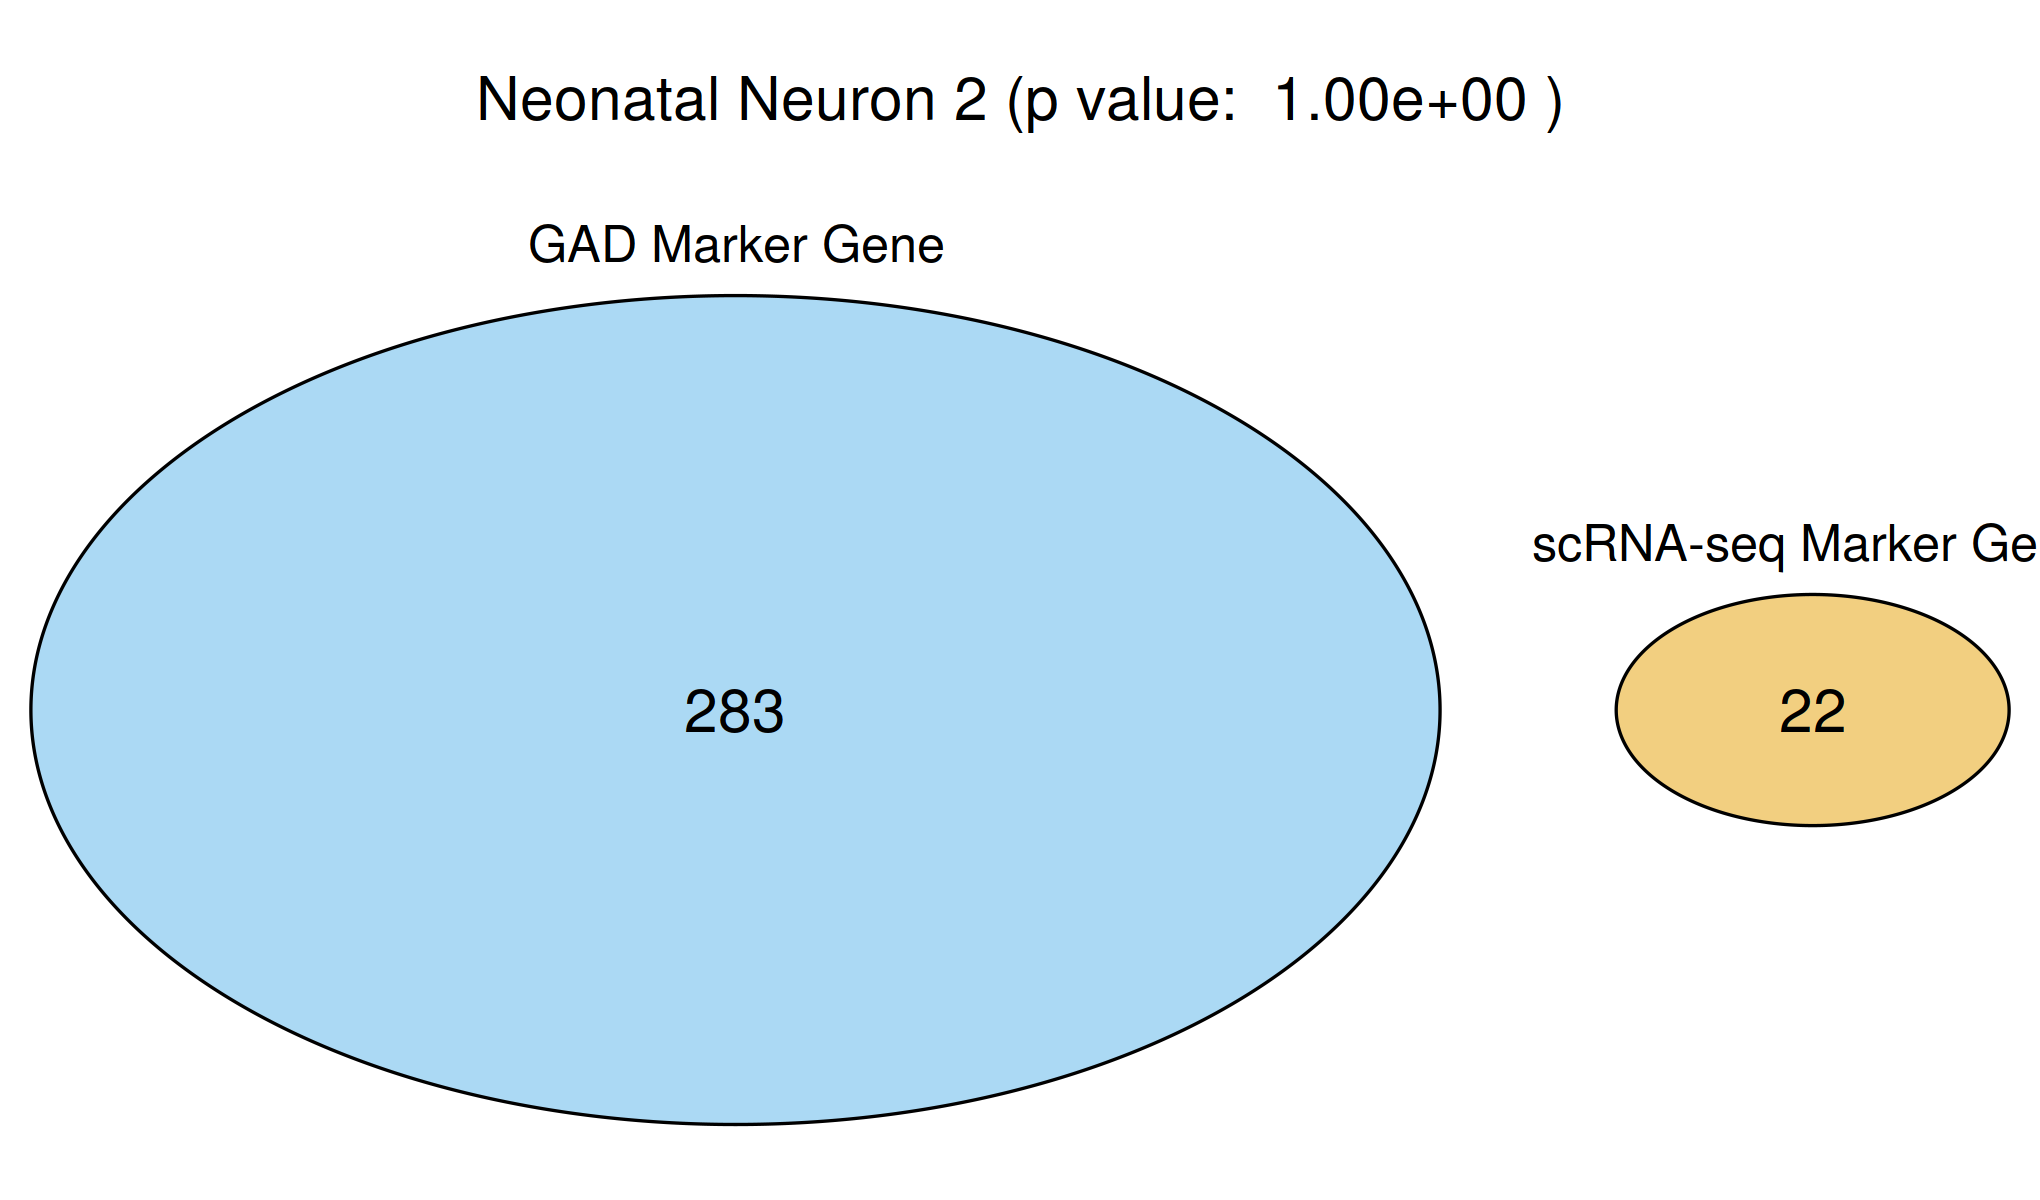

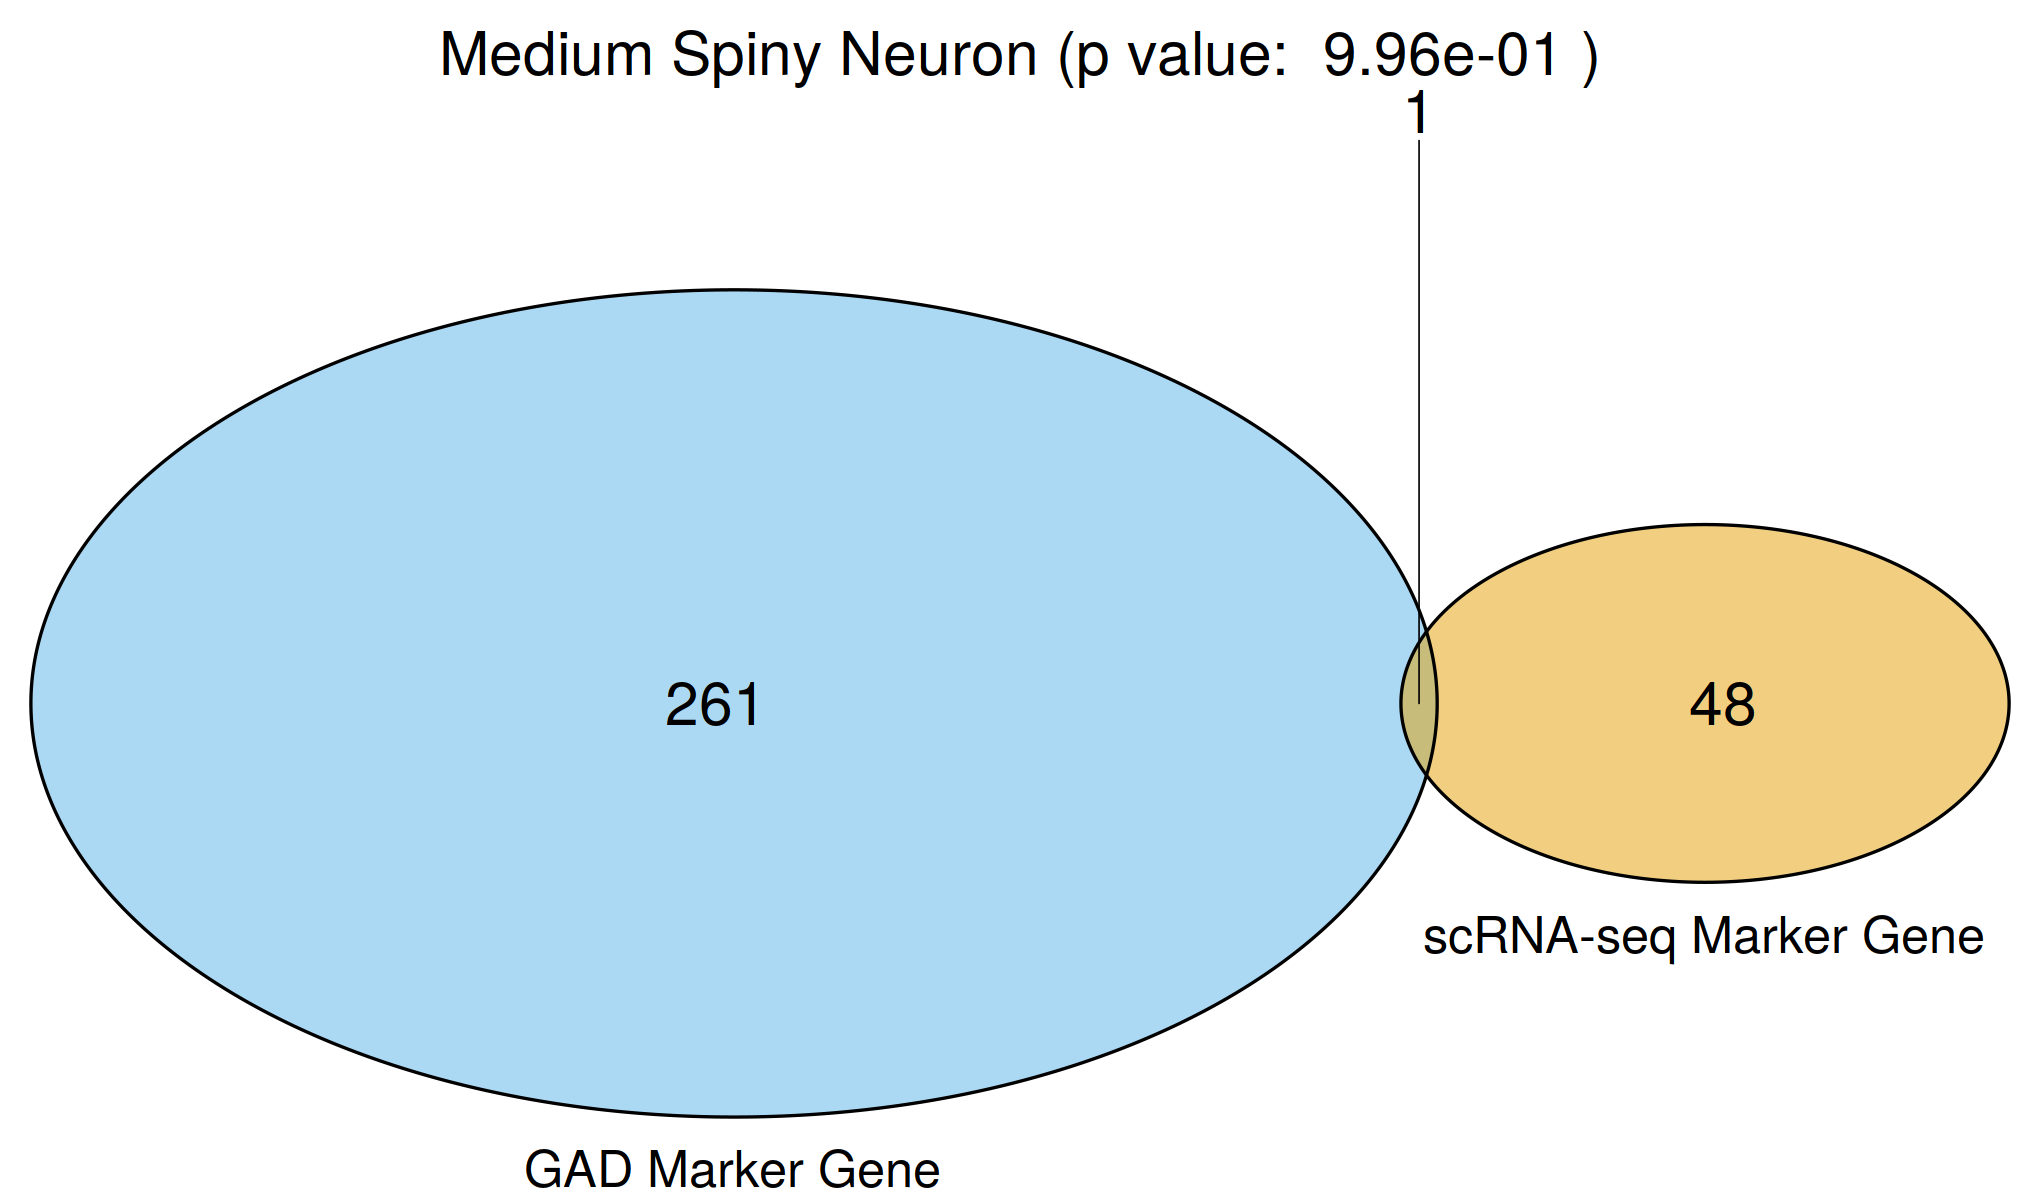

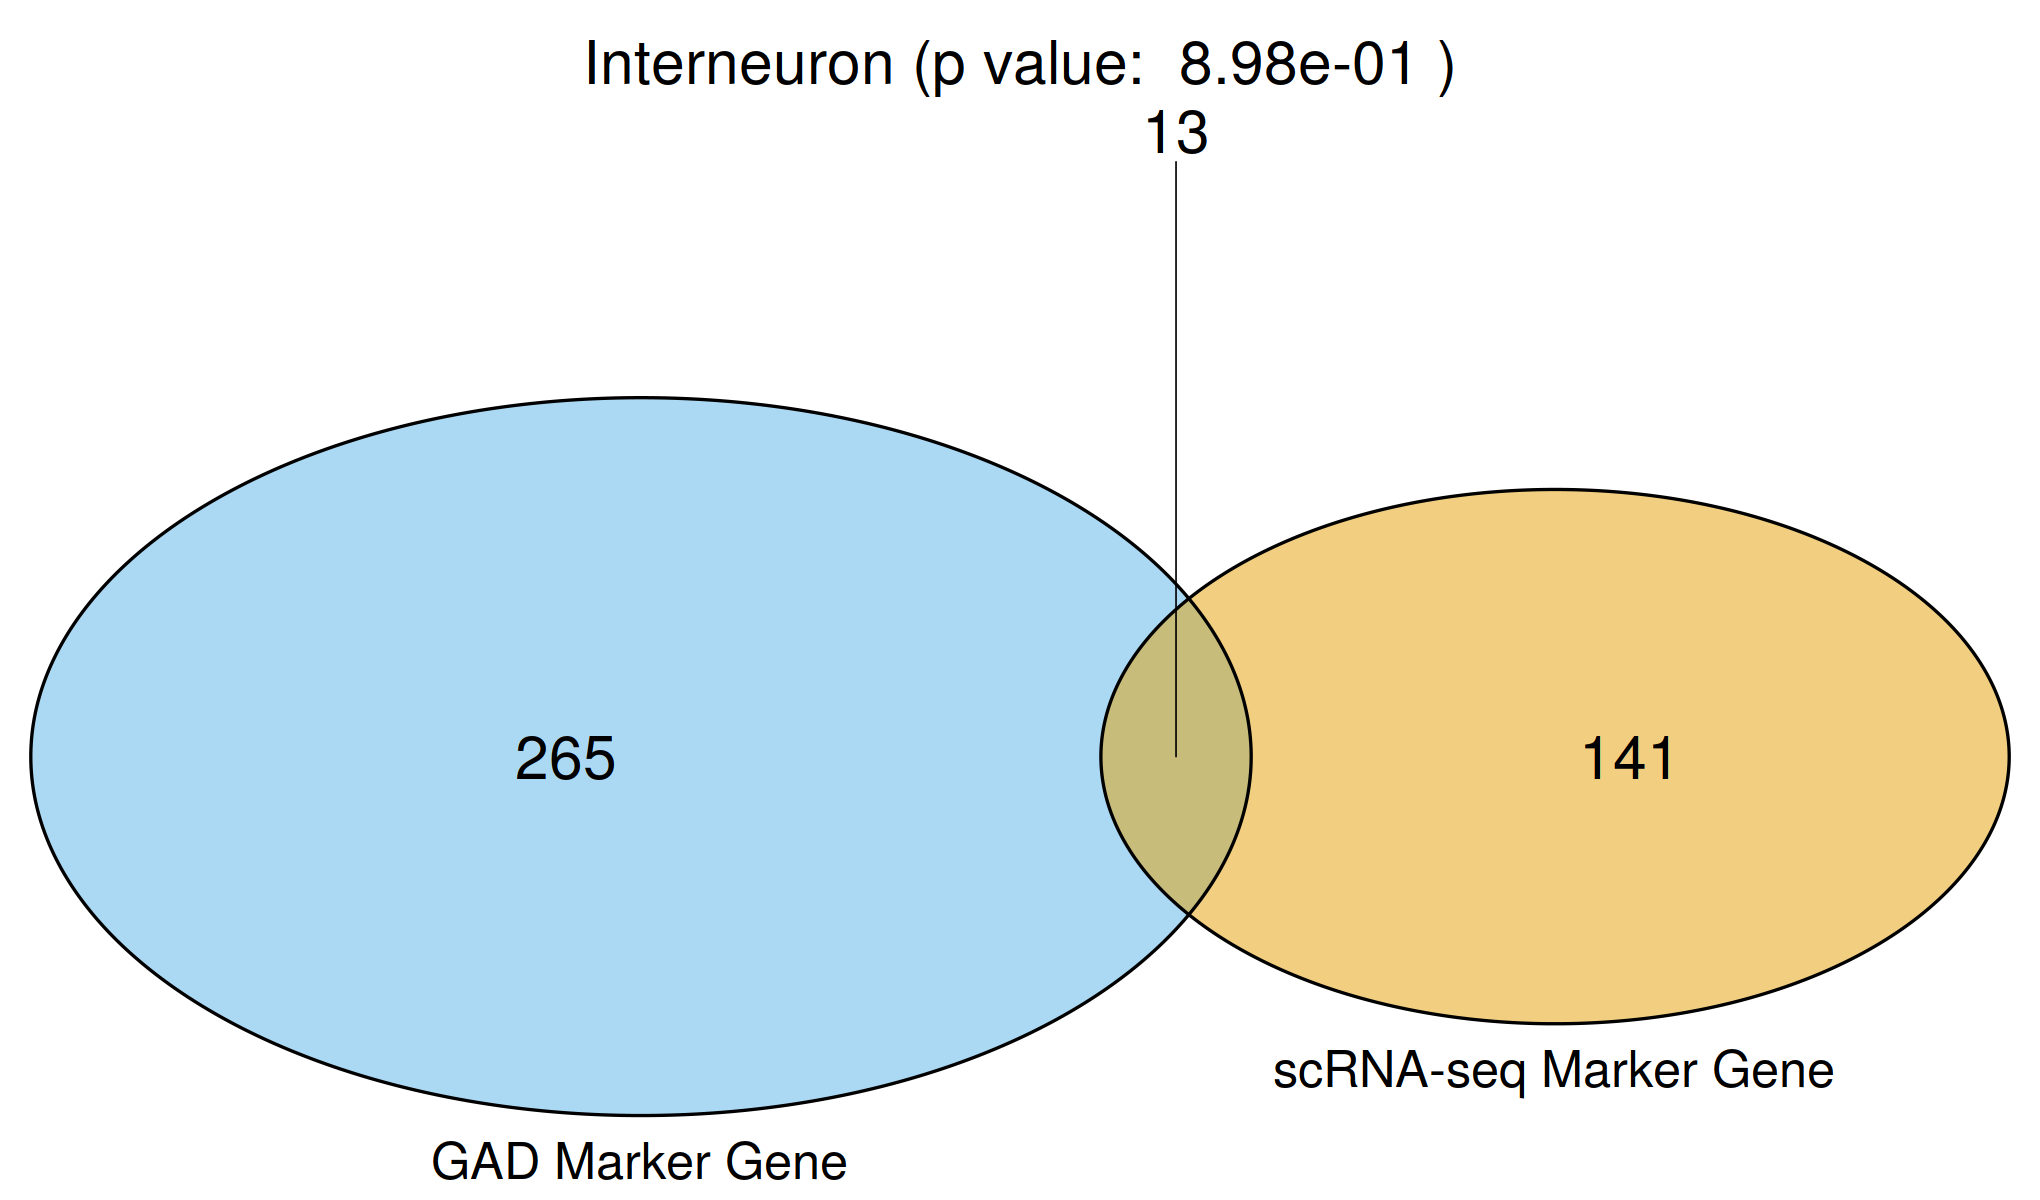

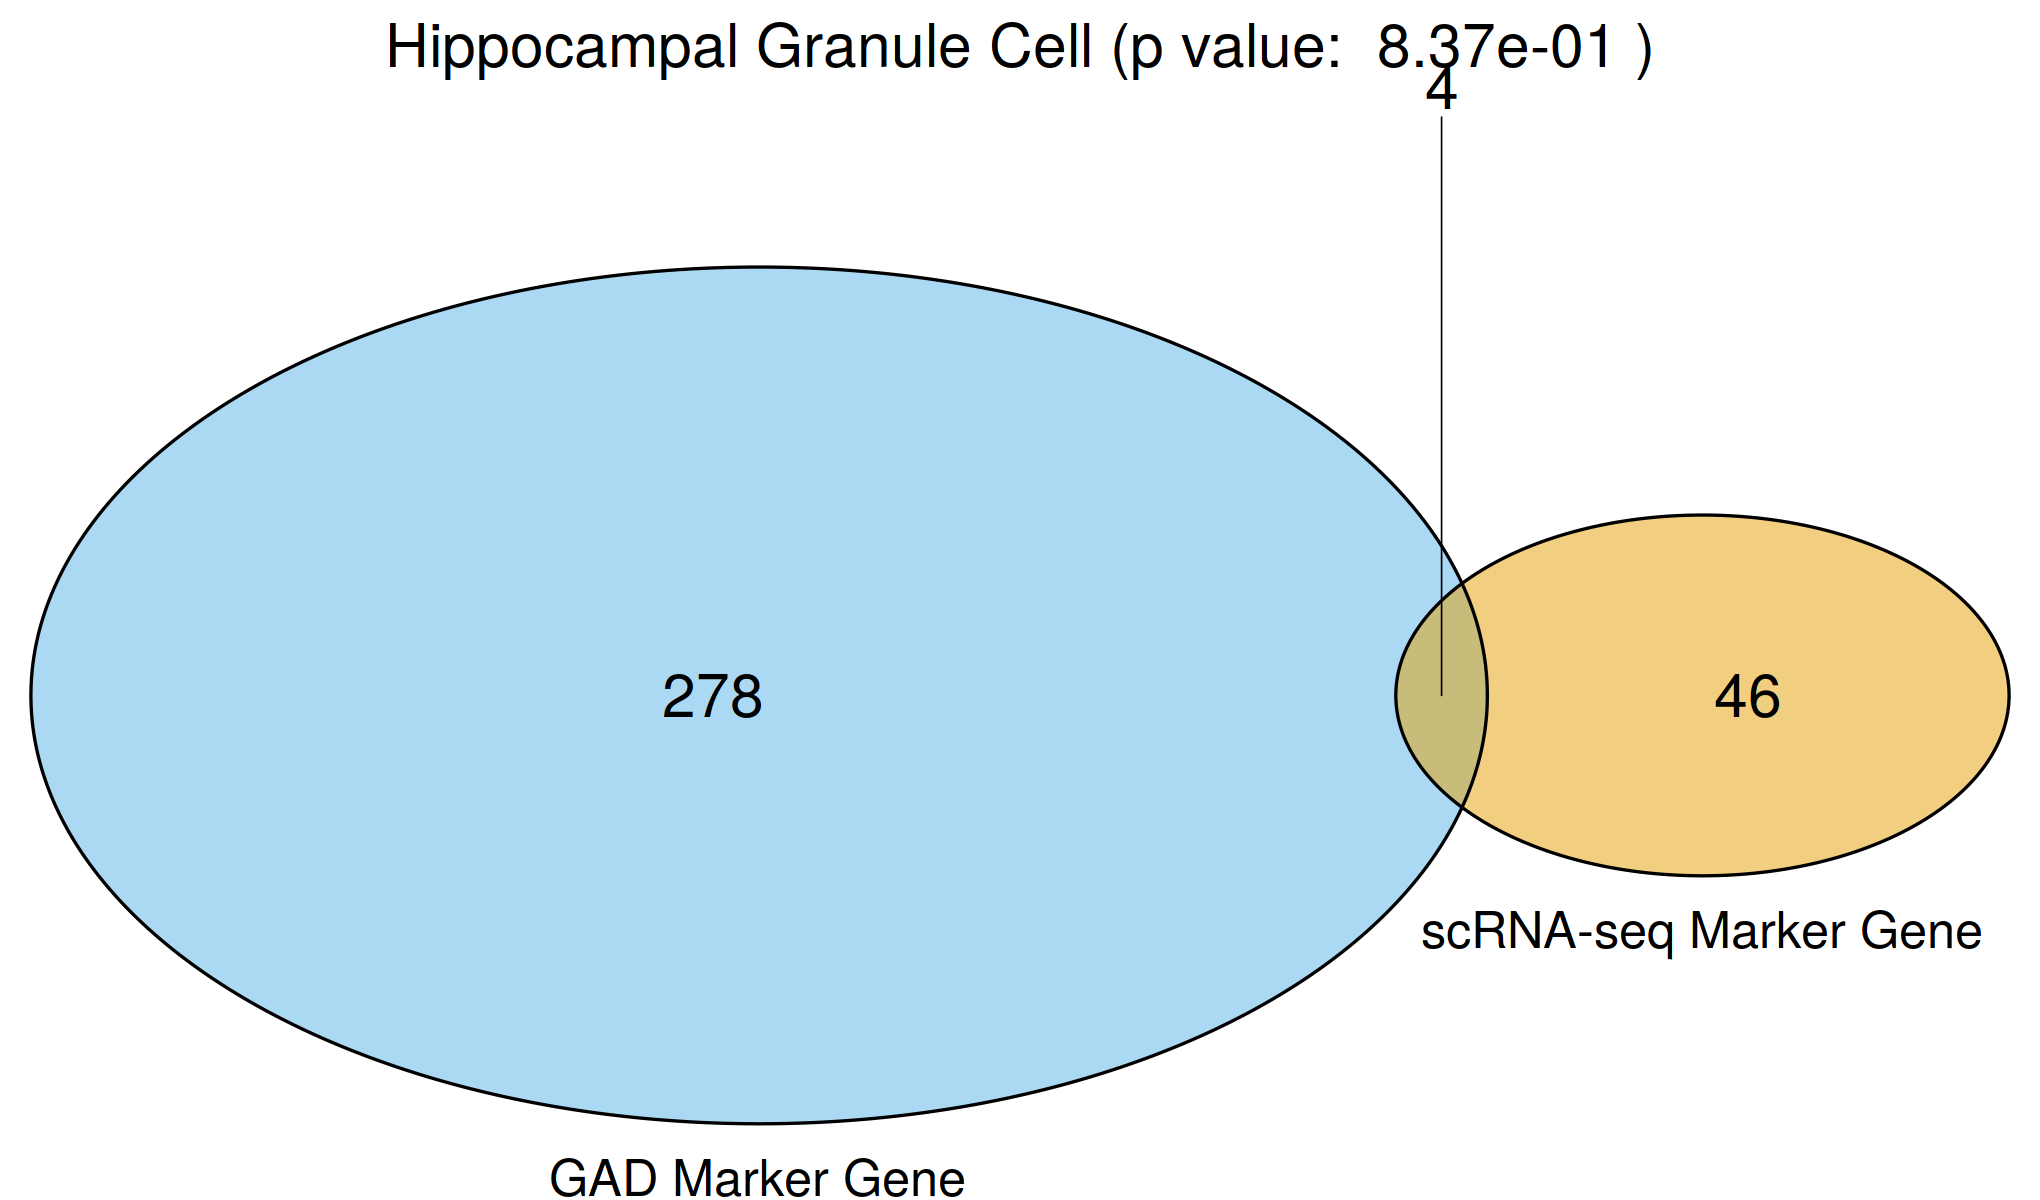

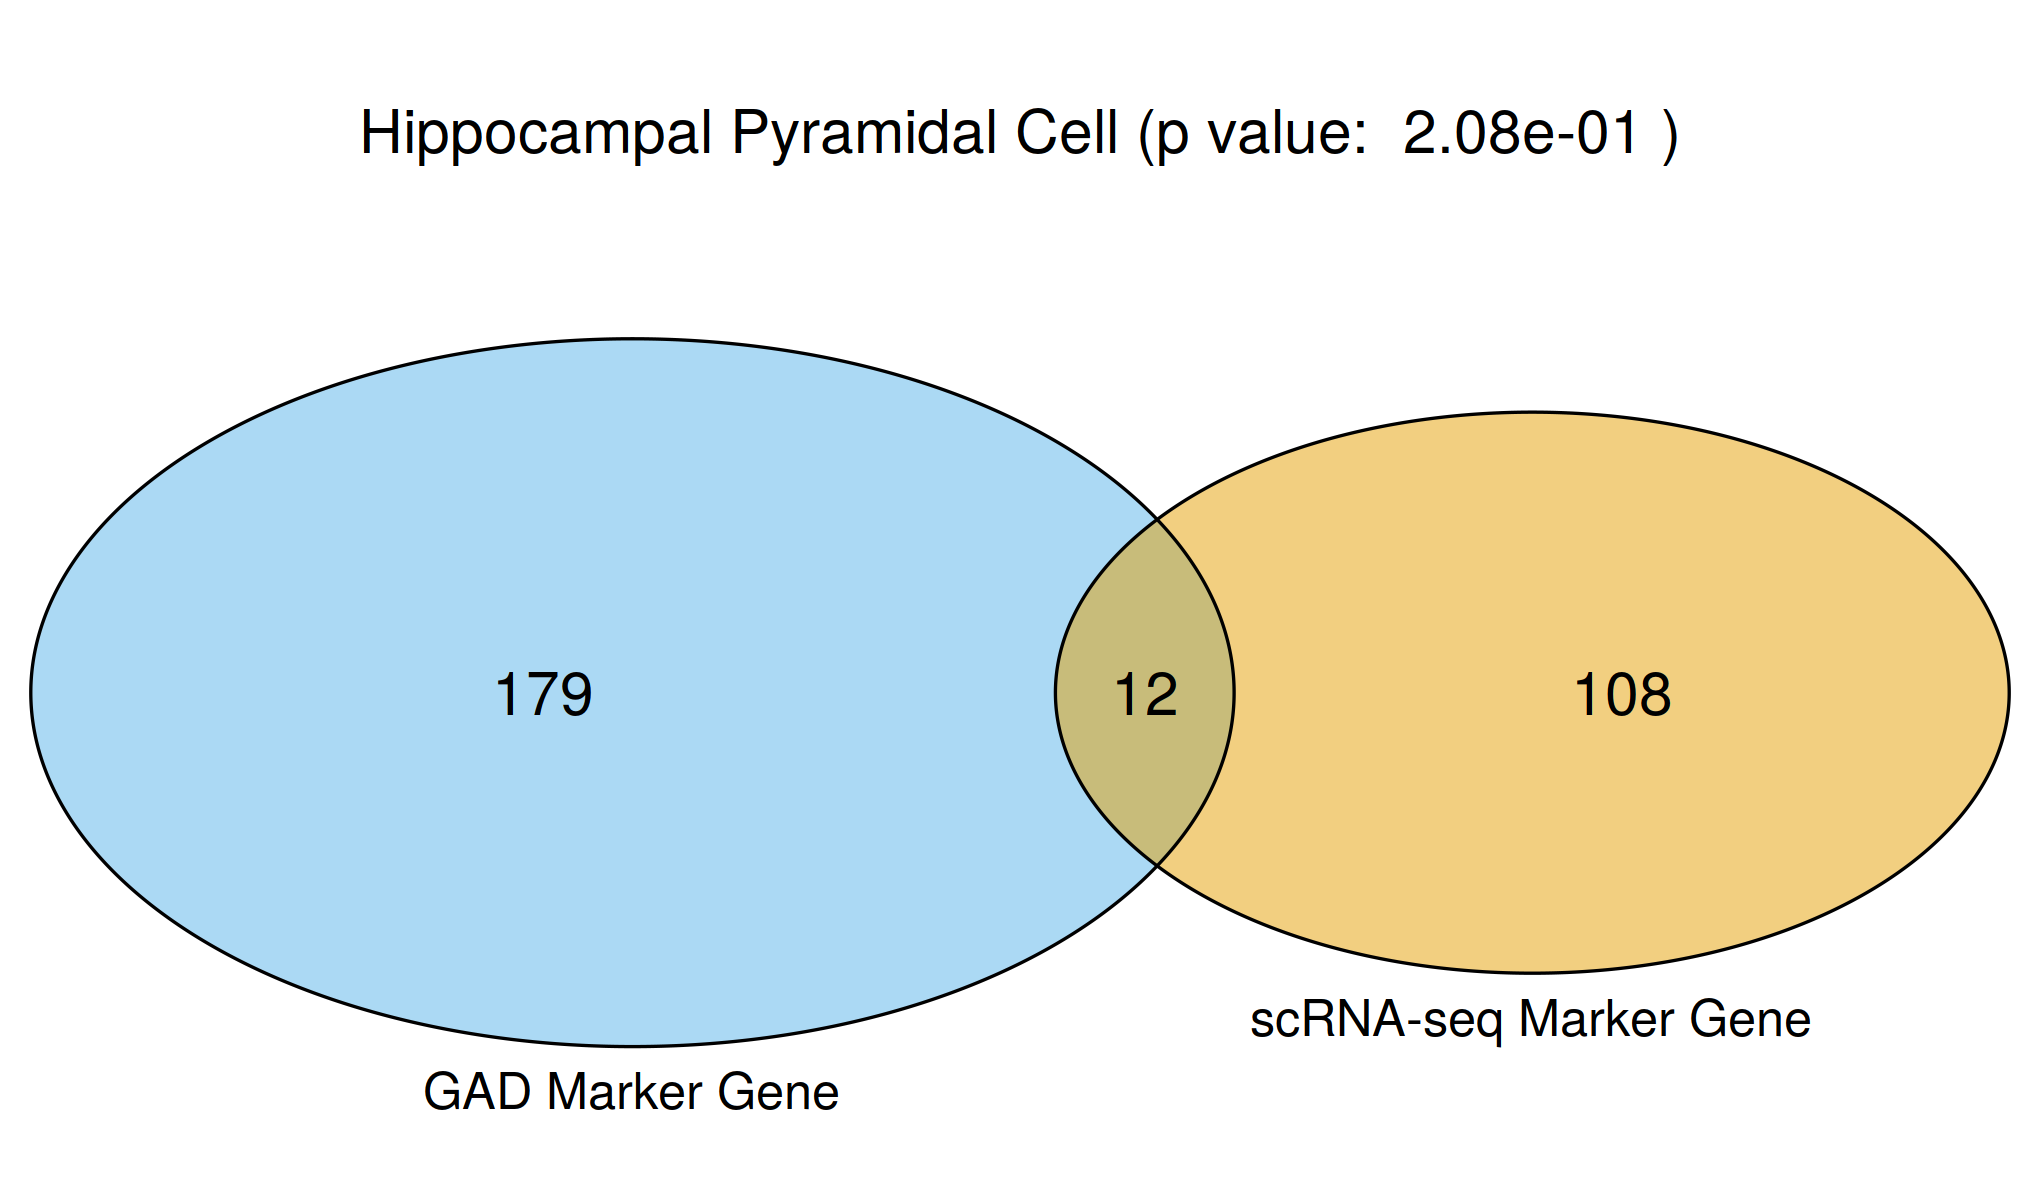

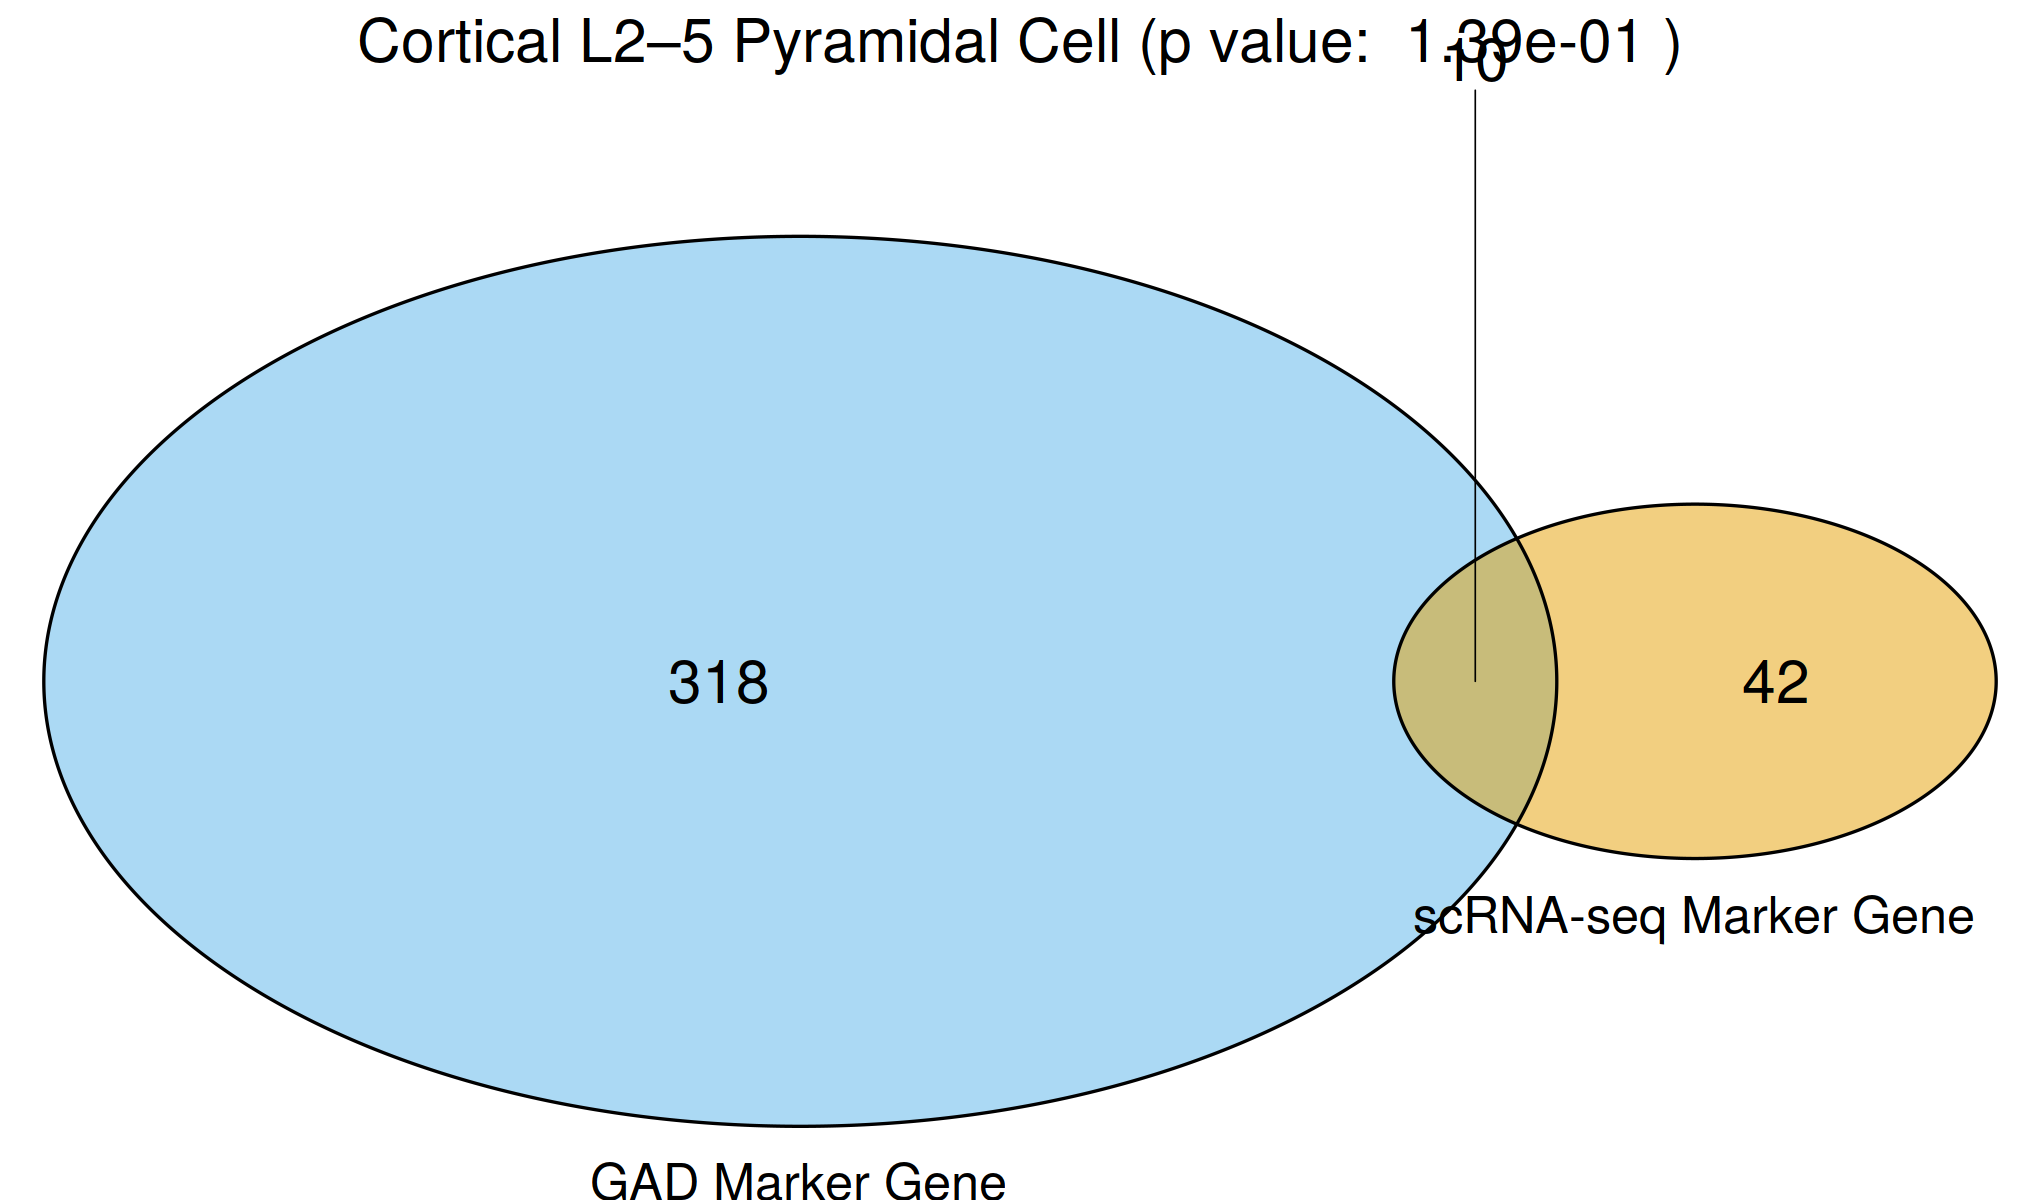

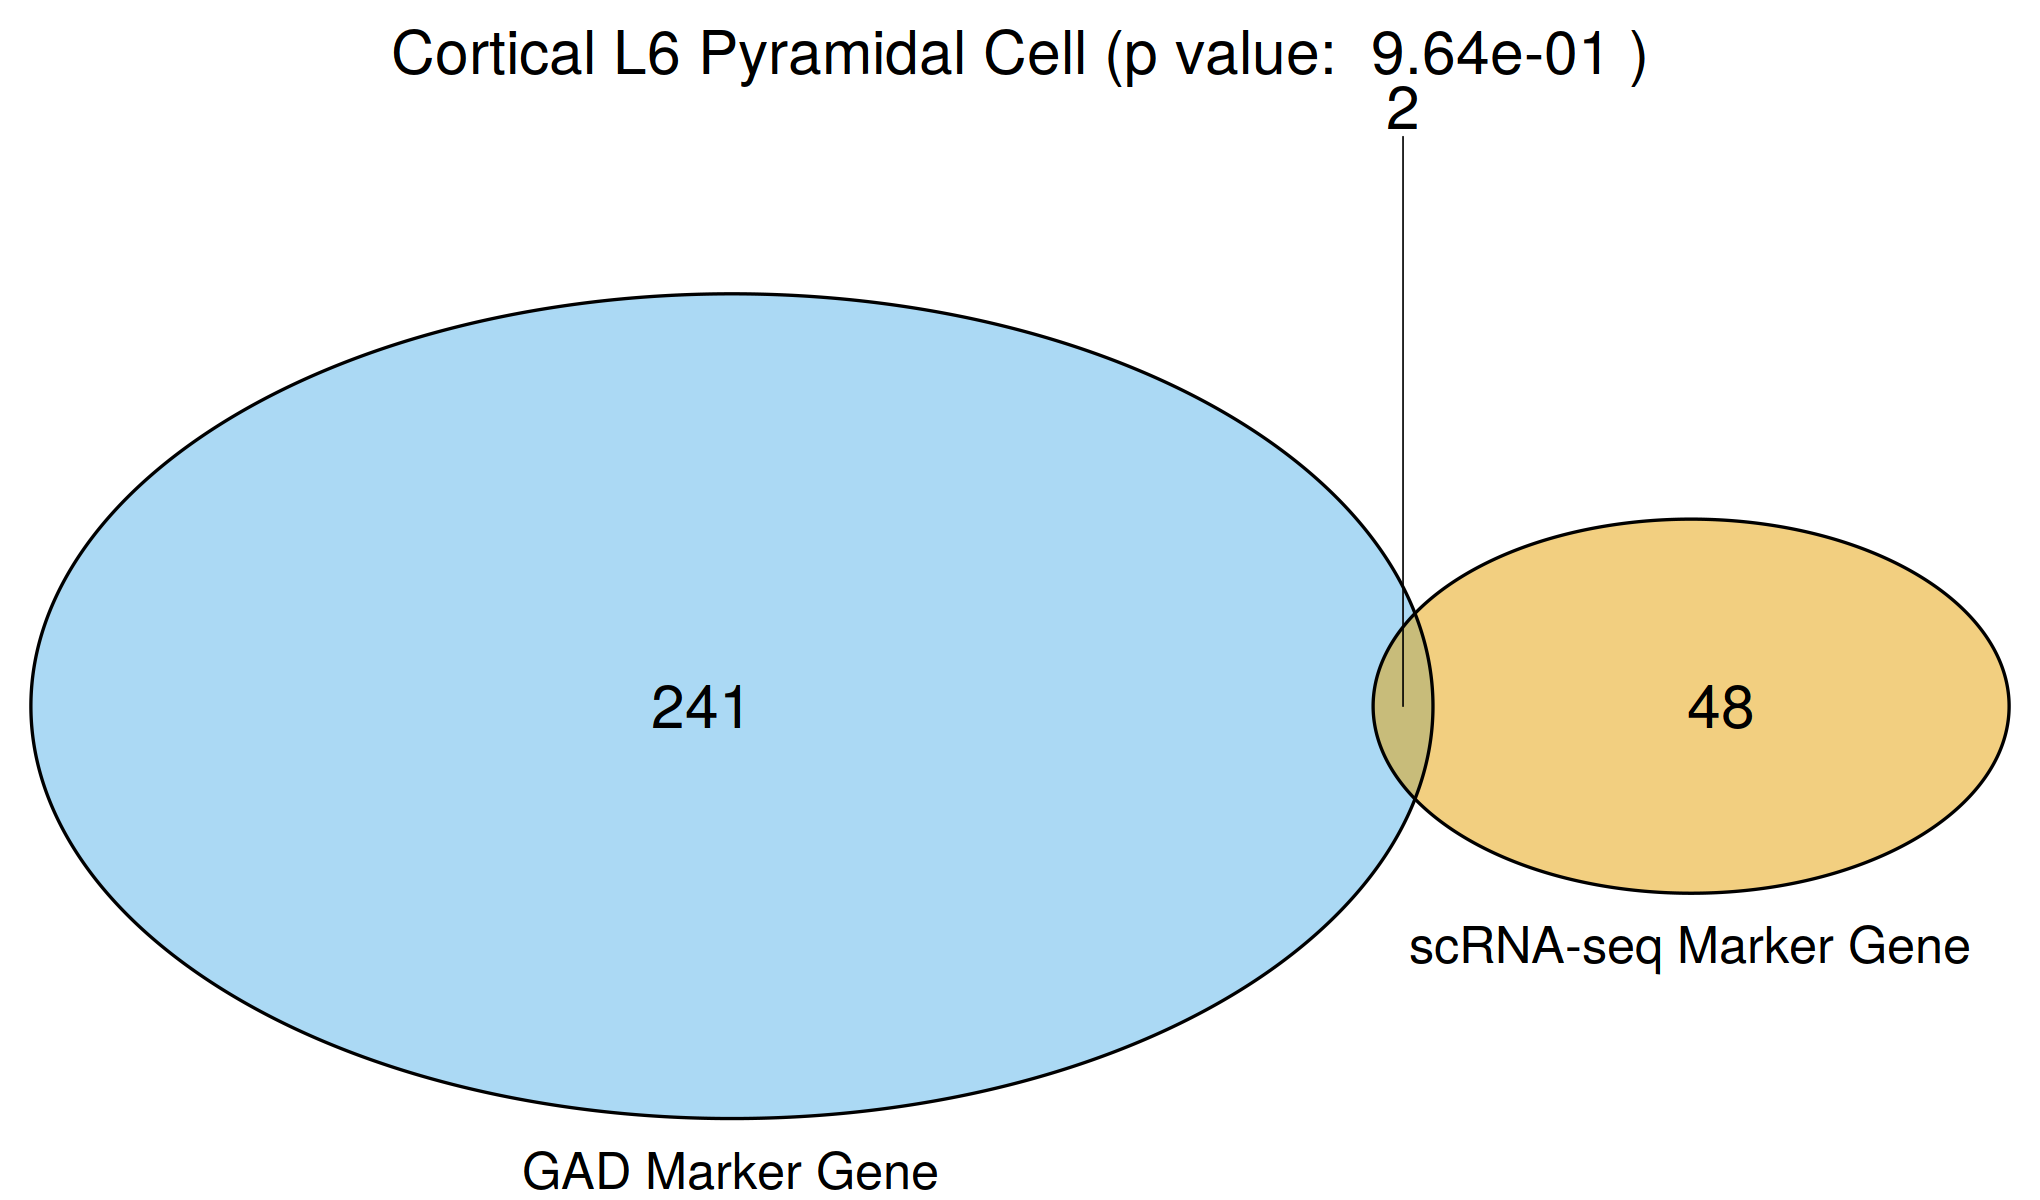

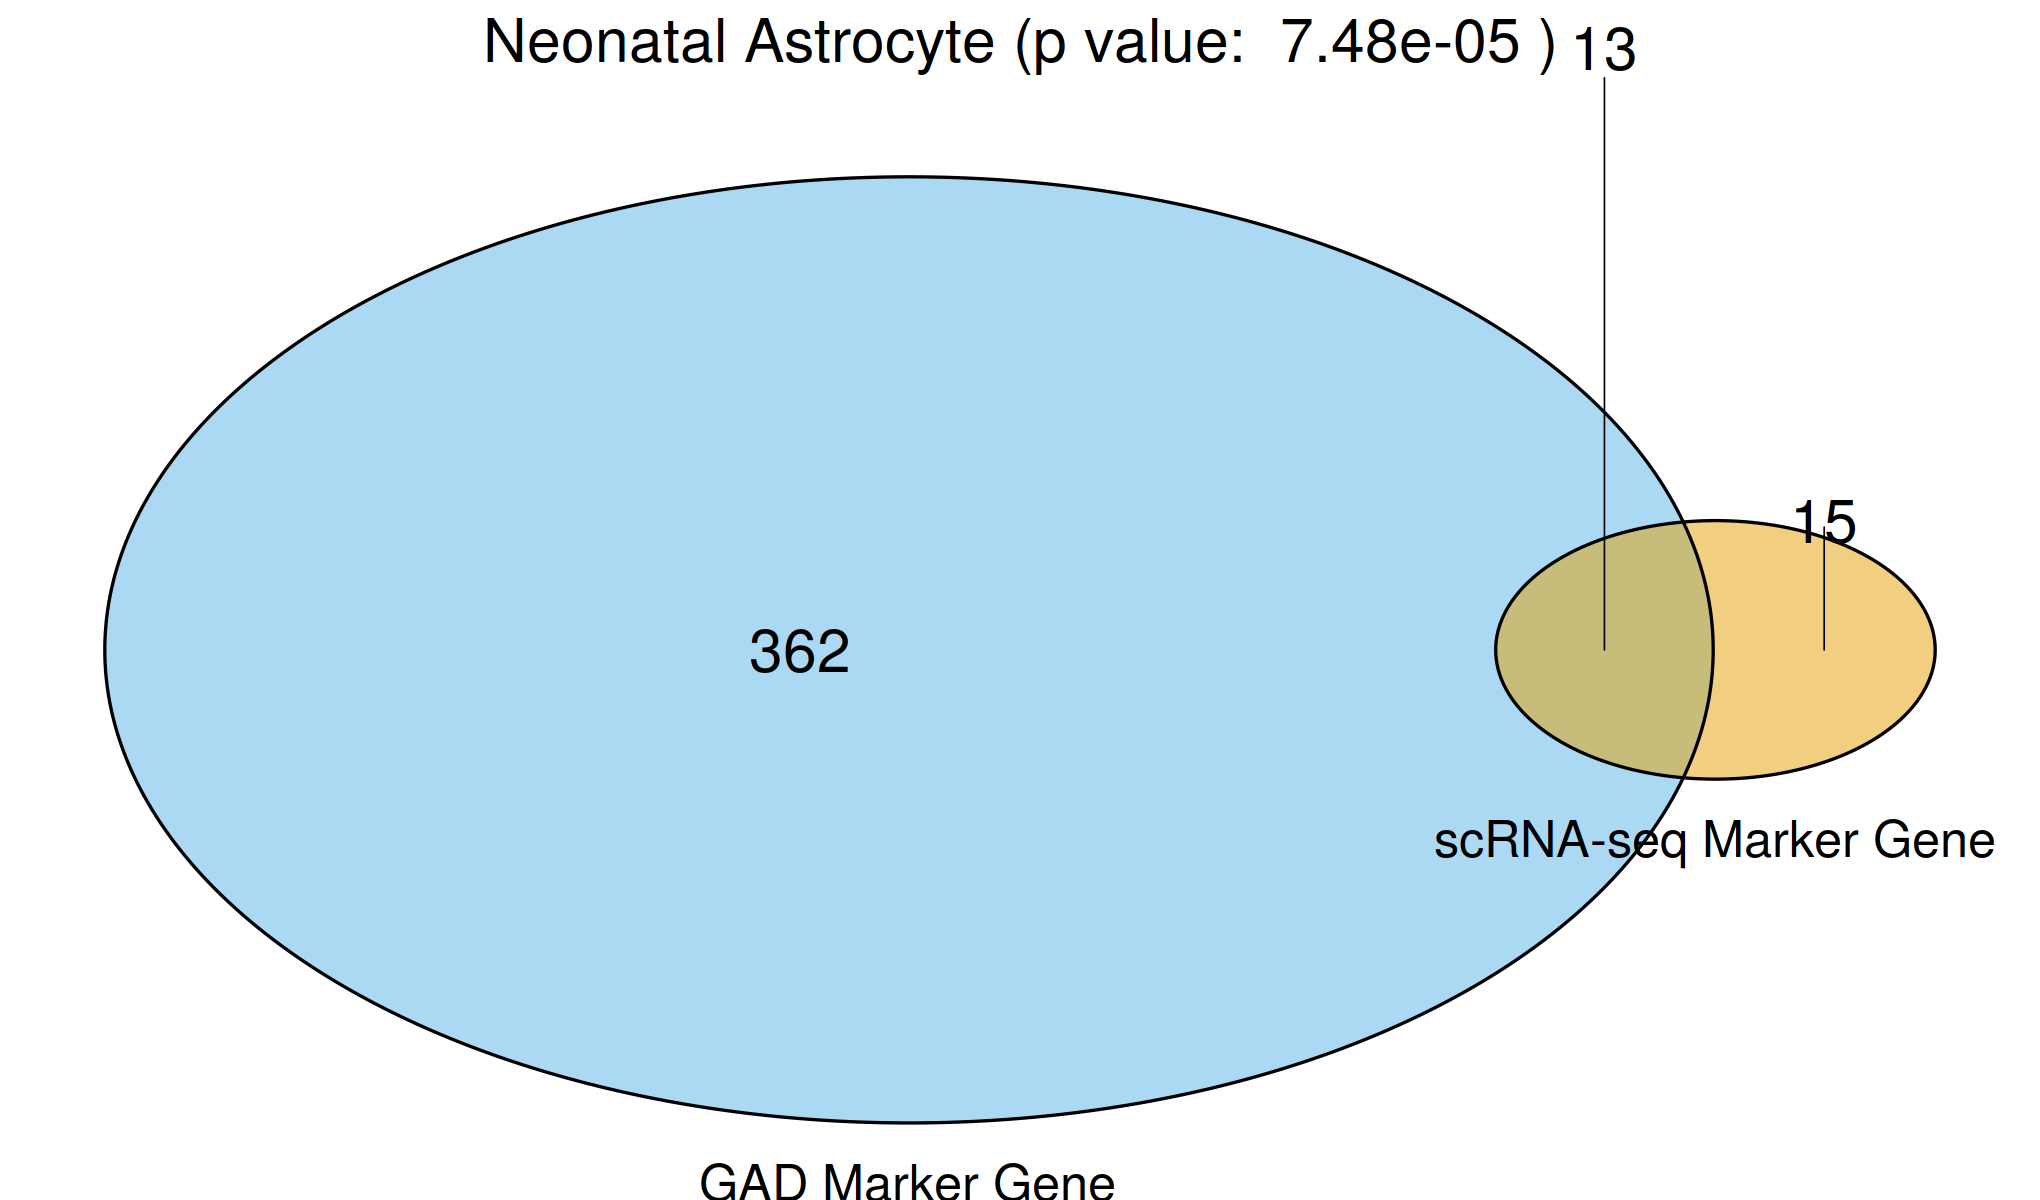

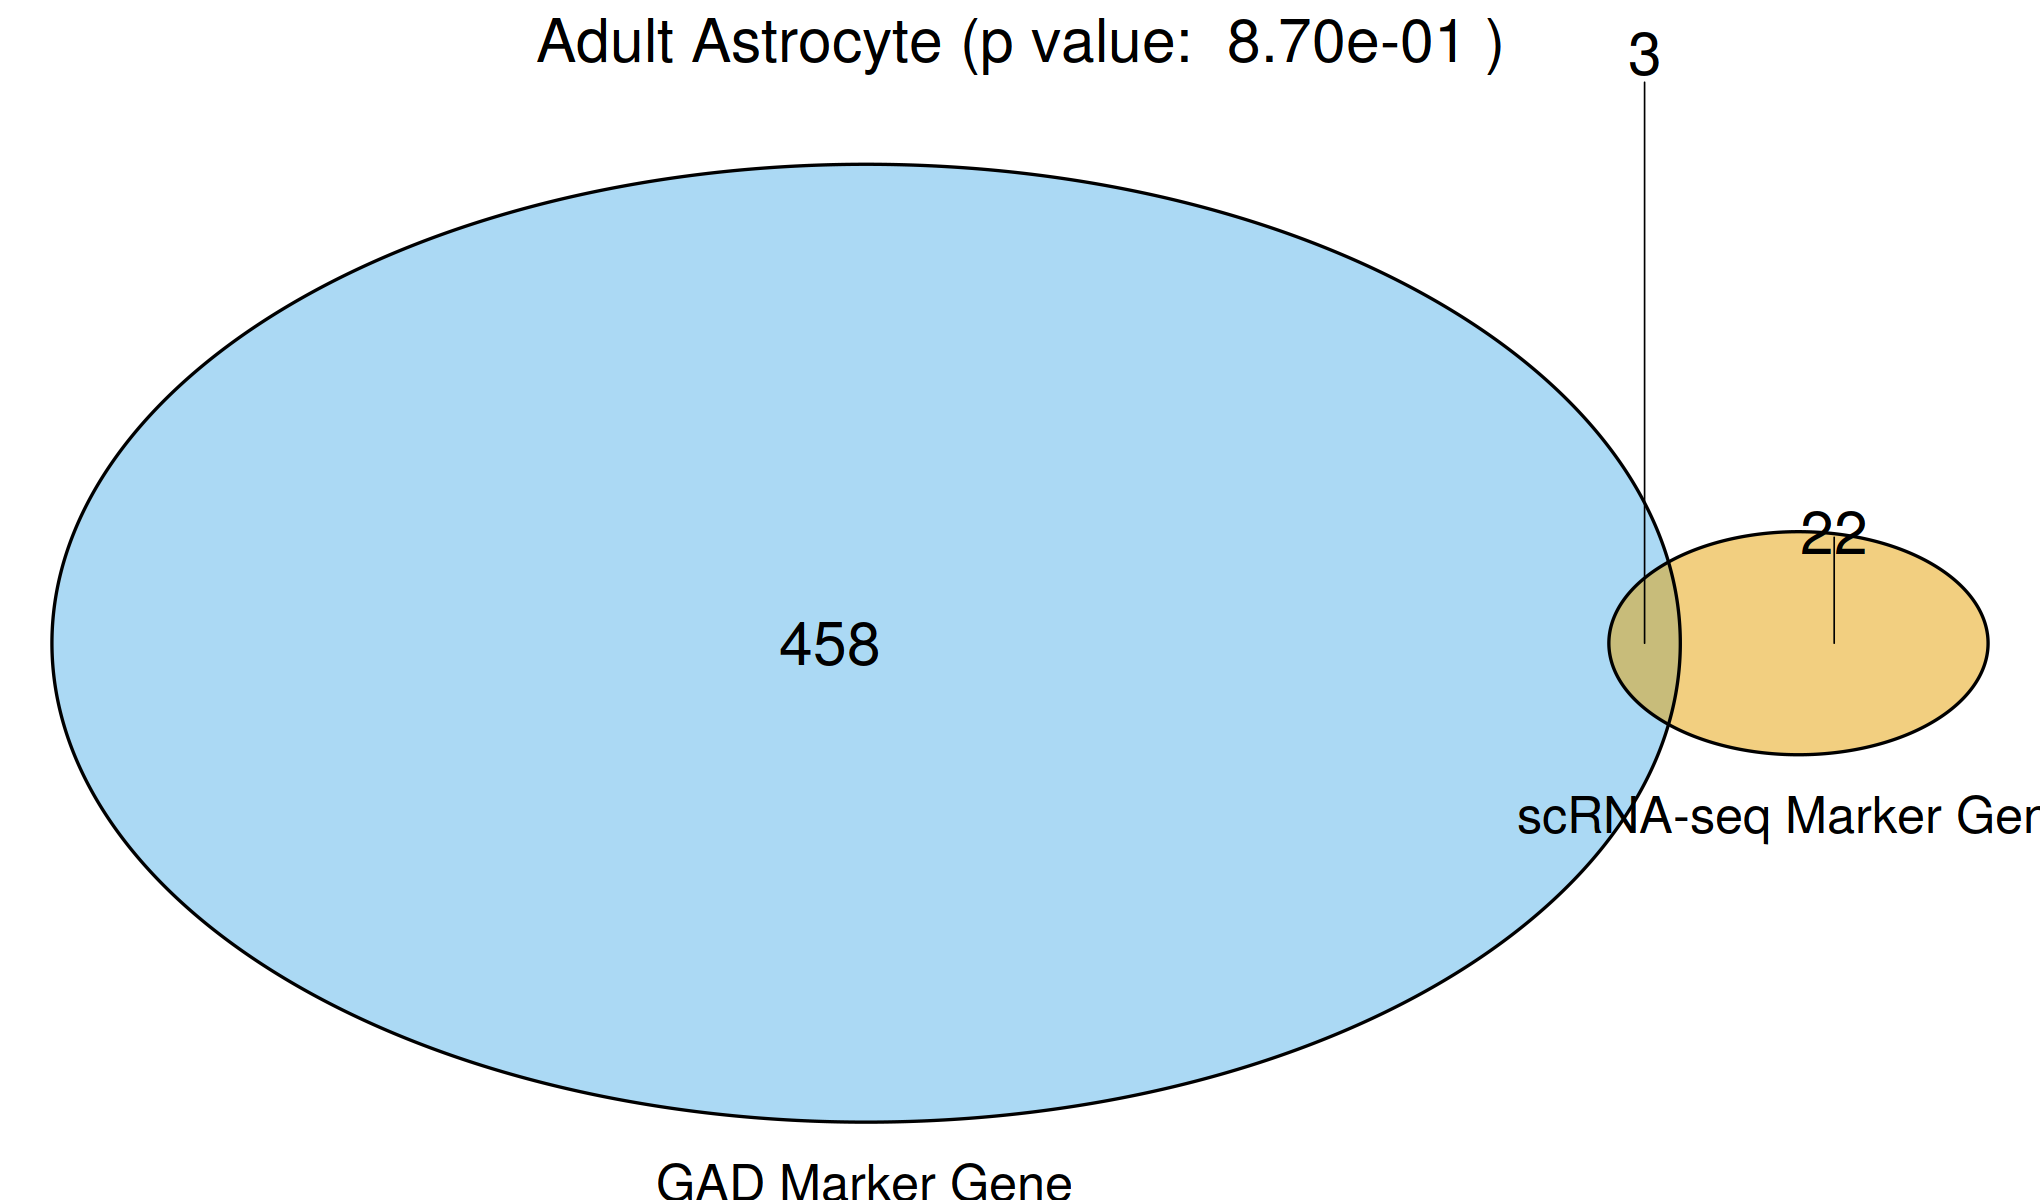

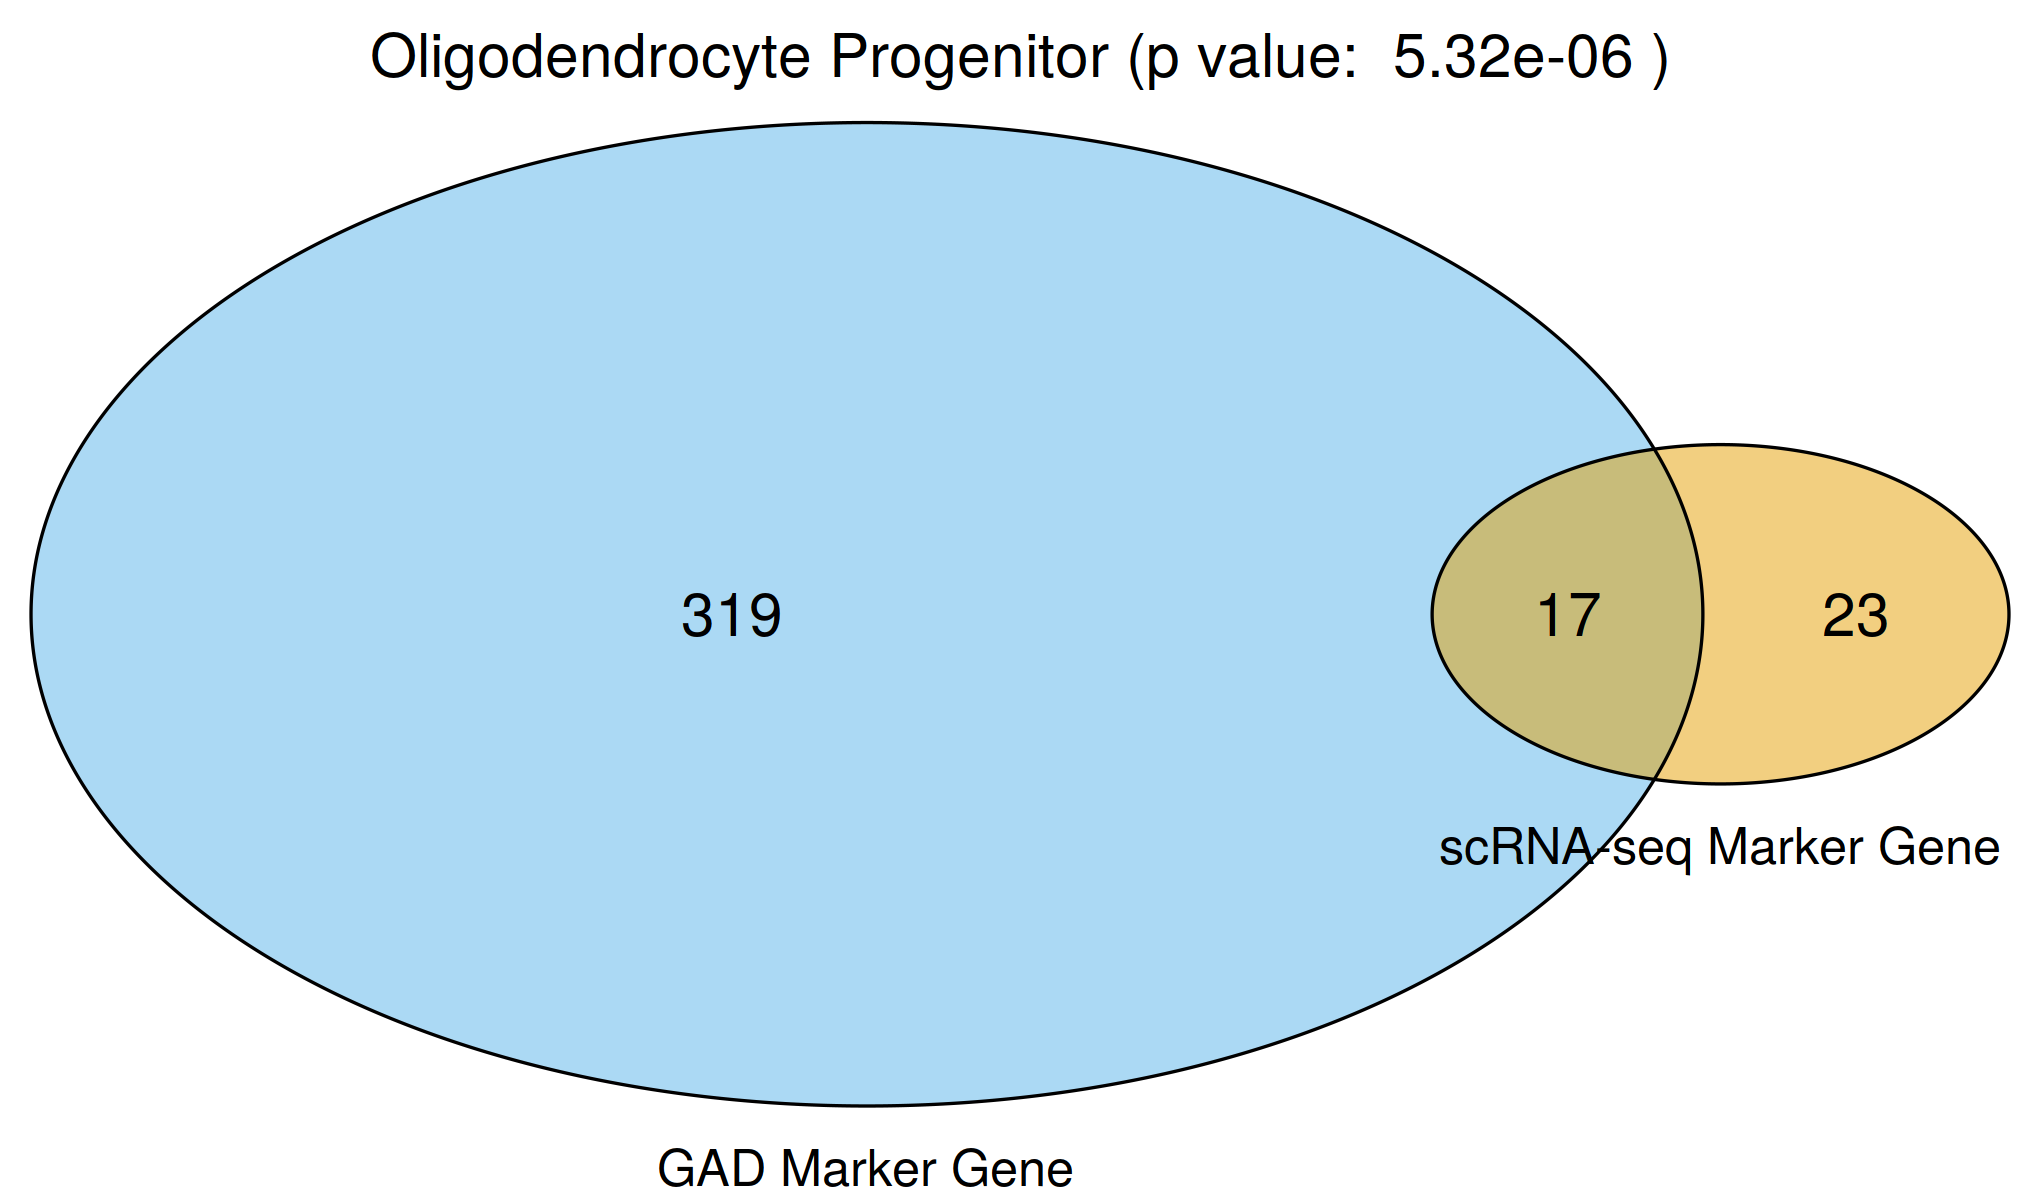

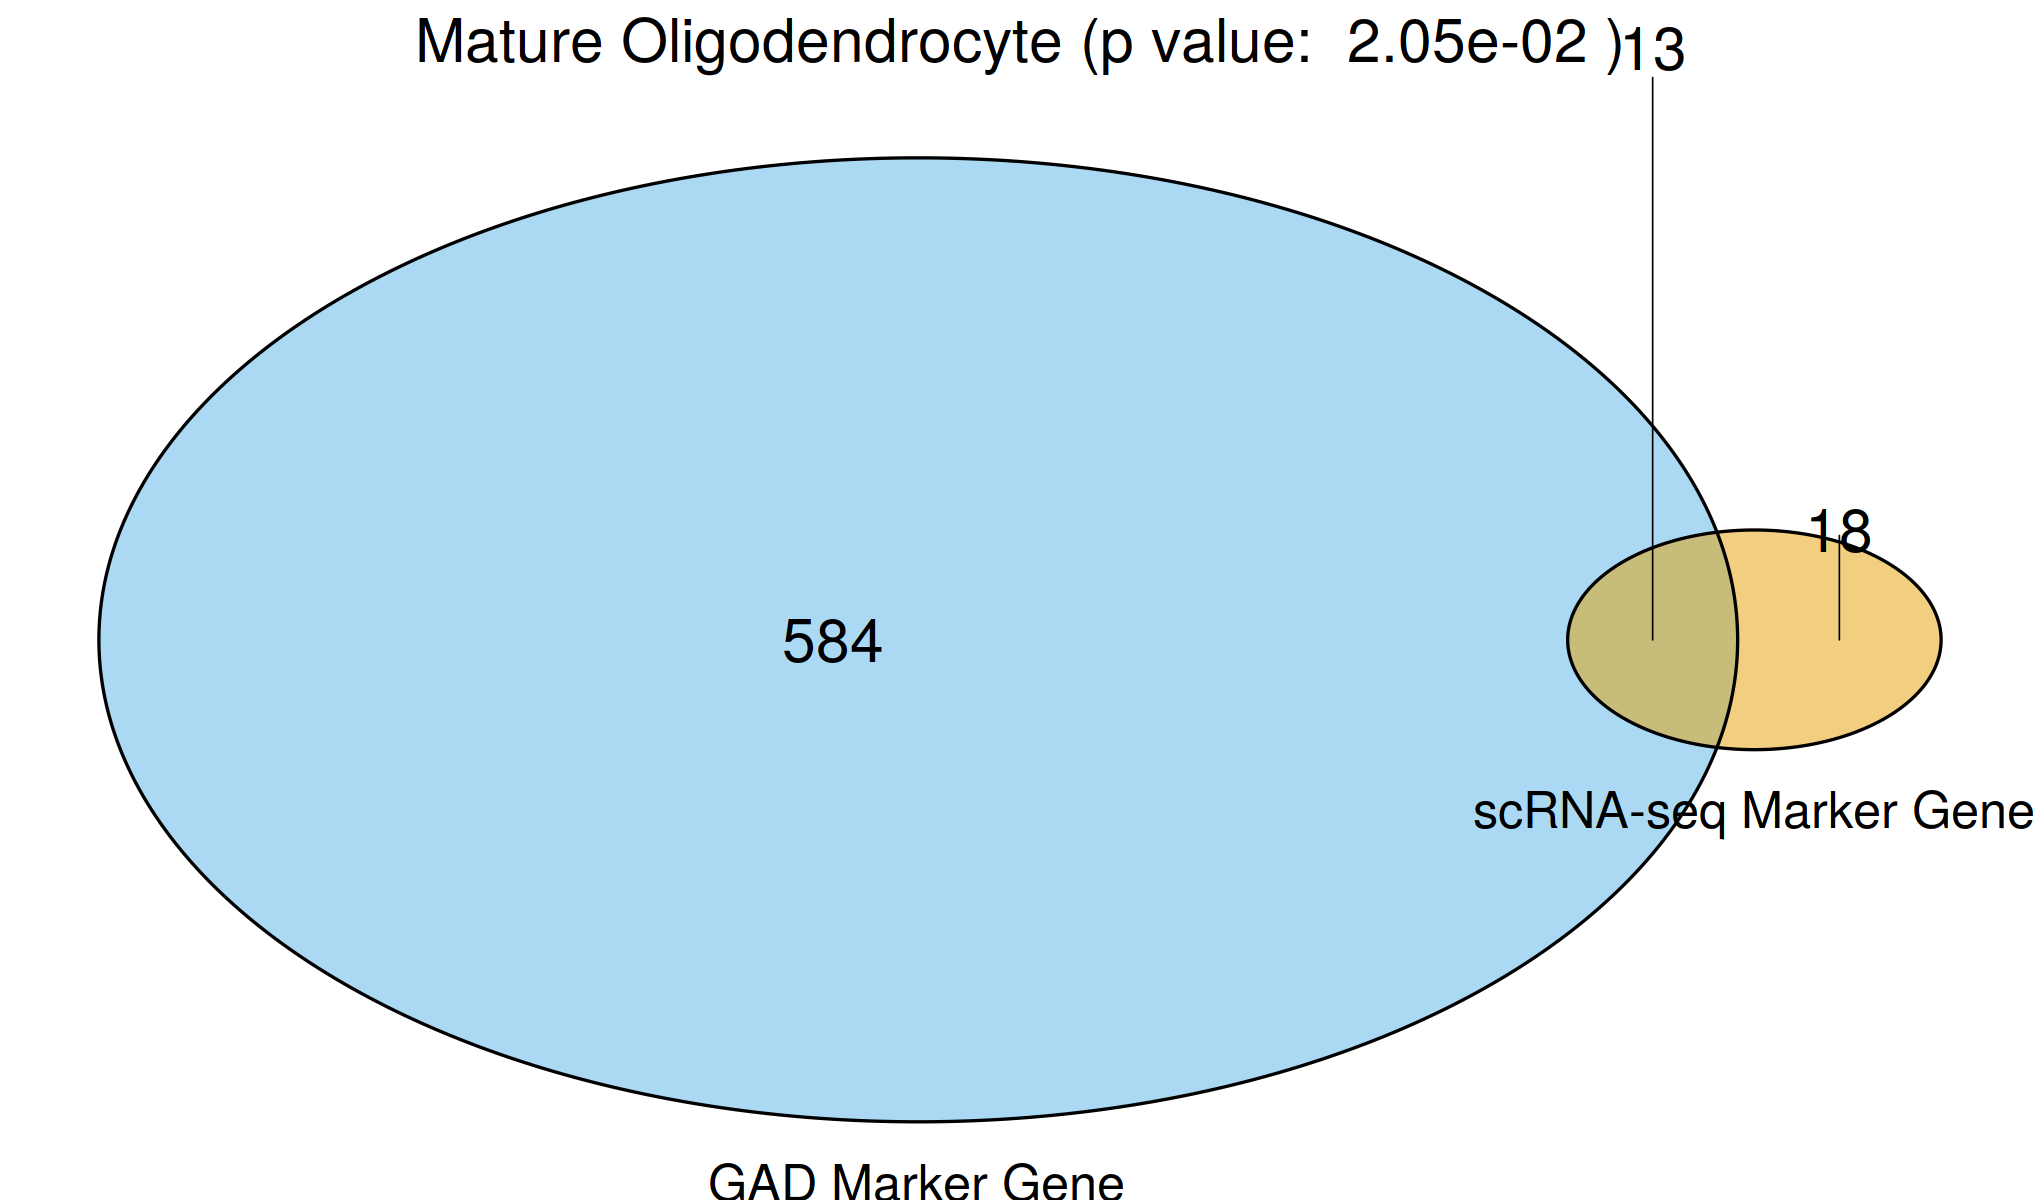

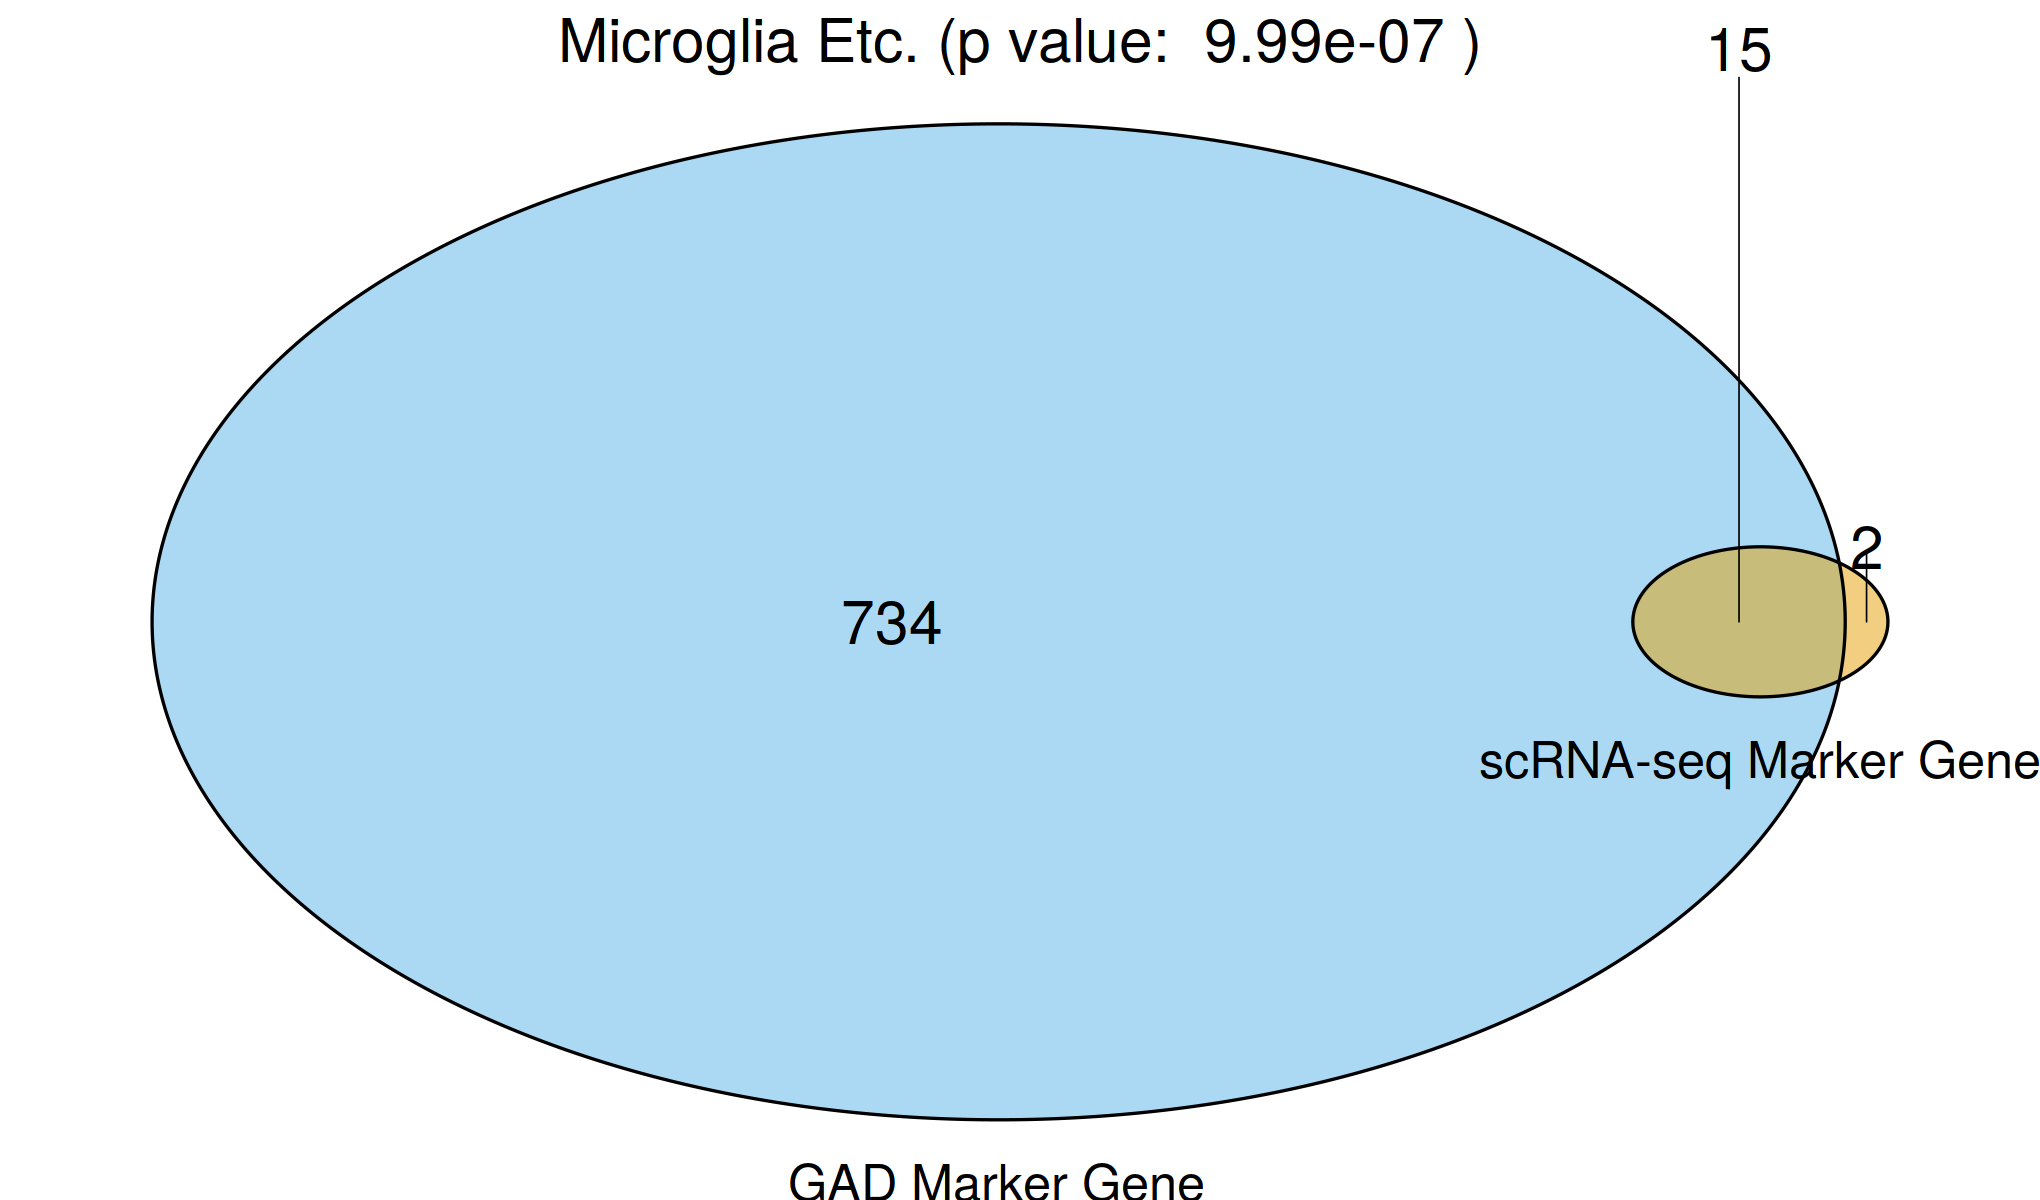

In [89]:
for(i in 1:length(cellTypeList)){

    tan = gene_lists[[cellTypeNameList[i]]]
markers = rownames(pbmc.markers)[pbmc.markers$cluster == cellTypeList[i]]
input = list(tan, markers)

go.obj = newGeneOverlap(tan, markers, genome.size = 2483)
go.obj = testGeneOverlap(go.obj)
pval = formatC(go.obj@pval, format = "e", digits = 2)
    grid.newpage()

vennObj = venn.diagram(x = input, filename = NULL, cex = 3, cat.cex = 2.5, cat.pos = c(0.1, 0.1), cat.default.pos = "outer", fill = c("#E69F00", "#56B4E9"), 
                       category.names = c("scRNA-seq Marker Gene", "GAD Marker Gene"), scaled = TRUE, rotation.degree = 0, 
                       sub = paste(cellTypeList[i], "(p value: ", pval, ")"), sub.cex =3, sub.pos = c(0.5, 1), force.unique = TRUE)

grid.draw(vennObj)

}